# Homework1_22200374

In [1]:
import sys
#Import package 'requests'for URL scrapping
import requests
# Import package for reading csv files 
import pandas as pd
#import package 'beautifulsoup' to extract the content of HTML fields 
#pip install bs4
from bs4 import BeautifulSoup
#pip install newspaper3k
import newspaper
#import package 'feedparser'
#Feedparser is a library to parse RSS/XML feeds, these are files with a specific XML structure
import feedparser
#import package 'json' to parse json objects
import json
# Import package numpy for numeric computing
import numpy as np
# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt
#For showing plots directly in the notebook run the command below
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
# hide ipykernel warnings 
import warnings
%matplotlib inline


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

import warnings
warnings.filterwarnings('ignore')

In [2]:
#pip install mxnet-mkl==1.6.0 numpy==1.23.1

In [3]:
#pip install numpy==1.23.1

## PART ONE

- Check how many rows and columns your dataset has.

In [4]:
# Reading from a csv file, into a data frame
df = pd.read_csv('covid19-cdc-22200374.csv')
#write to file using default utf-8 encoding, this will avoid further issues with the encoding
df.to_csv("covid19-cdc-22200374-utf8.csv", index=False)
# Check how many rows and columns this dataframe has
print("number of rows and columns(Rows_Num,Columns_Num):", df.shape)
print("number of rows:", df.shape[0])
print("number of columns:", df.shape[1])

number of rows and columns(Rows_Num,Columns_Num): (20000, 19)
number of rows: 20000
number of columns: 19


- Print the first and the last 5 rows.

In [5]:
# Show first 5 rows of data frame
# The rows are indexed starting from 0
df.head(5)

case_month res_state  state_fips_code   res_county  county_fips_code  \
0    2020-09        TX             48.0        BEXAR           48029.0   
1    2020-12        CA              6.0  LOS ANGELES            6037.0   
2    2021-01        IL             17.0      MADISON           17119.0   
3    2020-03        CA              6.0  LOS ANGELES            6037.0   
4    2020-04        IN             18.0       MARION           18097.0   

        age_group     sex   race            ethnicity  \
0  50 to 64 years  Female  White      Hispanic/Latino   
1       65+ years    Male  White      Hispanic/Latino   
2       65+ years    Male  White  Non-Hispanic/Latino   
3       65+ years    Male  White  Non-Hispanic/Latino   
4       65+ years  Female    NaN                  NaN   

   case_positive_specimen_interval  case_onset_interval  process exposure_yn  \
0                              NaN                  NaN  Missing     Missing   
1                              NaN                  NaN  Missing     Missing   
2                              1.0                  0.0  Missing     Missing   
3                              NaN                  0.0  Missing     Missing   
4                              0.0                  NaN    Other         Yes   

              current_status symptom_status  hosp_yn   icu_yn death_yn  \
0  Laboratory-confirmed case        Missing      Yes  Missing      Yes   
1  Laboratory-confirmed case        Unknown      Yes      Yes      Yes   
2  Laboratory-confirmed case        Missing      Yes  Missing      Yes   
3  Laboratory-confirmed case    Symptomatic      Yes      Yes      Yes   
4  Laboratory-confirmed case        Unknown  Unknown  Missing      Yes   

  underlying_conditions_yn  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN

In [6]:
# Show last 5 rows of data frame
# The rows are indexed starting from 0
df.tail(5)

case_month res_state  state_fips_code res_county  county_fips_code  \
19995    2022-06        MI             26.0    CLINTON           26037.0   
19996    2021-12        FL             12.0    BROWARD           12011.0   
19997    2022-01        IN             18.0        NaN               NaN   
19998    2022-01        NY             36.0     ALBANY           36001.0   
19999    2020-12        WI             55.0  OUTAGAMIE           55087.0   

            age_group     sex                                    race  \
19995  50 to 64 years    Male                                   White   
19996  18 to 49 years    Male  Native Hawaiian/Other Pacific Islander   
19997  18 to 49 years    Male                                   White   
19998    0 - 17 years  Female                                   White   
19999  50 to 64 years  Female                                   White   

                 ethnicity  case_positive_specimen_interval  \
19995  Non-Hispanic/Latino                              NaN   
19996                  NaN                              1.0   
19997  Non-Hispanic/Latino                              0.0   
19998      Hispanic/Latino                              NaN   
19999  Non-Hispanic/Latino                              NaN   

       case_onset_interval  process exposure_yn             current_status  \
19995                  0.0  Missing         Yes  Laboratory-confirmed case   
19996                  0.0  Missing     Missing  Laboratory-confirmed case   
19997                  NaN  Missing     Missing  Laboratory-confirmed case   
19998                  NaN  Missing     Missing  Laboratory-confirmed case   
19999                  NaN  Missing     Missing  Laboratory-confirmed case   

      symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn  
19995    Symptomatic       No  Missing       No                      NaN  
19996    Symptomatic       No  Missing       No                      NaN  
19997        Missing       No  Missing       No                      NaN  
19998        Missing  Missing  Missing       No                      NaN  
19999        Missing       No  Missing       No                      NaN

- Convert the features to their appropriate data types (e.g., decide which features are more appropriate as continuous and which ones as categorical types). 

#### RESEARCH:

Different Data Types (e.g., numeric, text, ordinal): group features into two main types

– **continuous features**: on these features it makes sense to compute summary statistics such as min, max, average, variance. Example: age, price (numeric features).

– **categorical features**: on these features it makes sense to compute summaries such as counts, e.g., most frequent category, second most frequent category. Example: country names, brand names (ordinal, binary, categorical, textual).

In [7]:
# Show the data types in each column.
# int64 and float64 are numeric columns.
# The pandas type 'object' stands for Python strings
# Columns mixing numbers and characters are automatically converted to type 'object'.
# Some of the type 'object' columns may be more appropriate as continuous or as categorical types.
# We first explore the data, then decide which columns should be treated as 'continuous' and which 
# should be treated as 'categorical'.
# You can see below that some columns are wrongly set to continuous types, e.g., state_fips_code,county_fips_code.
df.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

Based on examining the data in a spreadsheet program, 2 of the features are continuous and the rest categorical.

- **state_fips_code** and **county_fips_code** will be converted to **categorical** because it contains limited results,because we only have limited land.

### Some Research

From reading the dictionary file: case_positive_specimen_interval is computed as "Weeks between earliest date and date of first positive specimen collection". It is likely that these are collected using the form and fields suggested. It seems unlikely that negative values for this features are genuine, since the date of positive specimen collection should be after the earliest date the case was notified to CDC. So this feature is calculated as: [number of days for (pos_date - earliest_date)] / 7.

***Generally speaking, "case_positive_specimen_interval"'data and "Case onset interval"'s data will not be negative.When collecting, the dates before and after are filled in reverse!!!***

In [8]:
# Select columns containing categorical data
continuous_features = df[['case_positive_specimen_interval','case_onset_interval']].columns 

#change their type to 'category'
df['state_fips_code']=df['state_fips_code'].astype('object')
df['county_fips_code']=df['county_fips_code'].astype('object')
categorical_columns = df.select_dtypes(['object']).columns

#categorical_columns = df[['state_fips_code','county_fips_code']].columns 
# state_fips_code and county_fips_code were chosen as categories because this data contains limited places
# Convert data type to category for these columns

for column in categorical_columns:
    df[column] = df[column].astype('category')  

# We should also turn the feature ID into type 'object' so it is not used during descriptive stats, but we have not ID column!!

#show the result
df.dtypes

case_month                         category
res_state                          category
state_fips_code                    category
res_county                         category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object

- Look for duplicate rows and columns. Consider whether it makes sense to keep them or drop them.

In [9]:
print("number of rows:", df.shape[0])

#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate rows (excluding first) in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.

#print('Number of duplicate rows (including first) in the table is:', df.duplicated(keep=False).sum())
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

number of rows: 20000
Number of duplicate rows (excluding first) in the table is:  1052
Number of duplicate rows (including first) in the table is: 1871


In [10]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


In [11]:
# Show duplicate row data that can be dropped
df[df.duplicated(keep=False)] 
#perhaps former one is the same as the later ones.

case_month res_state state_fips_code       res_county county_fips_code  \
1        2020-12        CA             6.0      LOS ANGELES           6037.0   
7        2020-12        CA             6.0      LOS ANGELES           6037.0   
8        2020-12        CA             6.0  SAN LUIS OBISPO           6079.0   
9        2021-09        OH            39.0       MONTGOMERY          39113.0   
10       2020-04        MA            25.0          NORFOLK          25021.0   
...          ...       ...             ...              ...              ...   
19950    2020-12        AZ             4.0         MARICOPA           4013.0   
19957    2022-01        NY            36.0         ONONDAGA          36067.0   
19962    2020-12        TX            48.0          TARRANT          48439.0   
19980    2022-07        NC            37.0      MECKLENBURG          37119.0   
19997    2022-01        IN            18.0              NaN              NaN   

            age_group     sex     race            ethnicity  \
1           65+ years    Male    White      Hispanic/Latino   
7           65+ years    Male    Asian  Non-Hispanic/Latino   
8           65+ years  Female    White  Non-Hispanic/Latino   
9           65+ years  Female    White  Non-Hispanic/Latino   
10          65+ years  Female    White  Non-Hispanic/Latino   
...               ...     ...      ...                  ...   
19950  50 to 64 years  Female    Black  Non-Hispanic/Latino   
19957  18 to 49 years    Male    White  Non-Hispanic/Latino   
19962  18 to 49 years  Female  Unknown              Unknown   
19980  18 to 49 years  Female    Black  Non-Hispanic/Latino   
19997  18 to 49 years    Male    White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
1                                  NaN                  NaN  Missing   
7                                  NaN                  NaN  Missing   
8                                  NaN                  0.0  Missing   
9                                  0.0                  NaN  Missing   
10                                 0.0                  NaN  Missing   
...                                ...                  ...      ...   
19950                              NaN                  0.0  Missing   
19957                              NaN                  NaN  Missing   
19962                              NaN                  NaN  Missing   
19980                              0.0                  NaN  Missing   
19997                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
1         Missing  Laboratory-confirmed case        Unknown      Yes      Yes   
7         Missing  Laboratory-confirmed case        Unknown      Yes  Unknown   
8         Missing  Laboratory-confirmed case    Symptomatic      Yes  Missing   
9         Missing  Laboratory-confirmed case        Missing      Yes  Missing   
10        Missing  Laboratory-confirmed case        Missing       No  Missing   
...           ...                        ...            ...      ...      ...   
19950     Missing  Laboratory-confirmed case    Symptomatic       No  Missing   
19957     Missing  Laboratory-confirmed case        Missing  Missing  Missing   
19962     Missing  Laboratory-confirmed case        Missing  Missing  Missing   
19980     Missing  Laboratory-confirmed case        Unknown  Unknown  Unknown   
19997     Missing  Laboratory-confirmed case        Missing       No  Missing   

      death_yn underlying_conditions_yn  
1          Yes                      NaN  
7          Yes                      NaN  
8          Yes                      NaN  
9          Yes                      NaN  
10         Yes                      NaN  
...        ...                      ...  
19950       No                      NaN  
19957       No                      NaN  
19962       No                      NaN  
19980       No                

In [12]:
#df.sort_values("case_month")
df[df.duplicated(keep=False)].sort_values(["case_month","res_county"],ignore_index=True)#these two values as sort values
#Now, that shows you the duplicate rows clearly.

case_month res_state state_fips_code res_county county_fips_code  \
0       2020-03        NJ            34.0     BERGEN          34003.0   
1       2020-03        NJ            34.0     BERGEN          34003.0   
2       2020-03        IL            17.0       COOK          17031.0   
3       2020-03        IL            17.0       COOK          17031.0   
4       2020-03        NJ            34.0      ESSEX          34013.0   
...         ...       ...             ...        ...              ...   
1866    2022-09        NY            36.0    SUFFOLK          36103.0   
1867    2022-09        NC            37.0       WAKE          37183.0   
1868    2022-09        NC            37.0       WAKE          37183.0   
1869    2022-10        NY            36.0    SUFFOLK          36103.0   
1870    2022-10        NY            36.0    SUFFOLK          36103.0   

           age_group     sex     race            ethnicity  \
0          65+ years    Male    White  Non-Hispanic/Latino   
1          65+ years    Male    White  Non-Hispanic/Latino   
2          65+ years    Male    Black  Non-Hispanic/Latino   
3          65+ years    Male    Black  Non-Hispanic/Latino   
4          65+ years  Female    Black  Non-Hispanic/Latino   
...              ...     ...      ...                  ...   
1866  18 to 49 years  Female    White              Unknown   
1867  18 to 49 years    Male    White  Non-Hispanic/Latino   
1868  18 to 49 years    Male    White  Non-Hispanic/Latino   
1869       65+ years  Female  Unknown              Unknown   
1870       65+ years  Female  Unknown              Unknown   

      case_positive_specimen_interval  case_onset_interval  process  \
0                                 NaN                  NaN  Missing   
1                                 NaN                  NaN  Missing   
2                                 NaN                  0.0  Missing   
3                                 NaN                  0.0  Missing   
4                                 NaN                  0.0  Missing   
...                               ...                  ...      ...   
1866                              NaN                  NaN  Missing   
1867                              0.0                  NaN  Missing   
1868                              0.0                  NaN  Missing   
1869                              NaN                  NaN  Missing   
1870                              NaN                  NaN  Missing   

     exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
0        Missing  Laboratory-confirmed case        Missing      Yes  Missing   
1        Missing  Laboratory-confirmed case        Missing      Yes  Missing   
2        Missing  Laboratory-confirmed case        Missing      Yes  Missing   
3        Missing  Laboratory-confirmed case        Missing      Yes  Missing   
4        Missing  Laboratory-confirmed case    Symptomatic      Yes  Missing   
...          ...                        ...            ...      ...      ...   
1866     Missing  Laboratory-confirmed case        Missing  Missing  Missing   
1867     Missing  Laboratory-confirmed case        Unknown  Unknown  Unknown   
1868     Missing  Laboratory-confirmed case        Unknown  Unknown  Unknown   
1869     Missing  Laboratory-confirmed case        Missing  Missing  Missing   
1870     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

     death_yn underlying_conditions_yn  
0         Yes                      NaN  
1         Yes                      NaN  
2         Yes                      NaN  
3         Yes                      NaN  
4         Yes                      NaN  
...       ...                      ...  
1866       No                      NaN  
1867       No                      NaN  
1868       No                      NaN  
1869       No                      NaN  
1870       No                      NaN  

[1871 rows x 19 columns]

#### Result - Duplicate rows exist

- Rows - There is no primary key in the dataset (id or customer number attribute) to check if a user is included twice. Therefore I compare against all columns attributes. This acts like a primary key. This initially returned 1871 duplicate rows. To also include the rows that were matched I include "keep=False" parameter. 
- Columns - There are no duplicate columns. We will also check the descriptive stats to make sure we did not miss any duplicated columns.

In [13]:
df = df.drop_duplicates()

#check result!!
# get duplicated row data. Just deleted the duplicated ones, and **keep** the **first original one**!!!!
print('Duplicate remaining rows(including first):', df[df.duplicated(keep=False)].shape[0])
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())

Duplicate remaining rows(including first): 0
Number of duplicate (excluding first) columns in the table is:  0


- Look for constant columns. Consider whether it makes sense to keep them or drop them.

**Categorical Data**

In [14]:
#for categorical_columns

# Prepare %missing column
categorical_columns_missing  = 100 * (df[categorical_columns].isnull().sum()/df.shape[0])
#category_columns_perc_missing

# Store the values in a dataframe
df_categorical_missing = pd.DataFrame(categorical_columns_missing, columns=['%missing'])
df_categorical_missing

%missing
case_month                 0.000000
res_state                  0.000000
state_fips_code            0.000000
res_county                 6.111463
county_fips_code           6.111463
age_group                  0.749419
sex                        2.221870
race                      11.869327
ethnicity                 12.951235
process                    0.000000
exposure_yn                0.000000
current_status             0.000000
symptom_status             0.000000
hosp_yn                    0.000000
icu_yn                     0.000000
death_yn                   0.000000
underlying_conditions_yn  91.054465

In [15]:
# Prepare the cardinality column
categorical_columns_card = df[categorical_columns].nunique()
# store the values in a dataframe
df_categorical_card = pd.DataFrame(categorical_columns_card, columns=['card'])
df_categorical_card

card
case_month                  35
res_state                   48
state_fips_code             48
res_county                 851
county_fips_code          1197
age_group                    5
sex                          4
race                         8
ethnicity                    4
process                      9
exposure_yn                  3
current_status               2
symptom_status               4
hosp_yn                      4
icu_yn                       4
death_yn                     2
underlying_conditions_yn     2

**Categorical Data** - Reviewing the categorical data below we can see all unique values > 1

**Continuous Data**

In [16]:
# Performing a descriptive statistic
# Shows the mean for each numeric feature
df[continuous_features].mean()

case_positive_specimen_interval    0.175236
case_onset_interval               -0.041848
dtype: float64

In [17]:
# df.count() gives the number of rows with non-NAN feature value
# Instead of df.isnull().sum() we can use the functions df.shape and df.count()
# numeric_columns_missing = df.shape[0] - df[numeric_columns].count()

# Prepare %missing column
continuous_features_missing  = 100 * (df[continuous_features].isnull().sum()/df.shape[0])
# store the values in a dataframe
df_continuous_missing = pd.DataFrame(continuous_features_missing, columns=['%missing'])
df_continuous_missing

%missing
case_positive_specimen_interval  47.445641
case_onset_interval              55.230103

In [18]:
# Add cardinality column
# A simpler way to get the number of unique values per feature
continuous_features_card = df[continuous_features].nunique()
# store the values in a dataframe
df_continuous_card = pd.DataFrame(continuous_features_card, columns=['card'])
df_continuous_card

card
case_positive_specimen_interval    53
case_onset_interval                42

In [19]:
# Print table with continuous statistics

#df[continuous_features].describe().T  #the same as below!!!
df_table_continuous=df.select_dtypes(include=['float64']).describe().T
df_table_continuous

count      mean       std   min  25%  50%  \
case_positive_specimen_interval  9958.0  0.175236  2.635715 -76.0  0.0  0.0   
case_onset_interval              8483.0 -0.041848  1.675029 -58.0  0.0  0.0   

                                 75%    max  
case_positive_specimen_interval  0.0  100.0  
case_onset_interval              0.0   54.0

**Continuous Data** - Reviewing the continuous data below we can see all have a non zero standard deviation(STD).

This implies that a particular feature does not contain a single constant value in all of the rows. Thus in this case, none of the continuous features are constant.
Final Result - No constant columns

#### check null

In [20]:
#Check for Null Values
df.isnull().sum()

case_month                             0
res_state                              0
state_fips_code                        0
res_county                          1158
county_fips_code                    1158
age_group                            142
sex                                  421
race                                2249
ethnicity                           2454
case_positive_specimen_interval     8990
case_onset_interval                10465
process                                0
exposure_yn                            0
current_status                         0
symptom_status                         0
hosp_yn                                0
icu_yn                                 0
death_yn                               0
underlying_conditions_yn           17253
dtype: int64

### Check logical integrity of data 
A number of additional checks will be performed to see if the data makes sense. Depending on the amount of data affected we may decide to drop those rows or replace the values upon consultation with a domain expert.

In [21]:
#"case_positive_specimen_interval"'s value should be positive.
test_1= df[['case_positive_specimen_interval']][df["case_positive_specimen_interval"]<0]
print("Number of rows failing the test: ", test_1.shape[0])
test_1.head(5)

Number of rows failing the test:  56


case_positive_specimen_interval
73                              -1.0
112                            -57.0
356                             -1.0
528                             -1.0
904                             -1.0

In [22]:
#"case_onset_interval"'s value should be positive.
test_2= df[['case_onset_interval']][df["case_onset_interval"]<0]
print("Number of rows failing the test: ", test_2.shape[0])
test_2.head(5)

Number of rows failing the test:  285


case_onset_interval
79                  -3.0
205                 -3.0
324                 -1.0
336                 -3.0
418                 -1.0

In [23]:
#They are symptomatic, but case_onset_interval is empty, and then they can be assigned some meaningful value.
test_3= df.loc[ (df["symptom_status"]=='Symptomatic') & (df["case_onset_interval"].isnull()) ,:]
test_3=test_3[['case_onset_interval','symptom_status']]
print("Number of rows failing the test: ", test_3.shape[0])
test_3.head(5)

Number of rows failing the test:  665


case_onset_interval symptom_status
16                  NaN    Symptomatic
19                  NaN    Symptomatic
26                  NaN    Symptomatic
88                  NaN    Symptomatic
93                  NaN    Symptomatic

In [24]:
#The patient is an asymptomatic infection, but has case_onset_interval, which feels contradictory.
#test_4= df.loc[ (df["symptom_status"]=='Asymptomatic') &( (df["case_onset_interval"]>=0) | (df["case_onset_interval"]<0)),:]
test_4= df.loc[ (df["symptom_status"]=='Asymptomatic') &( df["case_onset_interval"].notnull()),:]
test_4=test_4[['case_onset_interval','symptom_status']]
print("Number of rows failing the test: ", test_4.shape[0])
test_4.head(5)

Number of rows failing the test:  0


Empty DataFrame
Columns: [case_onset_interval, symptom_status]
Index: []

In [25]:
#The patient has not been to the hospital but went to the ICU, which feels like a contradictory case
test_5_1=df.loc[ (df["hosp_yn"]=='No') & (df["icu_yn"]=='Yes'),:]
test_5_1=test_5_1[['hosp_yn','icu_yn']]
print("Number of rows failing the test: ", test_5_1.shape[0])
test_5_1.head(5)

Number of rows failing the test:  3


hosp_yn icu_yn
2246       No    Yes
3615       No    Yes
15400      No    Yes

In [26]:
#For patients who have not been hospitalized, and they have not died, it can be inferred that their "icu_yn" value is not necessarily 'Missing', but 'No'.
test_5_2=df.loc[ (df["death_yn"]=='No')& (df["icu_yn"]=='Missing')&(df["hosp_yn"]=='No'),:]
test_5_2=test_5_2[['death_yn','icu_yn','hosp_yn']]
print("Number of rows meeting the condition: ", test_5_2.shape[0])
test_5_2.head(5)

Number of rows meeting the condition:  7425


death_yn   icu_yn hosp_yn
5006       No  Missing      No
5009       No  Missing      No
5010       No  Missing      No
5012       No  Missing      No
5013       No  Missing      No

In [27]:
#Patients who died were unlikely to be asymptomatic, when they are the laboratory-confirmed cases.
test_6=df.loc[ (df["symptom_status"]=='Asymptomatic') & (df["death_yn"]=='Yes') & (df['current_status']=='Laboratory-confirmed case'),:]
test_6=test_6[['symptom_status','death_yn','current_status']]
print("Number of rows failing the test: ", test_6.shape[0])
test_6.head(5)

Number of rows failing the test:  54


symptom_status death_yn             current_status
42    Asymptomatic      Yes  Laboratory-confirmed case
145   Asymptomatic      Yes  Laboratory-confirmed case
206   Asymptomatic      Yes  Laboratory-confirmed case
393   Asymptomatic      Yes  Laboratory-confirmed case
466   Asymptomatic      Yes  Laboratory-confirmed case

In [28]:
#They are confirmed, but case_positive_specimen_interval is empty, and then they can be assigned some meaningful value.
test_7= df.loc[ (df["case_positive_specimen_interval"].isnull()) & ( df['current_status']== 'Laboratory-confirmed case'),:]
test_7=test_7[['case_positive_specimen_interval','current_status']]
print("Number of rows failing the test: ", test_7.shape[0])
test_7.head(5)

Number of rows failing the test:  7697


case_positive_specimen_interval             current_status
0                              NaN  Laboratory-confirmed case
1                              NaN  Laboratory-confirmed case
3                              NaN  Laboratory-confirmed case
6                              NaN  Laboratory-confirmed case
7                              NaN  Laboratory-confirmed case

In [29]:
test_8_1= df.loc[ ( df['current_status']== 'Probable case') & ( (df['process']== 'Laboratory reported')|(df['process']== 'Autopsy')|(df['process']== 'Clinical evaluation')|(df['process']== 'Routine surveillance')|(df['process']== 'Routine physical examination')),:]
test_8_1=test_8_1[['current_status','process']]
print("Number of rows failing the test: ", test_8_1.shape[0])
test_8_1.head(5)

Number of rows failing the test:  0


Empty DataFrame
Columns: [current_status, process]
Index: []

In [30]:
test_8_2= df.loc[ ( df['current_status']== 'Laboratory-confirmed case') & ( (df['process']== 'Laboratory reported')|(df['process']== 'Autopsy')|(df['process']== 'Clinical evaluation')|(df['process']== 'Routine surveillance')|(df['process']== 'Routine physical examination')),:]
test_8_2=test_8_2[['current_status','process']]
print("Number of rows failing the test: ", test_8_2.shape[0])
test_8_2.head(5)

Number of rows failing the test:  1185


current_status               process
15   Laboratory-confirmed case  Routine surveillance
105  Laboratory-confirmed case   Laboratory reported
136  Laboratory-confirmed case   Clinical evaluation
144  Laboratory-confirmed case  Routine surveillance
159  Laboratory-confirmed case   Clinical evaluation

In [31]:
#Asymptomatic patients are unlikely to be admitted to the ICU for treatment. Because the patient was admitted to the ICU, there must have been life-threatening manifestations
test_9=df.loc[ (df["symptom_status"]=='Asymptomatic') & (df["icu_yn"]=='Yes'),:]
test_9=test_9[['symptom_status','icu_yn']]
print("Number of rows failing the test: ", test_9.shape[0])
test_9.head(5)

Number of rows failing the test:  3


symptom_status icu_yn
2346    Asymptomatic    Yes
4264    Asymptomatic    Yes
16236   Asymptomatic    Yes

In [32]:
#It is impossible for asymptomatic patients without underlying diseases to have been hospitalized for no reason.
test_10=df.loc[ (df["symptom_status"]=='Asymptomatic') & (df["hosp_yn"]=='Yes') & (df["underlying_conditions_yn"]=='No'),:]
test_10=test_10[['symptom_status','hosp_yn','underlying_conditions_yn']]
print("Number of rows failing the test: ", test_10.shape[0])
test_10.head(5)

Number of rows failing the test:  0


Empty DataFrame
Columns: [symptom_status, hosp_yn, underlying_conditions_yn]
Index: []

In [33]:
#Patients who are asymptomatic and have no underlying disease theoretically will not die. If death occurs, the data may be wrong.
test_11=df.loc[ (df["symptom_status"]=='Asymptomatic') & (df["death_yn"]=='Yes') & (df["underlying_conditions_yn"]=='No'),:]
test_11=test_11[['symptom_status','death_yn','underlying_conditions_yn']]
print("Number of rows failing the test: ", test_11.shape[0])
test_11.head(5)

Number of rows failing the test:  0


Empty DataFrame
Columns: [symptom_status, death_yn, underlying_conditions_yn]
Index: []

In [34]:
#People who died must have symptoms, so their  missing, unknown, or empty 'symptom_status' can be changed to 'Symptomatic'.
test_12=df.loc[ (df["symptom_status"]=='Missing') |(df["symptom_status"]=='Unknown')|(df["symptom_status"].isnull())& (df["death_yn"]=='Yes') ,:]
test_12=test_12[['symptom_status','death_yn']]
print("Number of rows failing the test: ", test_12.shape[0])
test_12.head(15)

Number of rows failing the test:  9711


symptom_status death_yn
0         Missing      Yes
1         Unknown      Yes
2         Missing      Yes
4         Unknown      Yes
5         Missing      Yes
6         Missing      Yes
7         Unknown      Yes
9         Missing      Yes
10        Missing      Yes
13        Missing      Yes
14        Missing      Yes
17        Missing      Yes
18        Missing      Yes
21        Unknown      Yes
24        Missing      Yes

In [35]:
#Check the death cases who have been hospitalized and received ICU, and are there many whose "underlying_conditions_yn" is empty? 
#In this case their "underlying_conditions_yn" tends to be 'Yes', but the number is very small.
test_13_1=df.loc[ (df["death_yn"]=='Yes') & (df["underlying_conditions_yn"].isnull())& (df["hosp_yn"]=='Yes')& (df["icu_yn"]=='Yes'),:]
test_13_1=test_13_1[['symptom_status','death_yn','underlying_conditions_yn',"icu_yn"]]
print("Number of rows meeting the condition: ", test_13_1.shape[0])
test_13_1.head(5)

Number of rows meeting the condition:  261


symptom_status death_yn underlying_conditions_yn icu_yn
1         Unknown      Yes                      NaN    Yes
3     Symptomatic      Yes                      NaN    Yes
26    Symptomatic      Yes                      NaN    Yes
71    Symptomatic      Yes                      NaN    Yes
73    Symptomatic      Yes                      NaN    Yes

In [36]:
#Check how many "underlying_conditions_yn" of patients who have not died, have not been hospitalized, and are asymptomatic are empty?
#In this case their "underlying_conditions_yn" tends to be 'No', but the number is very small.
test_13_2=df.loc[ (df["death_yn"]=='No') & (df["underlying_conditions_yn"].isnull() & (df["hosp_yn"]=='No')&(df["symptom_status"]=='Asymptomatic')),:]
test_13_2=test_13_2[['symptom_status','death_yn','underlying_conditions_yn',"hosp_yn"]]
print("Number of rows meeting the condition: ", test_13_2.shape[0])
test_13_2.head(5)

Number of rows meeting the condition:  163


symptom_status death_yn underlying_conditions_yn hosp_yn
5156   Asymptomatic       No                      NaN      No
5325   Asymptomatic       No                      NaN      No
5351   Asymptomatic       No                      NaN      No
5453   Asymptomatic       No                      NaN      No
5593   Asymptomatic       No                      NaN      No

- Save your updated/cleaned data frame to a new csv file.

In [37]:
#Save your updated/cleaned data frame to a new csv file.
df.to_csv('covid19-cdc-22200374-updated&cleaned-data.csv', index=False)

##### For the updated CSV and data frame (after column/row removal):

In [38]:
df2 = pd.read_csv('covid19-cdc-22200374-updated&cleaned-data.csv')
print("number of rows and columns(Rows_Num,Columns_Num):", df2.shape)

number of rows and columns(Rows_Num,Columns_Num): (18948, 19)


In [39]:
continuous_features = df2[['case_positive_specimen_interval','case_onset_interval']].columns 

df2['state_fips_code']=df2['state_fips_code'].astype('object')
df2['county_fips_code']=df2['county_fips_code'].astype('object')
categorical_columns = df2.select_dtypes(['object']).columns

for column in categorical_columns:
    df2[column] = df2[column].astype('category')  

#show the result
df2.dtypes

case_month                         category
res_state                          category
state_fips_code                    category
res_county                         category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object

In [40]:
print('Number of duplicate rows (excluding first) in the table is: ', df2.duplicated().sum())
#you can see we cleaned it successfully.

Number of duplicate rows (excluding first) in the table is:  0


### Check for Null Values

In [41]:
#Check for Null Values
df2.isnull().sum()

case_month                             0
res_state                              0
state_fips_code                        0
res_county                          1158
county_fips_code                    1158
age_group                            142
sex                                  421
race                                2249
ethnicity                           2454
case_positive_specimen_interval     8990
case_onset_interval                10465
process                                0
exposure_yn                            0
current_status                         0
symptom_status                         0
hosp_yn                                0
icu_yn                                 0
death_yn                               0
underlying_conditions_yn           17253
dtype: int64

***’underlying_conditions_yn’*** appears massively empty, its value may be preserved or may need to be discarded.

##### - Prepare a table with descriptive statistics for all the continuous features.

## Descriptive Statistics: Continuous Features
Of the continuous features, we already know:
-  The type of data for each

<br>
We now supplement this information with the following

-  The range into which each feature can fall
-  A numerical representation of how these values are distributed across the upper tiers of that range 
-  Feature cardinality

In [42]:
# For each continuous feature, we display the range of values it takes.
# We also display the number of instances each of its values has.

for feature in continuous_features:
    print(feature)
    print("----------\n")
    print("Range {} is: ".format(feature), (df2[feature].max() - df2[feature].min()))
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))#{0:.5}  {1}represent the style
    print(df2[feature].value_counts().nlargest(80), "\n\n\n")#nlargest represent the number of elements

case_positive_specimen_interval
----------

Range case_positive_specimen_interval is:  176.0
----------
Value  Number of Instances
 0.0      8804
 1.0       900
 2.0        99
 3.0        29
-1.0        28
 5.0        13
 4.0         9
 6.0         6
-2.0         4
 52.0        4
 23.0        4
 22.0        3
 7.0         3
 24.0        3
 30.0        2
 26.0        2
 16.0        2
 9.0         2
 12.0        2
-3.0         2
 15.0        2
-5.0         2
-34.0        2
 18.0        2
 100.0       1
-10.0        1
-76.0        1
-51.0        1
 13.0        1
-6.0         1
-17.0        1
 14.0        1
 8.0         1
-4.0         1
-7.0         1
 31.0        1
-13.0        1
-11.0        1
 53.0        1
 41.0        1
-21.0        1
-45.0        1
 21.0        1
-57.0        1
 32.0        1
 40.0        1
-24.0        1
-38.0        1
-15.0        1
-52.0        1
-63.0        1
 11.0        1
-22.0        1
Name: case_positive_specimen_interval, dtype: int64 



case_onset_interva

In [43]:
# Display the cardinality of each continuous feature

features_cardinality = list(df[continuous_features].columns.values)

print('{0:35}  {1}'.format("Feature", "Cardinality"))
print('{0:35}  {1}'.format("-------", "--------------- \n"))

for c in features_cardinality:
    print('{0:35}  {1}'.format(c, str(len(df[c].unique()))))

Feature                              Cardinality
-------                              --------------- 

case_positive_specimen_interval      54
case_onset_interval                  43


In [44]:
# For each continuous feature, print the number of occurrences of the remaining special values, and the percentage of the features total values that they represent.
#check for special continupus value!!!

print("SPECIAL VALUE COUNT\n---------------")

for col in continuous_features:
    print("Feature:", col, "\t")
    print(len(df2[df2[col] == 0.0]), "occurrences of 0 special value ( = ", round((((len(df2[df2[col] == 0.0]))/ len(df2[col]))*100), 3), "% of values)")#3represent how many digits can be showed
    print(len(df2[df2[col] == 1.0]), "occurrences of 1 special value ( = ", round((((len(df2[df2[col] == 1.0]))/ len(df2[col]))*100), 3), "% of values)")
    print("\n\n")

#Maybe no need in this survey.

SPECIAL VALUE COUNT
---------------
Feature: case_positive_specimen_interval 	
8804 occurrences of 0 special value ( =  46.464 % of values)
900 occurrences of 1 special value ( =  4.75 % of values)



Feature: case_onset_interval 	
8146 occurrences of 0 special value ( =  42.991 % of values)
17 occurrences of 1 special value ( =  0.09 % of values)





In [45]:
# Performing a descriptive statistic
# Shows the mean for each numeric feature
df2[continuous_features].mean()

case_positive_specimen_interval    0.175236
case_onset_interval               -0.041848
dtype: float64

In [46]:
# df.count() gives the number of rows with non-NAN feature value
# Instead of df.isnull().sum() we can use the functions df.shape and df.count()
# numeric_columns_missing = df.shape[0] - df[numeric_columns].count()

# Prepare %missing column
continuous_features_missing  = 100 * (df2[continuous_features].isnull().sum()/df2.shape[0])
# store the values in a dataframe
df_continuous_missing = pd.DataFrame(continuous_features_missing, columns=['%missing'])
df_continuous_missing

%missing
case_positive_specimen_interval  47.445641
case_onset_interval              55.230103

In [47]:
# Add cardinality column
# A simpler way to get the number of unique values per feature
continuous_features_card = df2[continuous_features].nunique()
# store the values in a dataframe
df_continuous_card = pd.DataFrame(continuous_features_card, columns=['card'])
df_continuous_card

card
case_positive_specimen_interval    53
case_onset_interval                42

In [48]:
# Print table with continuous statistics

#df[continuous_features].describe().T  #the same as below!!!
df_table_continuous=df2.select_dtypes(include=['float64']).describe().T

# Put the columns together to prepare the final table for numeric_columns
df_numeric_columns_data_quality_report_table = pd.concat([df_table_continuous, df_continuous_missing, df_continuous_card], axis=1)
df_numeric_columns_data_quality_report_table

count      mean       std   min  25%  50%  \
case_positive_specimen_interval  9958.0  0.175236  2.635715 -76.0  0.0  0.0   
case_onset_interval              8483.0 -0.041848  1.675029 -58.0  0.0  0.0   

                                 75%    max   %missing  card  
case_positive_specimen_interval  0.0  100.0  47.445641    53  
case_onset_interval              0.0   54.0  55.230103    42

##### - Prepare a table with descriptive statistics for all the categorical features.

##### Check for Irregular cardinalities & permitted values

In [49]:
# Check for irregular cardinality & permitted values in categorical features. 
print("Unique values for:")
for column in categorical_columns:
    print("\n" + column )
    print(pd.unique(df[column].ravel()))

Unique values for:

case_month
['2020-09', '2020-12', '2021-01', '2020-03', '2020-04', ..., '2022-10', '2022-03', '2020-01', '2022-11', '2020-02']
Length: 35
Categories (35, object): ['2020-01', '2020-02', '2020-03', '2020-04', ..., '2022-08', '2022-09', '2022-10', '2022-11']

res_state
['TX', 'CA', 'IL', 'IN', 'TN', ..., 'AK', 'RI', 'GA', 'VT', 'VI']
Length: 48
Categories (48, object): ['AK', 'AL', 'AR', 'AZ', ..., 'VT', 'WA', 'WI', 'WY']

state_fips_code
[48.0, 6.0, 17.0, 18.0, 47.0, ..., 2.0, 44.0, 13.0, 50.0, 78.0]
Length: 48
Categories (48, float64): [1.0, 2.0, 4.0, 5.0, ..., 55.0, 56.0, 72.0, 78.0]

res_county
['BEXAR', 'LOS ANGELES', 'MADISON', 'MARION', 'RUTHERFORD', ..., 'CUSTER', 'EDGEFIELD', 'OSAGE', 'RHEA', 'MCCLAIN']
Length: 852
Categories (851, object): ['ABBEVILLE', 'ACCOMACK', 'ADA', 'ADAIR', ..., 'YELLOWSTONE', 'YOLO', 'YORK', 'YUMA']

county_fips_code
[48029.0, 6037.0, 17119.0, 18097.0, 47149.0, ..., 1047.0, 47143.0, 25011.0, 42119.0, 40087.0]
Length: 1198
Categories 

There are no irregular cardinalities. The values that appear seem to be in the permitted range.

In [50]:
# Prepare %missing column
categorical_columns_missing  = 100 * (df2[categorical_columns].isnull().sum()/df2.shape[0])
#category_columns_perc_missing

# Store the values in a dataframe
df_categorical_missing = pd.DataFrame(categorical_columns_missing, columns=['%missing'])
df_categorical_missing

%missing
case_month                 0.000000
res_state                  0.000000
state_fips_code            0.000000
res_county                 6.111463
county_fips_code           6.111463
age_group                  0.749419
sex                        2.221870
race                      11.869327
ethnicity                 12.951235
process                    0.000000
exposure_yn                0.000000
current_status             0.000000
symptom_status             0.000000
hosp_yn                    0.000000
icu_yn                     0.000000
death_yn                   0.000000
underlying_conditions_yn  91.054465

In [51]:
# Prepare the cardinality column
categorical_columns_card = df2[categorical_columns].nunique()
# store the values in a dataframe
df_categorical_card = pd.DataFrame(categorical_columns_card, columns=['card'])
df_categorical_card

card
case_month                  35
res_state                   48
state_fips_code             48
res_county                 851
county_fips_code          1197
age_group                    5
sex                          4
race                         8
ethnicity                    4
process                      9
exposure_yn                  3
current_status               2
symptom_status               4
hosp_yn                      4
icu_yn                       4
death_yn                     2
underlying_conditions_yn     2

In [52]:
# Print table with categorical statistics
df_table_categorical=df2.select_dtypes(['category']).describe().T

# Put the columns together to prepare the final table for numeric_columns
df_category_columns_data_quality_report_table = pd.concat([df_table_categorical, df_categorical_missing, df_categorical_card], axis=1)

df_category_columns_data_quality_report_table

count  unique                        top    freq  \
case_month                  18948      35                    2022-01    2289   
res_state                   18948      48                         NY    2008   
state_fips_code           18948.0    48.0                       36.0  2008.0   
res_county                  17790     851                 MIAMI-DADE     376   
county_fips_code          17790.0  1197.0                    12086.0   376.0   
age_group                   18806       5             18 to 49 years    7233   
sex                         18527       4                     Female    9526   
race                        16699       8                      White   11685   
ethnicity                   16494       4        Non-Hispanic/Latino   11426   
process                     18948       9                    Missing   17200   
exposure_yn                 18948       3                    Missing   16274   
current_status              18948       2  Laboratory-confirmed case   16042   
symptom_status              18948       4                Symptomatic    8933   
hosp_yn                     18948       4                         No    9530   
icu_yn                      18948       4                    Missing   14802   
death_yn                    18948       2                         No   14374   
underlying_conditions_yn     1695       2                        Yes    1673   

                           %missing  card  
case_month                 0.000000    35  
res_state                  0.000000    48  
state_fips_code            0.000000    48  
res_county                 6.111463   851  
county_fips_code           6.111463  1197  
age_group                  0.749419     5  
sex                        2.221870     4  
race                      11.869327     8  
ethnicity                 12.951235     4  
process                    0.000000     9  
exposure_yn                0.000000     3  
current_status             0.000000     2  
symptom_status             0.000000     4  
hosp_yn                    0.000000     4  
icu_yn                     0.000000     4  
death_yn                   0.000000     2  
underlying_conditions_yn  91.054465     2

In [53]:
# Look at the values taken by each categorical feature, including the NaN values.
for column in categorical_columns:
    print("\n" + column)
    print(df2[column].value_counts(dropna=False))


case_month
2022-01    2289
2020-12    1573
2021-01    1413
2021-12    1304
2020-11    1274
2021-08     836
2021-09     785
2020-04     679
2021-11     600
2020-10     581
2022-05     548
2020-07     519
2021-10     495
2021-03     493
2021-02     464
2022-07     455
2021-04     423
2020-08     377
2022-08     372
2022-02     368
2022-06     364
2021-07     329
2020-05     325
2020-06     324
2020-09     307
2020-03     296
2022-04     235
2022-09     229
2021-05     198
2022-10     192
2021-06     117
2022-03     108
2022-11      71
2020-01       4
2020-02       1
Name: case_month, dtype: int64

res_state
NY    2008
NJ    1708
NC    1608
FL    1479
OH    1096
IN    1053
TX    1018
MN     885
KY     676
CA     628
MD     595
MI     532
KS     518
AZ     489
VA     410
PA     383
SC     357
WI     278
NV     276
OR     239
OK     238
UT     231
MA     224
TN     220
IL     215
ME     196
ID     179
AR     167
CO     145
RI     111
AL     109
MT      92
MO      83
CT      65
DC      62
I

In [54]:
# Look at the values taken by each categorical feature, as a proportion, including NaN
for column in categorical_columns:
    print("\n" + column)
    print(df2[column].value_counts(normalize=True, dropna=False))#dropna=false means including the NAN


case_month
2022-01    0.120804
2020-12    0.083017
2021-01    0.074573
2021-12    0.068820
2020-11    0.067237
2021-08    0.044121
2021-09    0.041429
2020-04    0.035835
2021-11    0.031666
2020-10    0.030663
2022-05    0.028921
2020-07    0.027391
2021-10    0.026124
2021-03    0.026019
2021-02    0.024488
2022-07    0.024013
2021-04    0.022324
2020-08    0.019897
2022-08    0.019633
2022-02    0.019422
2022-06    0.019210
2021-07    0.017363
2020-05    0.017152
2020-06    0.017099
2020-09    0.016202
2020-03    0.015622
2022-04    0.012402
2022-09    0.012086
2021-05    0.010450
2022-10    0.010133
2021-06    0.006175
2022-03    0.005700
2022-11    0.003747
2020-01    0.000211
2020-02    0.000053
Name: case_month, dtype: float64

res_state
NY    0.105974
NJ    0.090141
NC    0.084864
FL    0.078056
OH    0.057843
IN    0.055573
TX    0.053726
MN    0.046707
KY    0.035677
CA    0.033143
MD    0.031402
MI    0.028077
KS    0.027338
AZ    0.025807
VA    0.021638
PA    0.020213
SC  

In [55]:
# store the 2ndmode and 2ndmode % values in a new dataframe
df_category_mode = pd.DataFrame(index = df_table_categorical.index, columns=['mode', 'freq_mode','%mode', '2ndmode', 'freq_2ndmode','%2ndmode'])
df_category_mode

mode freq_mode %mode 2ndmode freq_2ndmode %2ndmode
case_month                NaN       NaN   NaN     NaN          NaN      NaN
res_state                 NaN       NaN   NaN     NaN          NaN      NaN
state_fips_code           NaN       NaN   NaN     NaN          NaN      NaN
res_county                NaN       NaN   NaN     NaN          NaN      NaN
county_fips_code          NaN       NaN   NaN     NaN          NaN      NaN
age_group                 NaN       NaN   NaN     NaN          NaN      NaN
sex                       NaN       NaN   NaN     NaN          NaN      NaN
race                      NaN       NaN   NaN     NaN          NaN      NaN
ethnicity                 NaN       NaN   NaN     NaN          NaN      NaN
process                   NaN       NaN   NaN     NaN          NaN      NaN
exposure_yn               NaN       NaN   NaN     NaN          NaN      NaN
current_status            NaN       NaN   NaN     NaN          NaN      NaN
symptom_status            NaN       NaN   NaN     NaN          NaN      NaN
hosp_yn                   NaN       NaN   NaN     NaN          NaN      NaN
icu_yn                    NaN       NaN   NaN     NaN          NaN      NaN
death_yn                  NaN       NaN   NaN     NaN          NaN      NaN
underlying_conditions_yn  NaN       NaN   NaN     NaN          NaN      NaN

In [56]:
# Look at the values taken by each categorical feature
for column in categorical_columns:
    print("\n" + column)
    print(df2[column].value_counts())
    print(df2[column].value_counts().keys())
    
    df_category_mode.loc[column]['mode'] = df2[column].value_counts().keys()[0]
    df_category_mode.loc[column]['freq_mode'] = df2[column].value_counts()[df_category_mode.loc[column]['mode']]
    df_category_mode.loc[column]['%mode'] = df2[column].value_counts(normalize=True)[df_category_mode.loc[column]['mode']]
 

    if df2[column].value_counts().size > 1:
        df_category_mode.loc[column]['2ndmode'] = df2[column].value_counts().keys()[1]
        df_category_mode.loc[column]['freq_2ndmode'] = df2[column].value_counts()[df_category_mode.loc[column]['2ndmode']]
        df_category_mode.loc[column]['%2ndmode'] = df2[column].value_counts(normalize=True)[df_category_mode.loc[column]['2ndmode']]
    else: df_category_mode.loc[column] = '-'


case_month
2022-01    2289
2020-12    1573
2021-01    1413
2021-12    1304
2020-11    1274
2021-08     836
2021-09     785
2020-04     679
2021-11     600
2020-10     581
2022-05     548
2020-07     519
2021-10     495
2021-03     493
2021-02     464
2022-07     455
2021-04     423
2020-08     377
2022-08     372
2022-02     368
2022-06     364
2021-07     329
2020-05     325
2020-06     324
2020-09     307
2020-03     296
2022-04     235
2022-09     229
2021-05     198
2022-10     192
2021-06     117
2022-03     108
2022-11      71
2020-01       4
2020-02       1
Name: case_month, dtype: int64
CategoricalIndex(['2022-01', '2020-12', '2021-01', '2021-12', '2020-11',
                  '2021-08', '2021-09', '2020-04', '2021-11', '2020-10',
                  '2022-05', '2020-07', '2021-10', '2021-03', '2021-02',
                  '2022-07', '2021-04', '2020-08', '2022-08', '2022-02',
                  '2022-06', '2021-07', '2020-05', '2020-06', '2020-09',
                  '2020-03', '20

No     14374
Yes     4574
Name: death_yn, dtype: int64
CategoricalIndex(['No', 'Yes'], categories=['No', 'Yes'], ordered=False, dtype='category')

underlying_conditions_yn
Yes    1673
No       22
Name: underlying_conditions_yn, dtype: int64
CategoricalIndex(['Yes', 'No'], categories=['No', 'Yes'], ordered=False, dtype='category')


In [57]:
df_category_mode

mode freq_mode     %mode  \
case_month                                  2022-01      2289  0.120804   
res_state                                        NY      2008  0.105974   
state_fips_code                                36.0      2008  0.105974   
res_county                               MIAMI-DADE       376  0.021135   
county_fips_code                            12086.0       376  0.021135   
age_group                            18 to 49 years      7233  0.384611   
sex                                          Female      9526  0.514169   
race                                          White     11685  0.699742   
ethnicity                       Non-Hispanic/Latino     11426  0.692737   
process                                     Missing     17200  0.907748   
exposure_yn                                 Missing     16274  0.858877   
current_status            Laboratory-confirmed case     16042  0.846633   
symptom_status                          Symptomatic      8933  0.471448   
hosp_yn                                          No      9530  0.502955   
icu_yn                                      Missing     14802  0.781191   
death_yn                                         No     14374  0.758602   
underlying_conditions_yn                        Yes      1673  0.987021   

                                      2ndmode freq_2ndmode  %2ndmode  
case_month                            2020-12         1573  0.083017  
res_state                                  NJ         1708  0.090141  
state_fips_code                          34.0         1708  0.090141  
res_county                           MARICOPA          274  0.015402  
county_fips_code                       4013.0          274  0.015402  
age_group                           65+ years         5905  0.313996  
sex                                      Male         8907  0.480758  
race                                    Black         2042  0.122283  
ethnicity                             Unknown         2558  0.155087  
process                   Clinical evaluation          817  0.043118  
exposure_yn                               Yes         1937  0.102227  
current_status                  Probable Case         2906  0.153367  
symptom_status                        Missing         7739  0.408434  
hosp_yn                               Missing         4088  0.215748  
icu_yn                                Unknown         2497  0.131782  
death_yn                                  Yes         4574  0.241398  
underlying_conditions_yn                   No           22  0.012979

In [58]:
# Put the columns together to prepare the final table 
#Final result!!
df_category_columns_data_quality_report_table = pd.concat([df_table_categorical, df_category_mode, df_categorical_missing, df_categorical_card], axis=1)

df_category_columns_data_quality_report_table

count  unique                        top    freq  \
case_month                  18948      35                    2022-01    2289   
res_state                   18948      48                         NY    2008   
state_fips_code           18948.0    48.0                       36.0  2008.0   
res_county                  17790     851                 MIAMI-DADE     376   
county_fips_code          17790.0  1197.0                    12086.0   376.0   
age_group                   18806       5             18 to 49 years    7233   
sex                         18527       4                     Female    9526   
race                        16699       8                      White   11685   
ethnicity                   16494       4        Non-Hispanic/Latino   11426   
process                     18948       9                    Missing   17200   
exposure_yn                 18948       3                    Missing   16274   
current_status              18948       2  Laboratory-confirmed case   16042   
symptom_status              18948       4                Symptomatic    8933   
hosp_yn                     18948       4                         No    9530   
icu_yn                      18948       4                    Missing   14802   
death_yn                    18948       2                         No   14374   
underlying_conditions_yn     1695       2                        Yes    1673   

                                               mode freq_mode     %mode  \
case_month                                  2022-01      2289  0.120804   
res_state                                        NY      2008  0.105974   
state_fips_code                                36.0      2008  0.105974   
res_county                               MIAMI-DADE       376  0.021135   
county_fips_code                            12086.0       376  0.021135   
age_group                            18 to 49 years      7233  0.384611   
sex                                          Female      9526  0.514169   
race                                          White     11685  0.699742   
ethnicity                       Non-Hispanic/Latino     11426  0.692737   
process                                     Missing     17200  0.907748   
exposure_yn                                 Missing     16274  0.858877   
current_status            Laboratory-confirmed case     16042  0.846633   
symptom_status                          Symptomatic      8933  0.471448   
hosp_yn                                          No      9530  0.502955   
icu_yn                                      Missing     14802  0.781191   
death_yn                                         No     14374  0.758602   
underlying_conditions_yn                        Yes      1673  0.987021   

                                      2ndmode freq_2ndmode  %2ndmode  \
case_month                            2020-12         1573  0.083017   
res_state                                  NJ         1708  0.090141   
state_fips_code                          34.0         1708  0.090141   
res_county                           MARICOPA          274  0.015402   
county_fips_code                       4013.0          274  0.015402   
age_group                           65+ years         5905  0.313996   
sex                                      Male         8907  0.480758   
race                                    Black         2042  0.122283   
ethnicity                             Unknown         2558  0.155087   
process                   Clinical evaluation          817  0.043118   
exposure_yn                               Yes         1937  0.102227   
current_status                  Probable Case         2906  0.153367   
symptom_status                        Missing         7739  0.408434   
hosp_yn                               Missing         4088  0.215748   
icu_yn                                Unknown         2497  0.131782   
death_yn                                  Yes         4574  0.241398   
underlying_c

In [59]:
# We can set the font size for the plots, so they are more readable
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### - Plot histograms for all the continuous features.

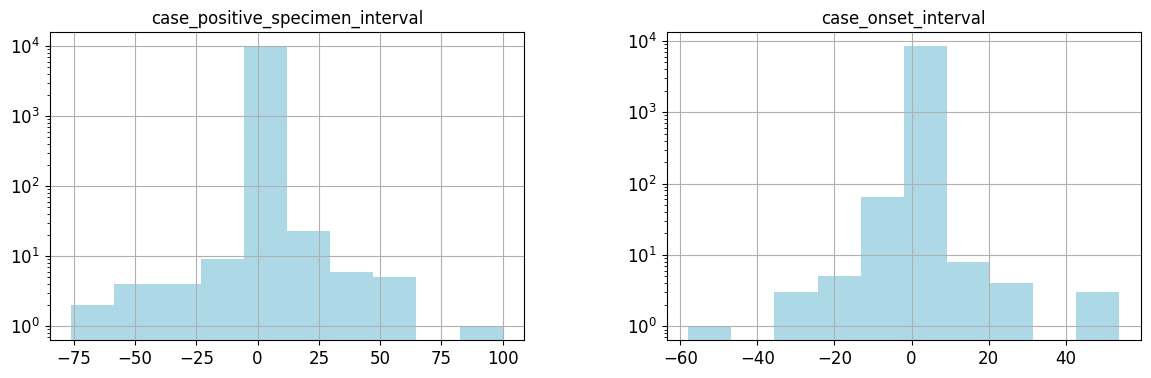

In [60]:
# Plot a histogram summary sheet of the continuous features and save in a png file
plt.rcParams.update({'font.size': 22}) # must set in top
df2[continuous_features].hist(layout=(6, 4), figsize=(30,30), bins=10, color = 'lightblue',log=True)
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)
#df2[continuous_features].plot(kind='hist', subplots=True, figsize=(30,15), layout=(3,3), sharex=False, sharey=False, color = 'green')
plt.savefig('continuous_histograms_1-1.pdf')

### - Plot histograms individual sheet for all the continuous features.

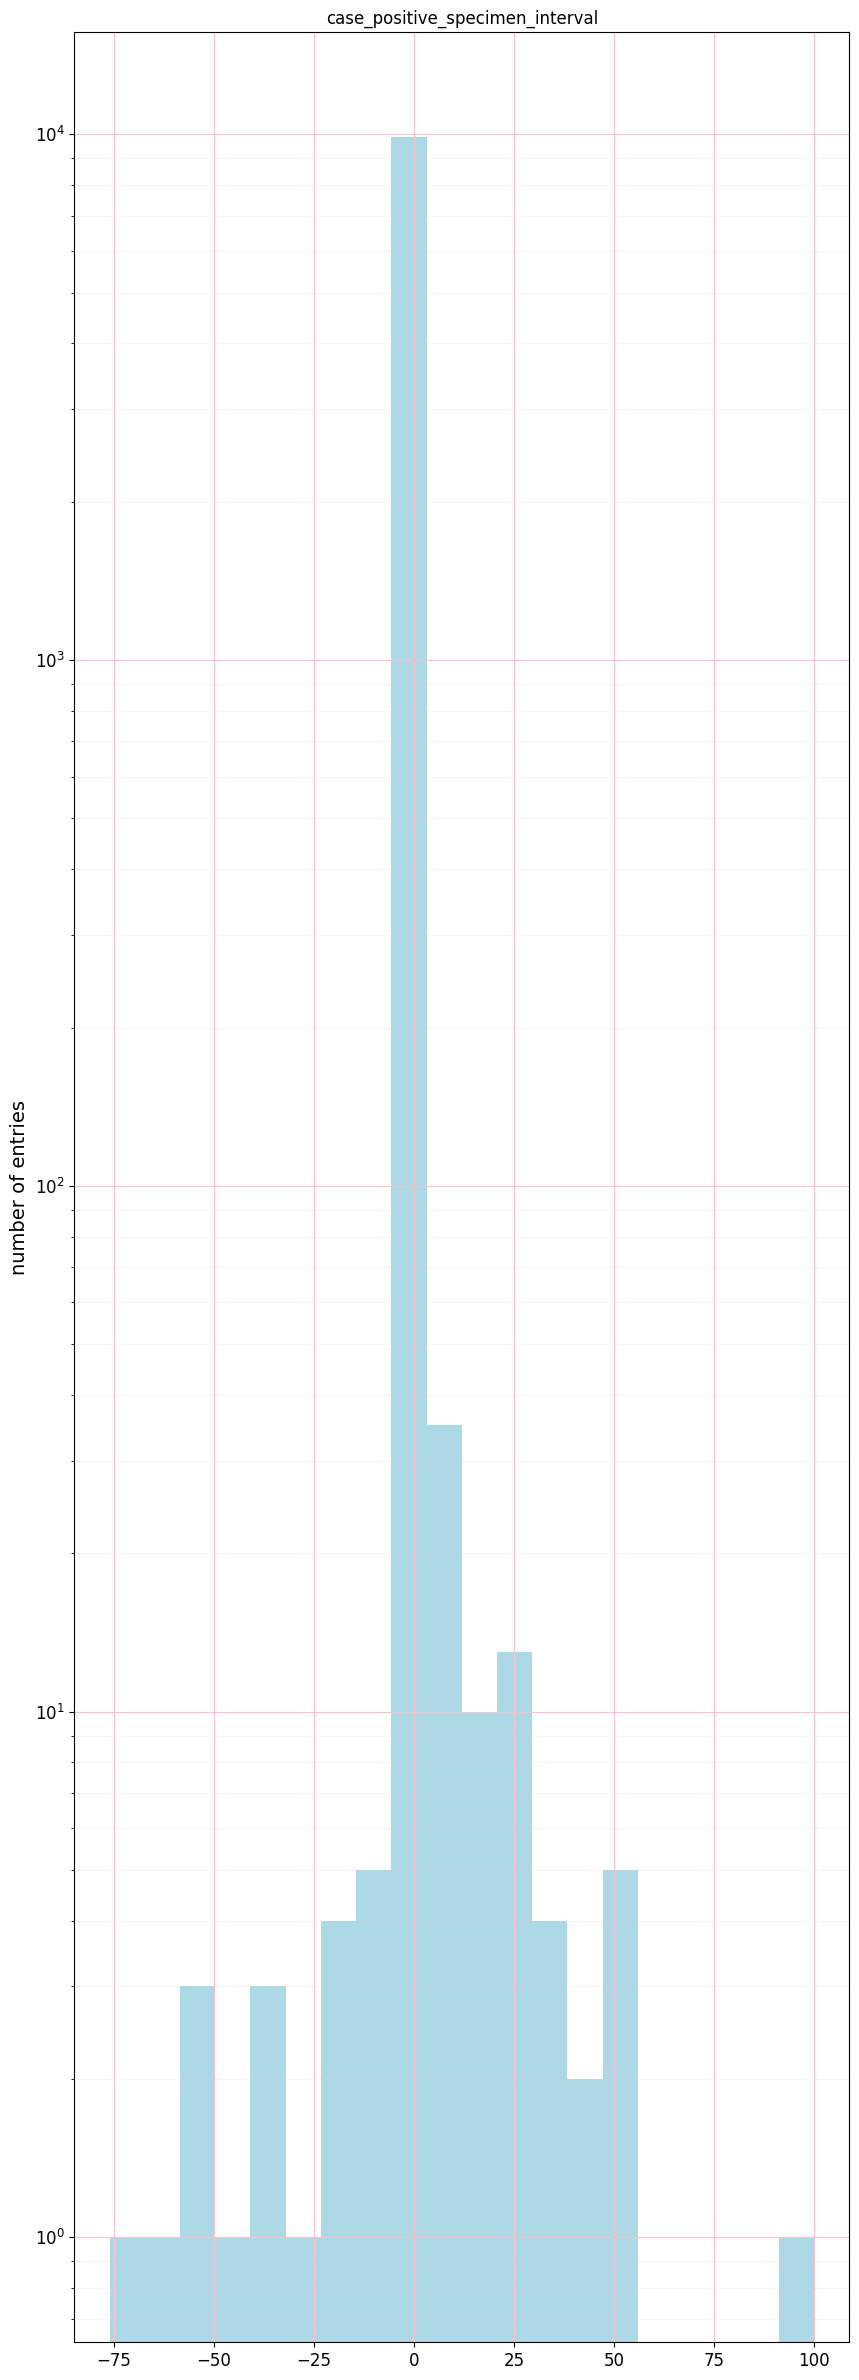

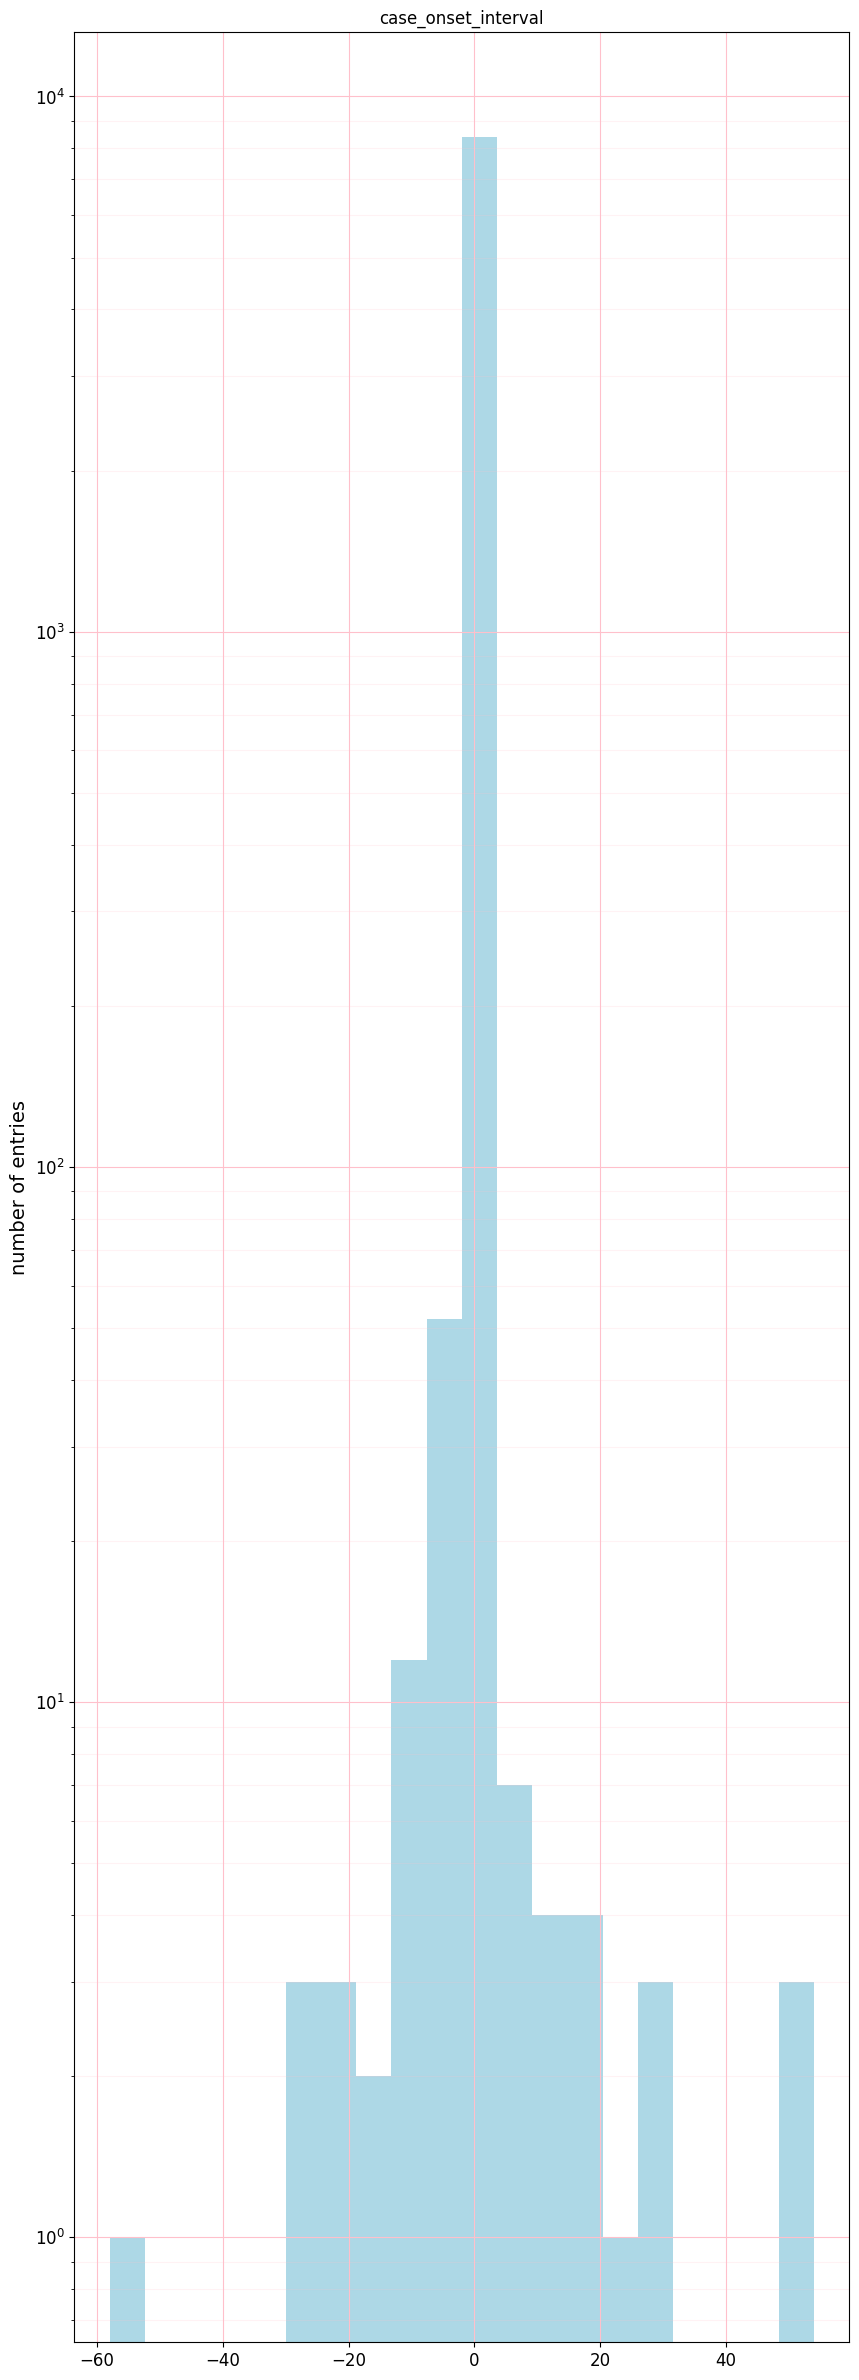

In [61]:
for col in continuous_features:
        f = df2[col].plot(kind='hist', figsize=(10,30), bins=20,color = 'lightblue',log=True)
        plt.title(col)
        plt.ylabel('number of entries')
        plt.grid(b=True, which='major', color='pink', linestyle='-')
        plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)
        plt.show()    

### - Plot box plots for all the continuous features.

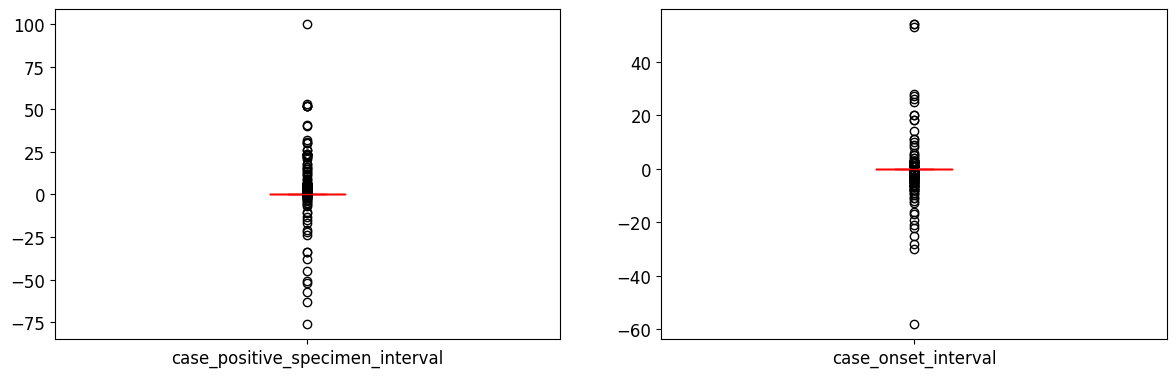

In [62]:
df2[continuous_features].plot(kind='box', subplots=True, figsize=(30,30), layout=(6,4), sharex=False, sharey=False,color = 'red')
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)
plt.savefig('continuous_boxplots__summary1-1.pdf')

### - Plot box plots individual sheet for all the continuous features.

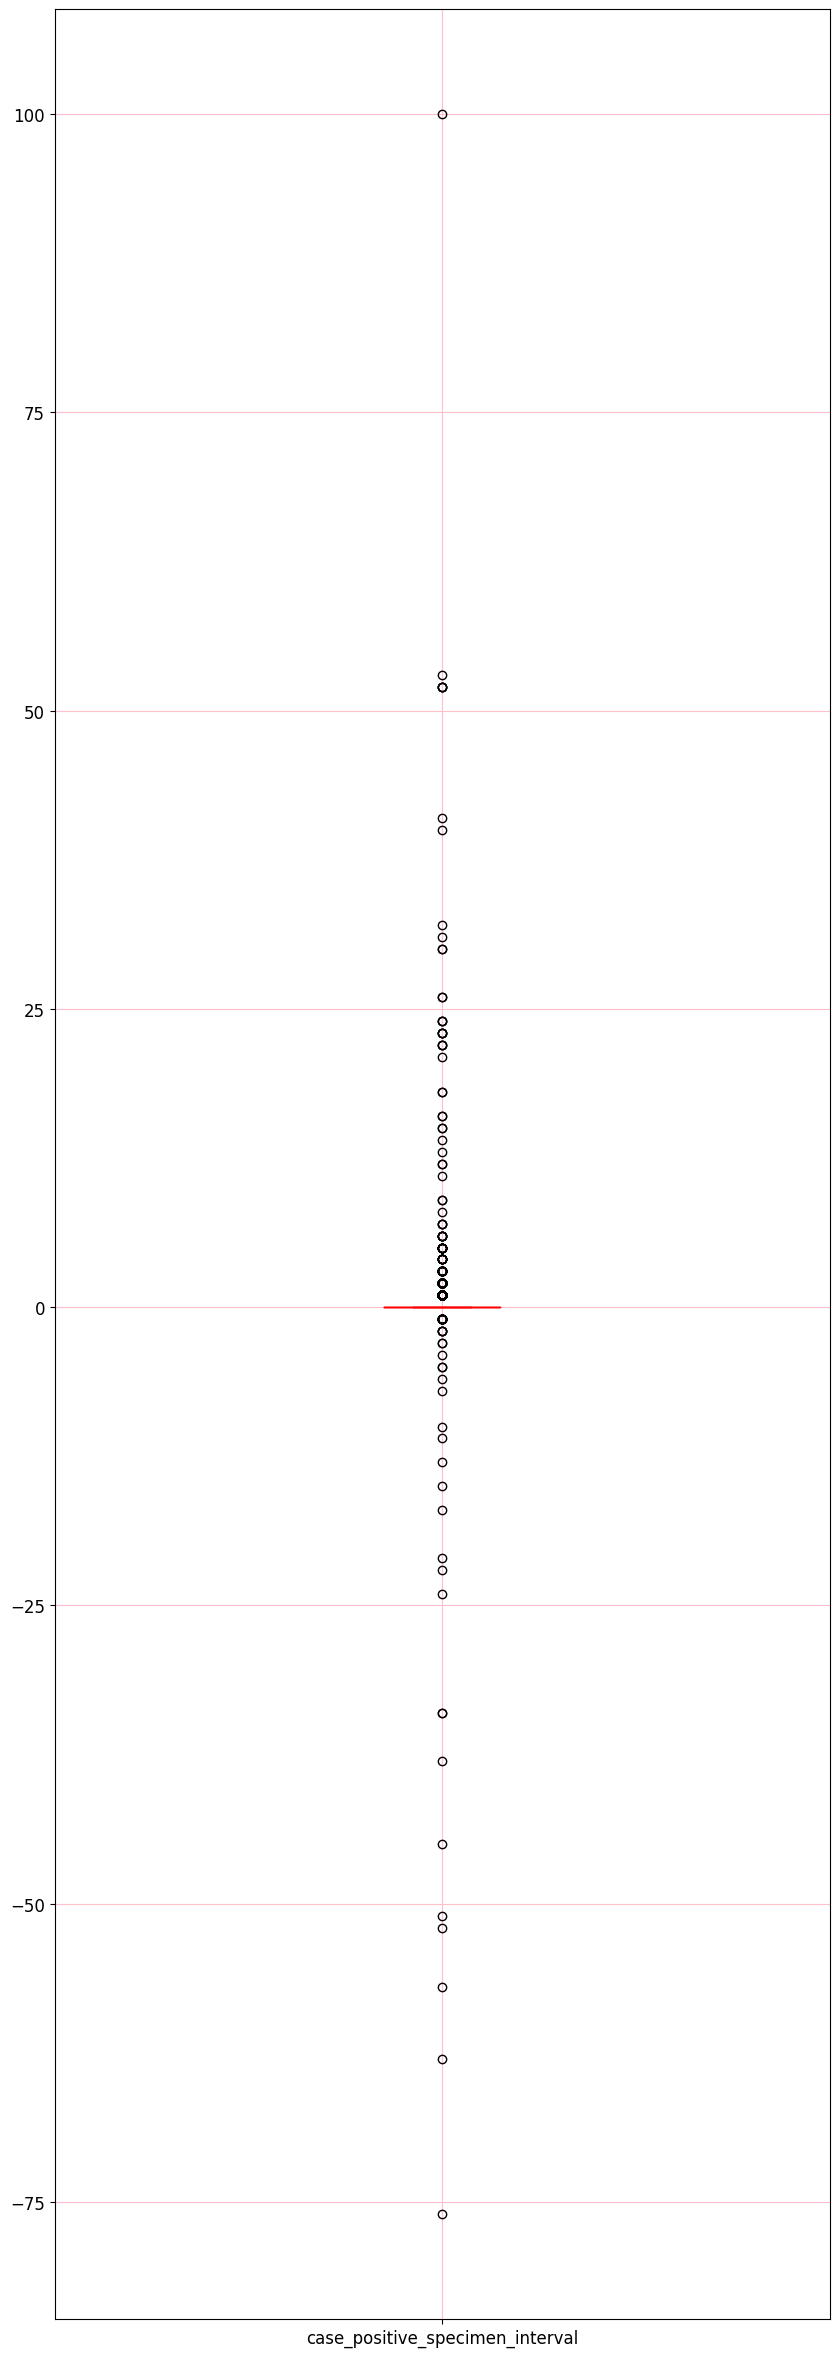

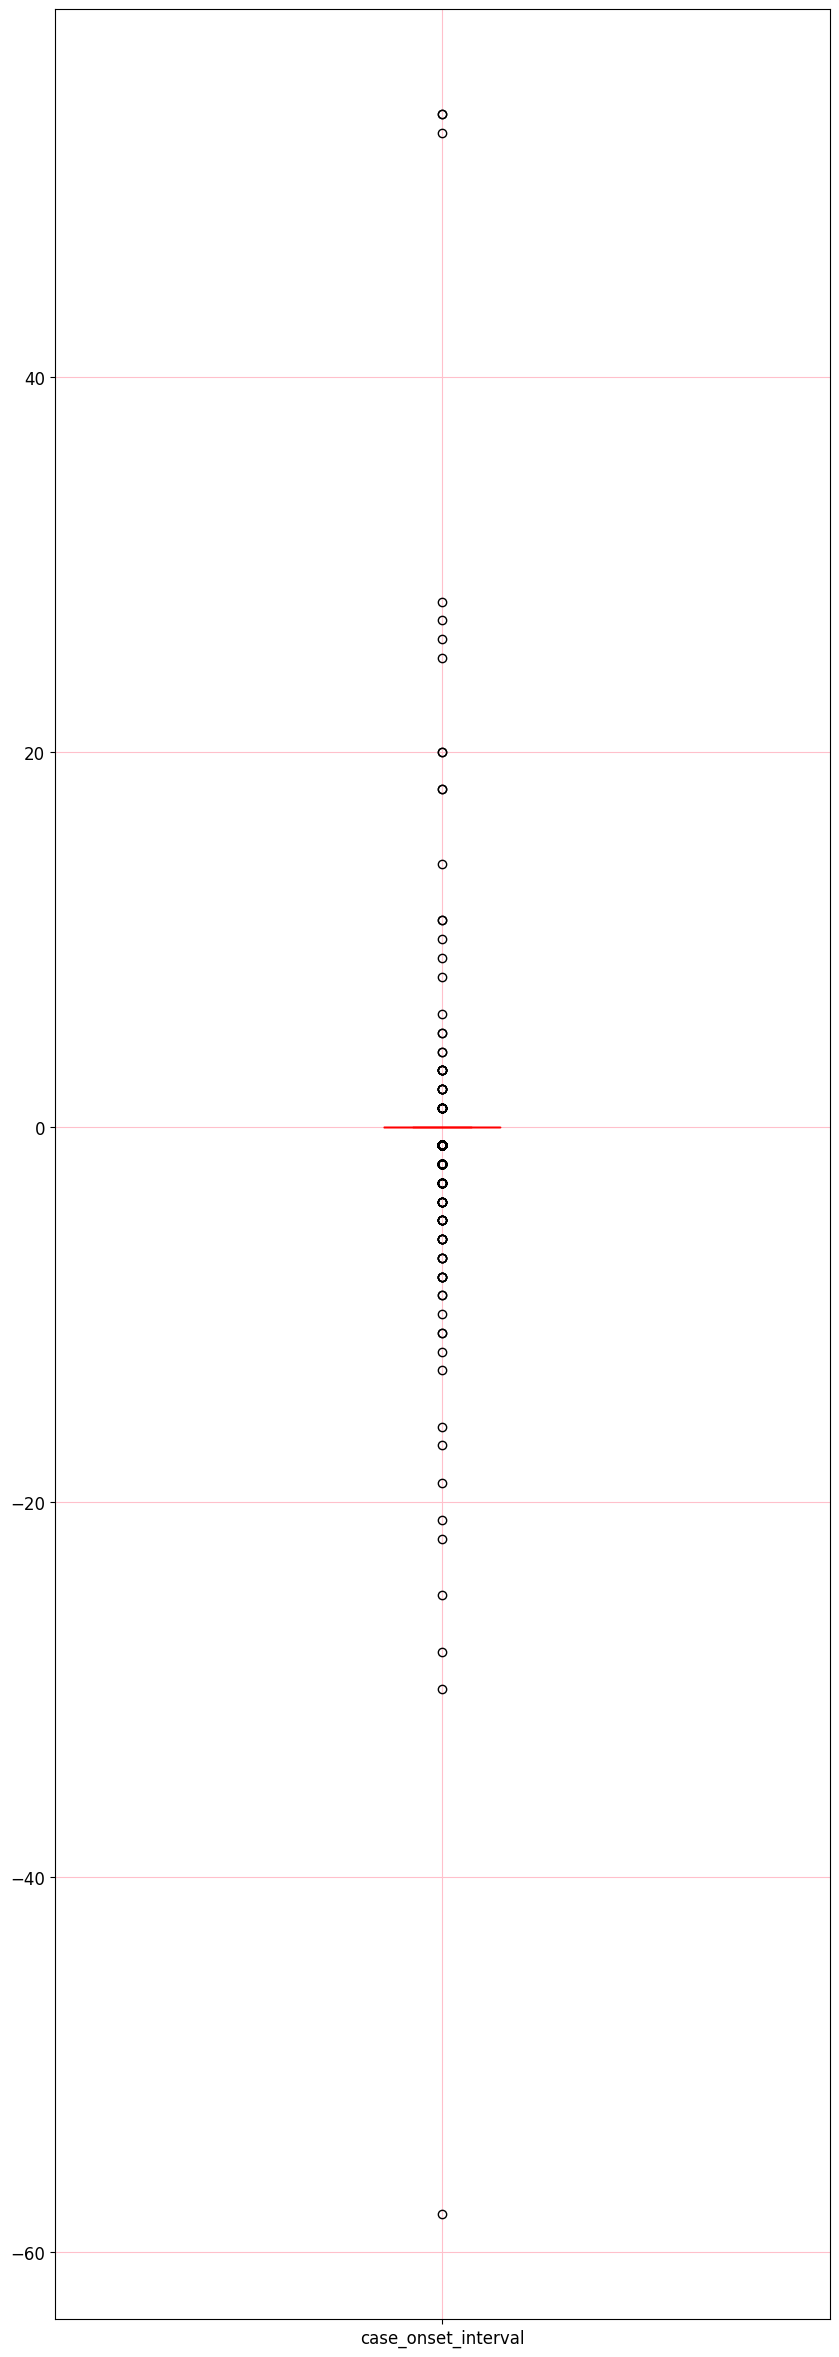

In [63]:
# Plot box plots for all the continuous features
with PdfPages('continuous_boxplots_1-1.pdf') as pp:
    for col in continuous_features:
        f = df2[col].plot(kind='box', figsize=(10,30),color = 'red')
        plt.grid(b=True, which='major', color='pink', linestyle='-')
        plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)
        pp.savefig(f.get_figure())
        plt.show()    

### - Plot bar plots for all the categorical features.

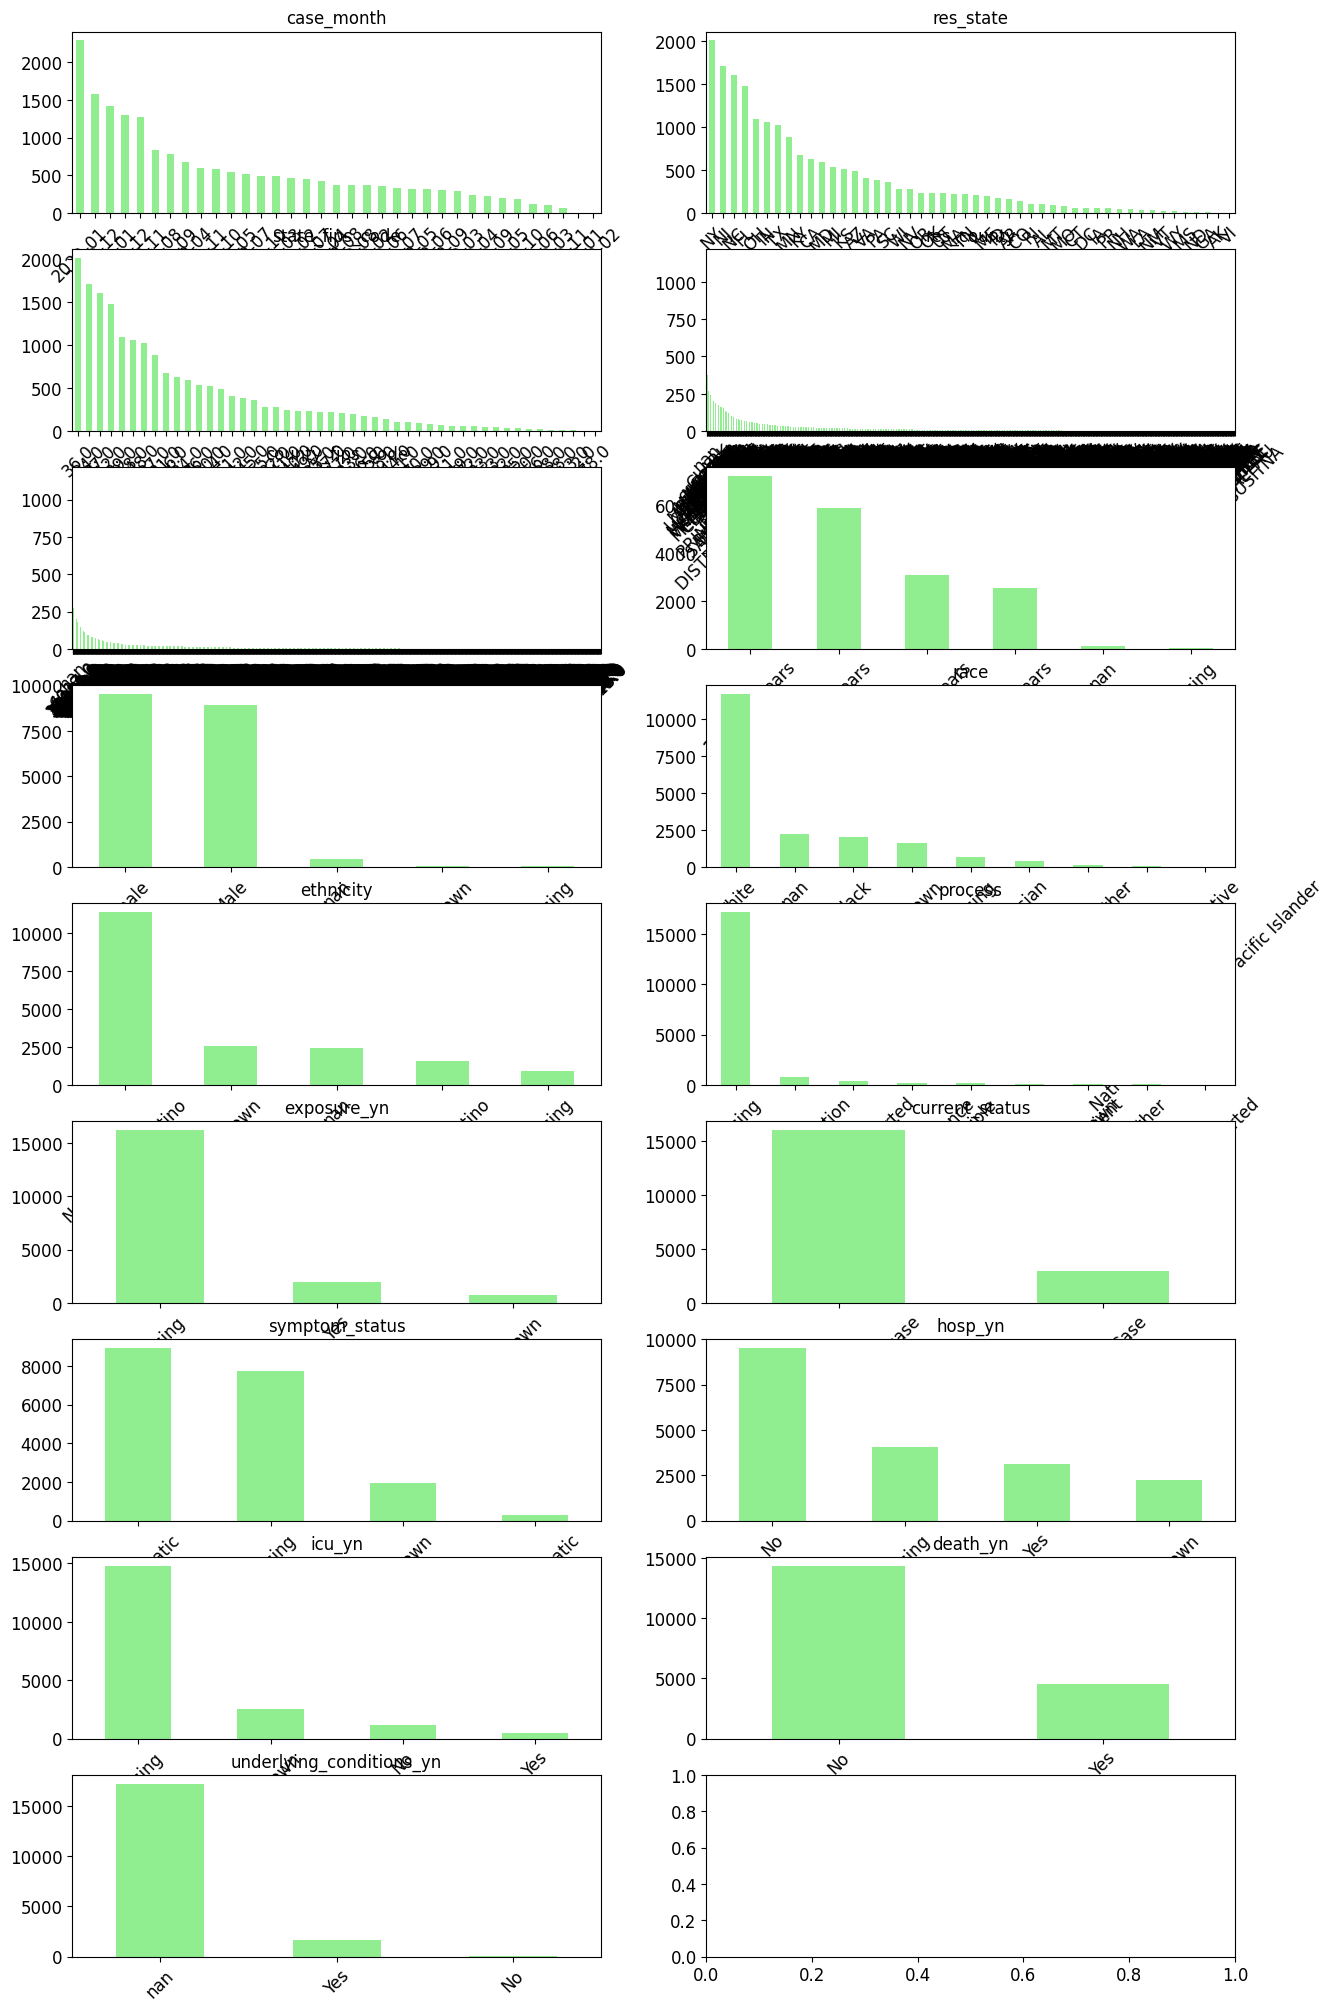

In [64]:
#df2[categorical_columns].value_counts(dropna=False).plot(kind='bar',title=column,layout=(6, 4), figsize=(15,5),sharex=False, sharey=False,color = 'Orange')

#f = df2[column].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(5,5))

fig,axes=plt.subplots(9,2)
df2['case_month'].value_counts(dropna=False).plot(kind='bar', title='case_month', figsize=(15,25),color = 'lightgreen',ax=axes[0,0],rot=45)
df2['res_state'].value_counts(dropna=False).plot(kind='bar', title='res_state', figsize=(15,25),color = 'lightgreen',ax=axes[0,1],rot=45)
df2['state_fips_code'].value_counts(dropna=False).plot(kind='bar', title='state_fips_code', figsize=(15,25),color = 'lightgreen',ax=axes[1,0],rot=45)
df2['res_county'].value_counts(dropna=False).plot(kind='bar', title='res_county', figsize=(15,25),color = 'lightgreen',ax=axes[1,1],rot=45)
df2['county_fips_code'].value_counts(dropna=False).plot(kind='bar', title='county_fips_code', figsize=(15,25),color = 'lightgreen',ax=axes[2,0],rot=45)
df2['age_group'].value_counts(dropna=False).plot(kind='bar', title='age_group', figsize=(15,25),color = 'lightgreen',ax=axes[2,1],rot=45)
df2['sex'].value_counts(dropna=False).plot(kind='bar', title='sex', figsize=(15,25),color = 'lightgreen',ax=axes[3,0],rot=45)
df2['race'].value_counts(dropna=False).plot(kind='bar', title='race', figsize=(15,25),color = 'lightgreen',ax=axes[3,1],rot=45)
df2['ethnicity'].value_counts(dropna=False).plot(kind='bar', title='ethnicity', figsize=(15,25),color = 'lightgreen',ax=axes[4,0],rot=45)
df2['process'].value_counts(dropna=False).plot(kind='bar', title='process', figsize=(15,25),color = 'lightgreen',ax=axes[4,1],rot=45)
df2['exposure_yn'].value_counts(dropna=False).plot(kind='bar', title='exposure_yn', figsize=(15,25),color = 'lightgreen',ax=axes[5,0],rot=45)
df2['current_status'].value_counts(dropna=False).plot(kind='bar', title='current_status', figsize=(15,25),color = 'lightgreen',ax=axes[5,1],rot=45)
df2['symptom_status'].value_counts(dropna=False).plot(kind='bar', title='symptom_status', figsize=(15,25),color = 'lightgreen',ax=axes[6,0],rot=45)
df2['hosp_yn'].value_counts(dropna=False).plot(kind='bar', title='hosp_yn', figsize=(15,25),color = 'lightgreen',ax=axes[6,1],rot=45)
df2['icu_yn'].value_counts(dropna=False).plot(kind='bar', title='icu_yn', figsize=(15,25),color = 'lightgreen',ax=axes[7,0],rot=45)
df2['death_yn'].value_counts(dropna=False).plot(kind='bar', title='death_yn', figsize=(15,25),color = 'lightgreen',ax=axes[7,1],rot=45)
df2['underlying_conditions_yn'].value_counts(dropna=False).plot(kind='bar', title='underlying_conditions_yn', figsize=(15,25),color = 'lightgreen',ax=axes[8,0],rot=45)
plt.show()



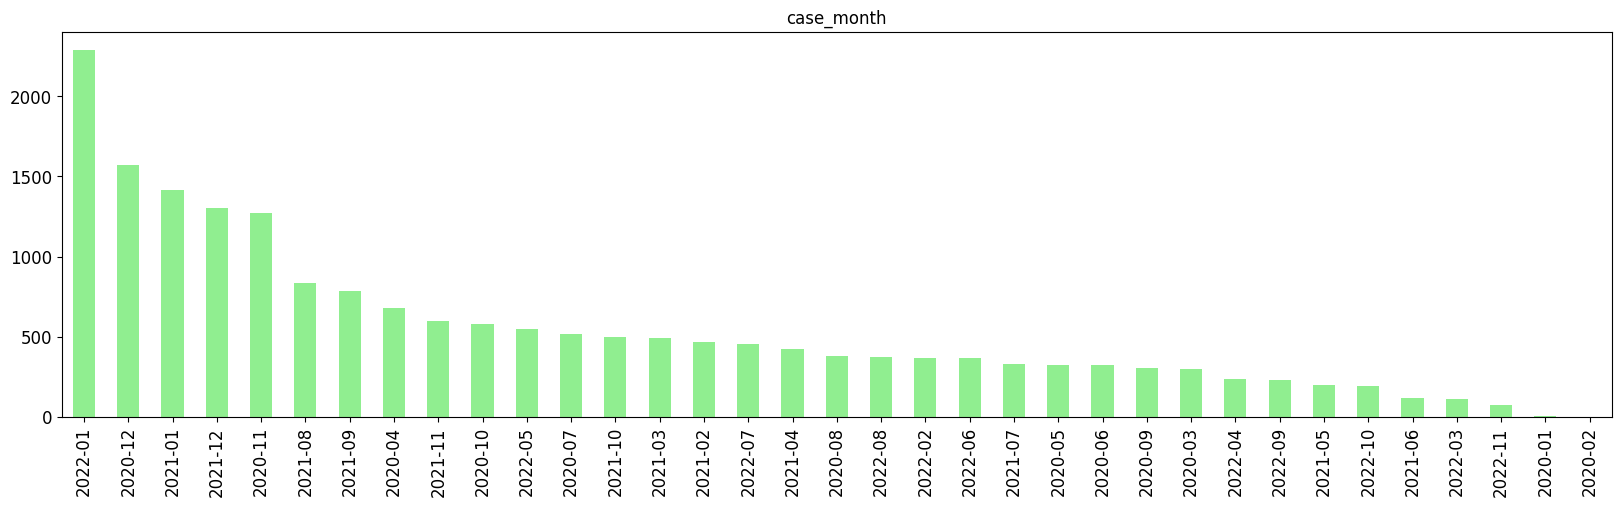

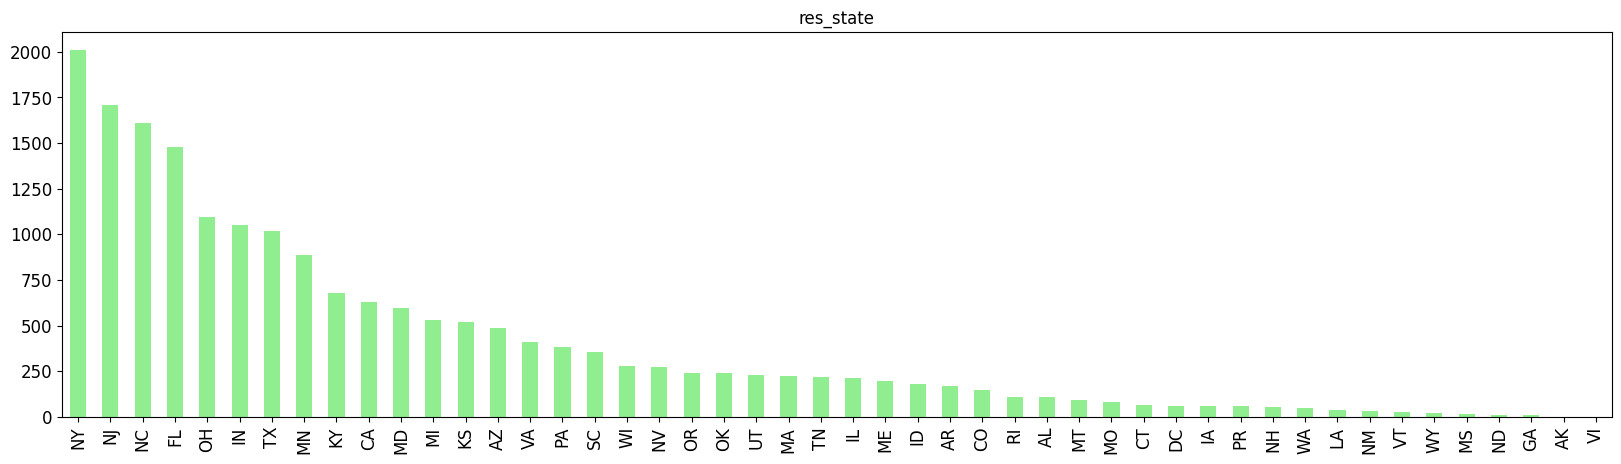

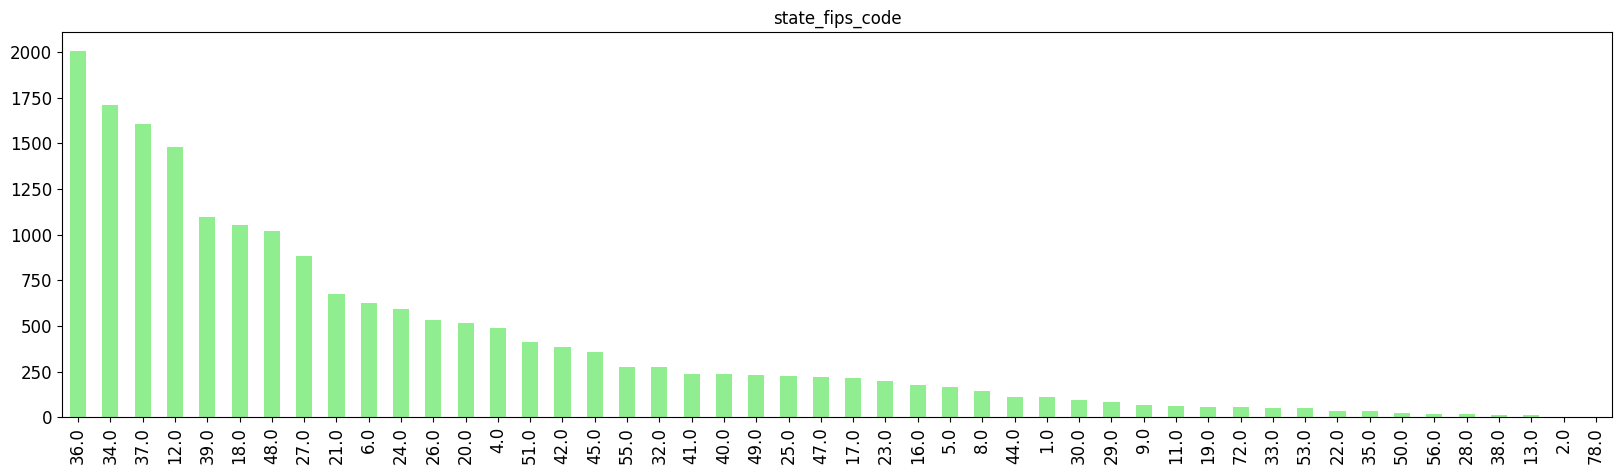

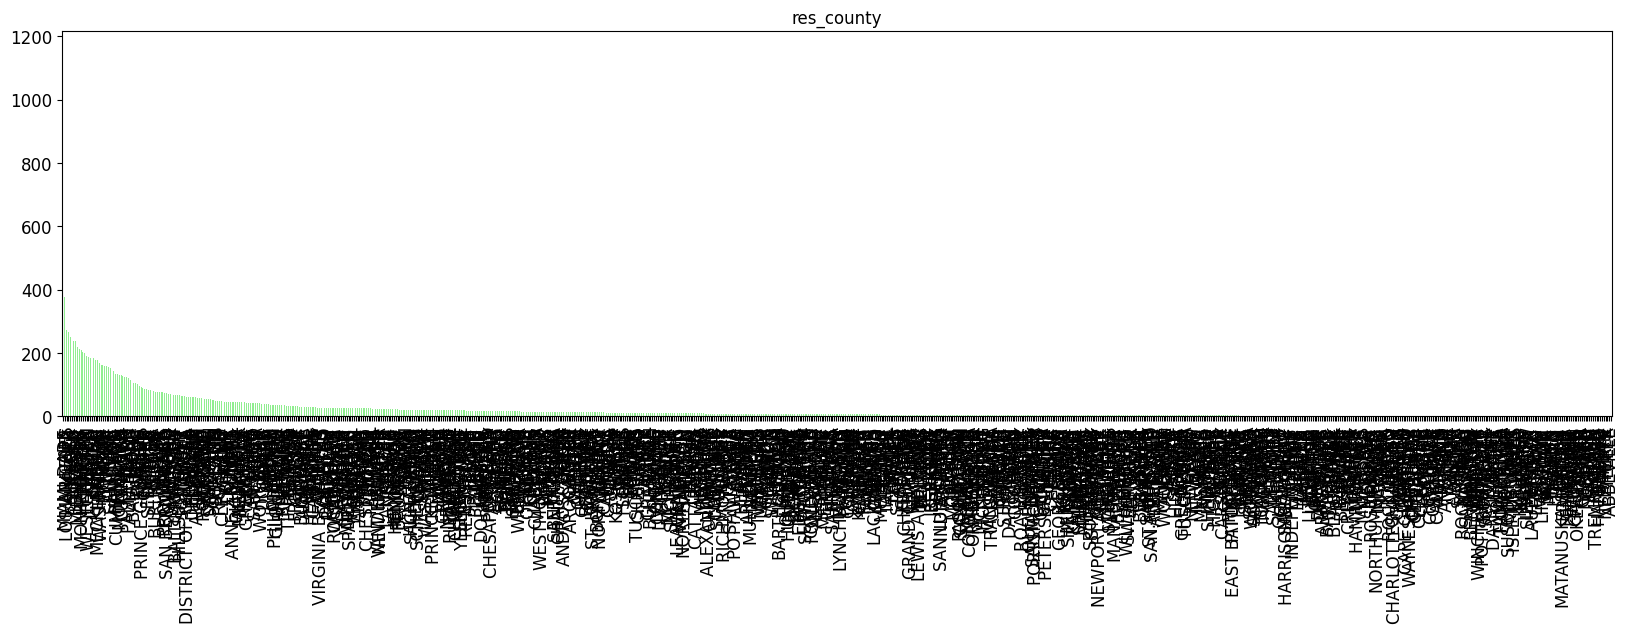

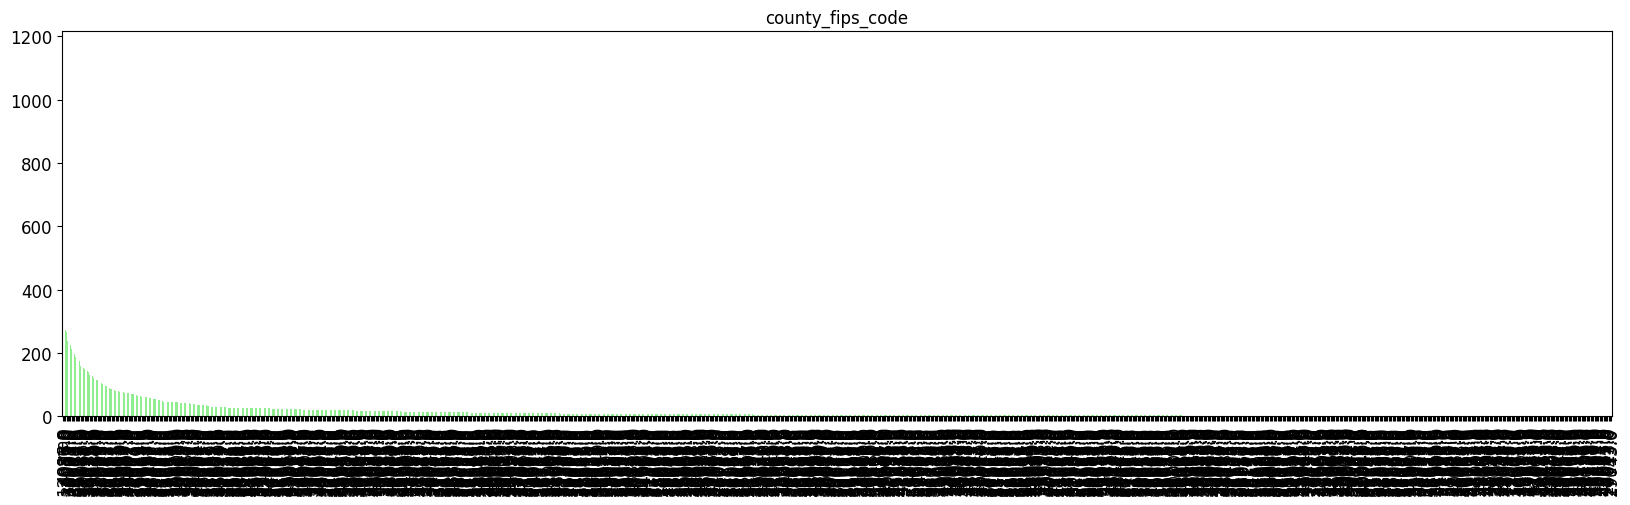

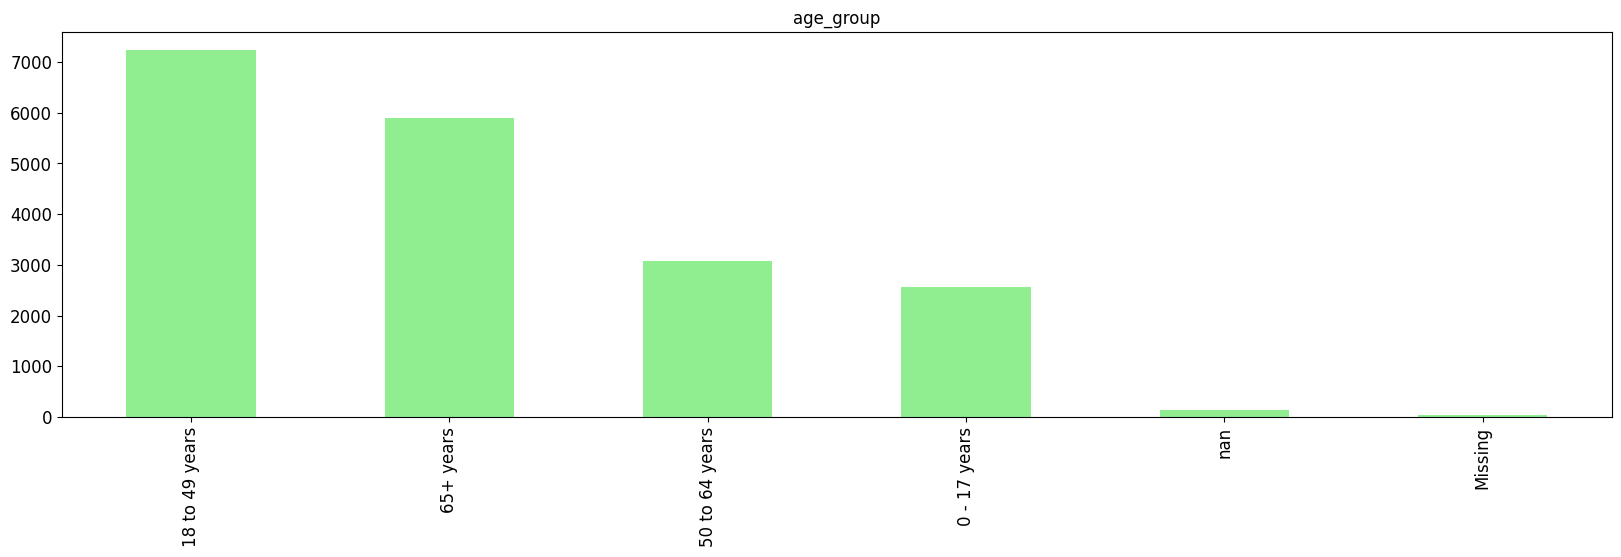

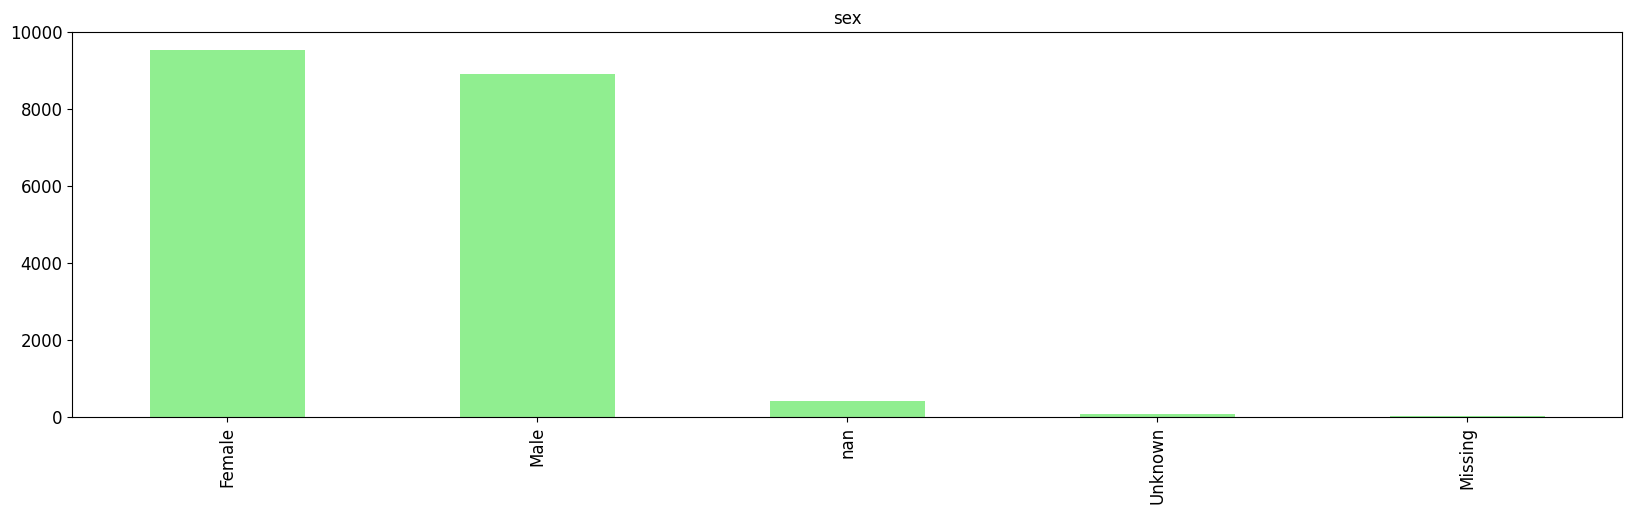

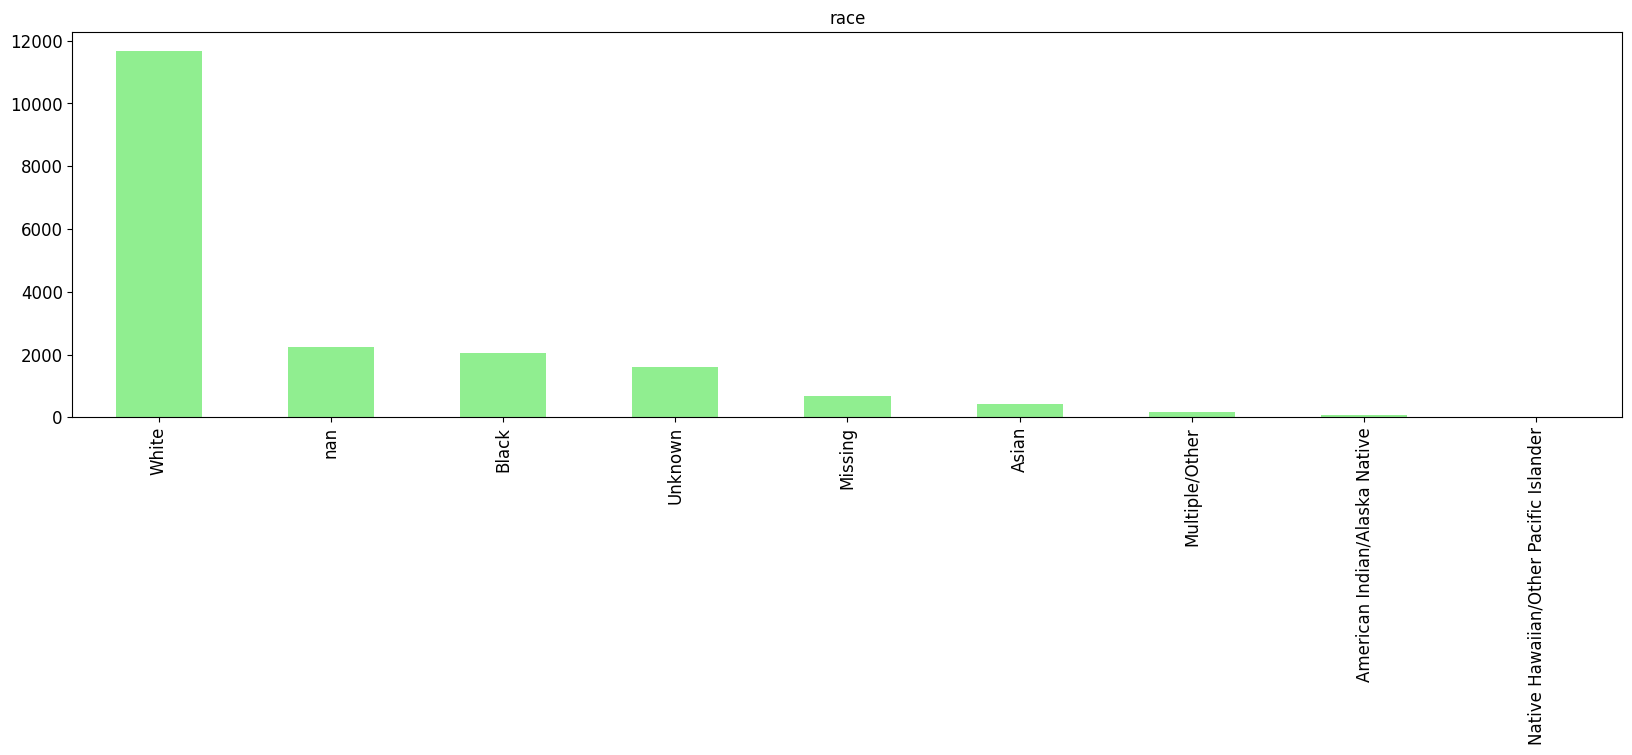

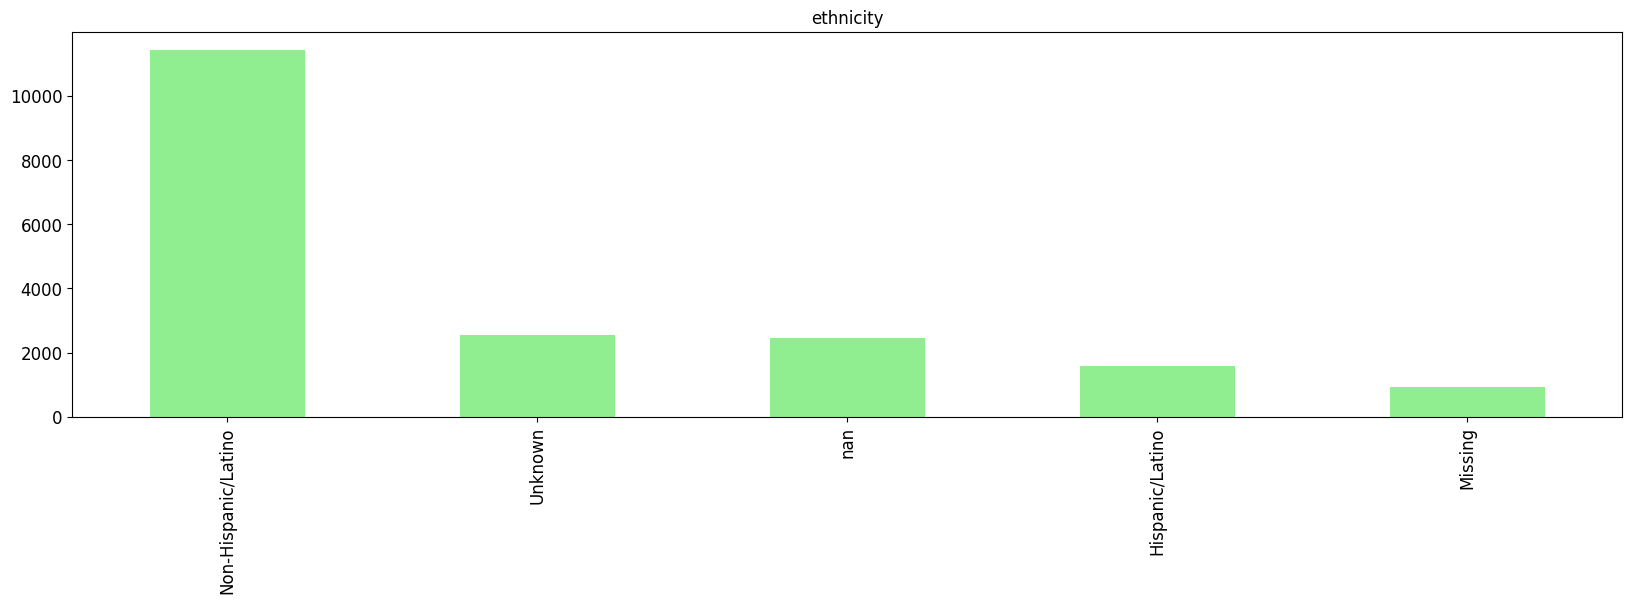

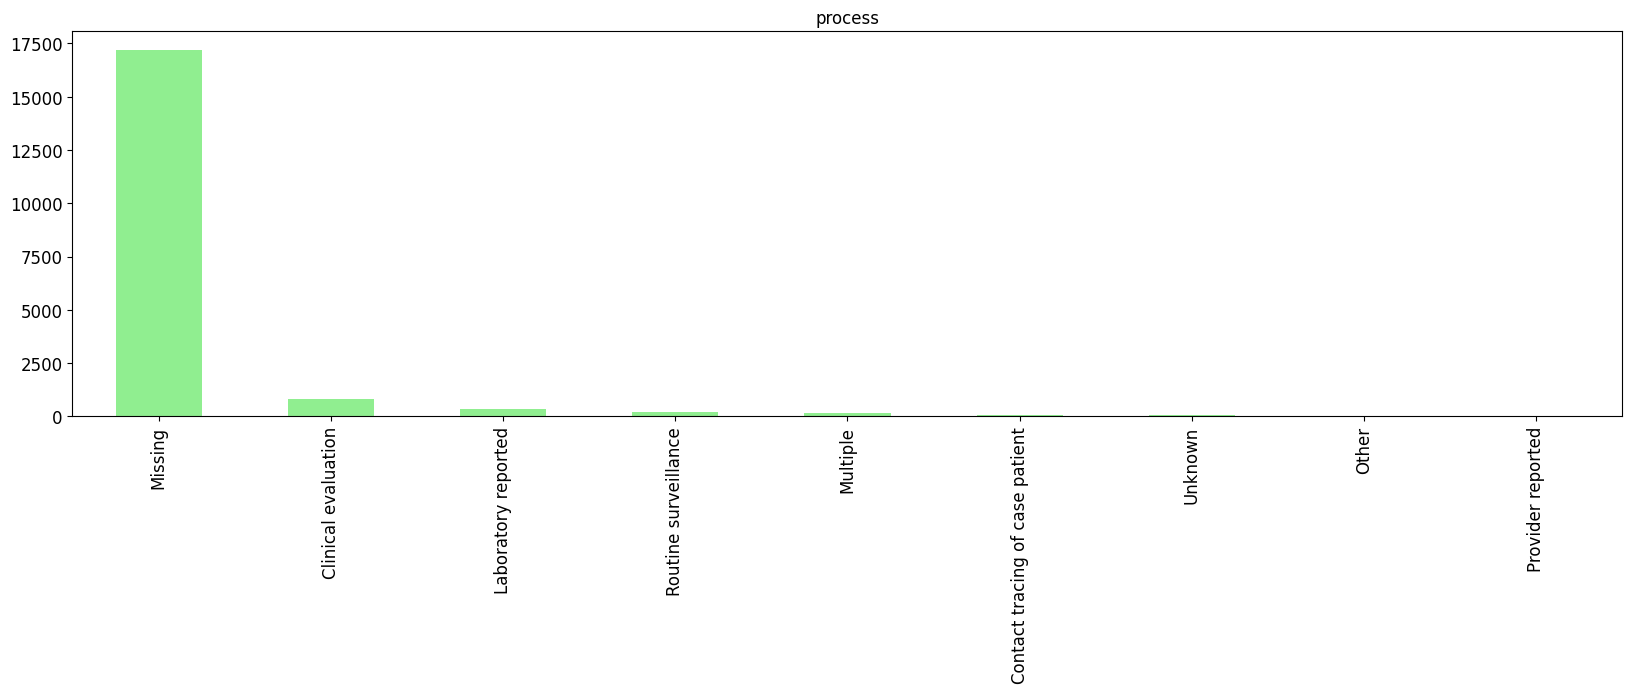

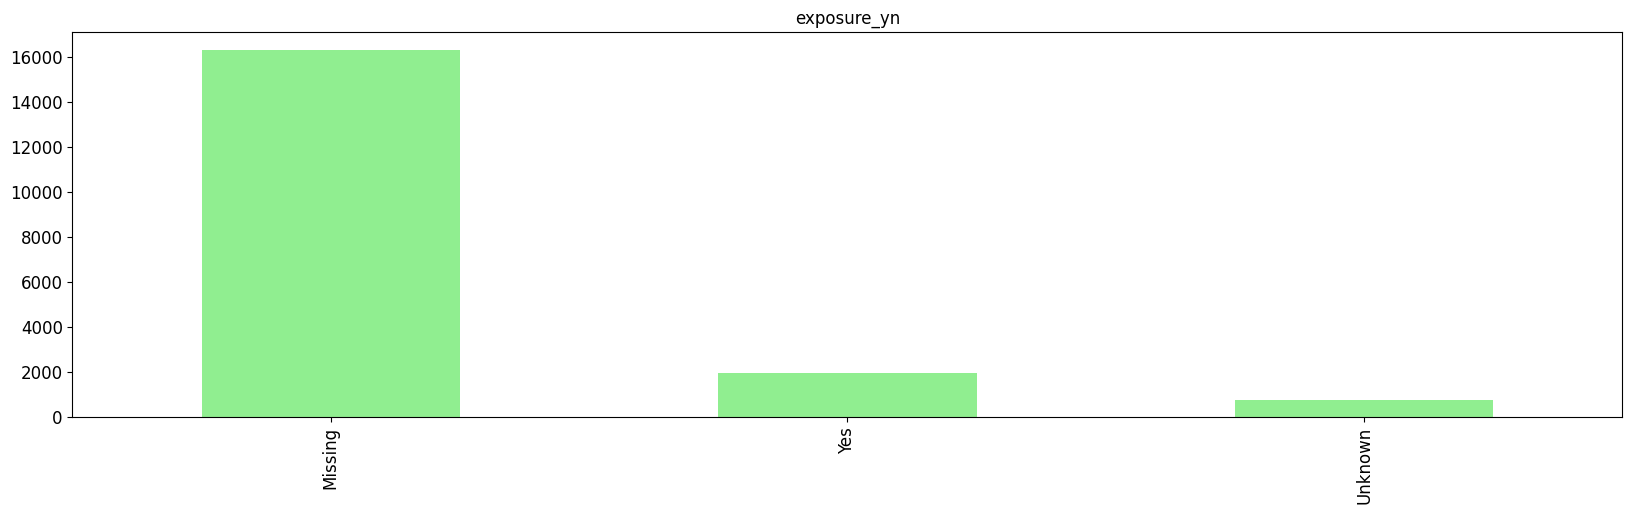

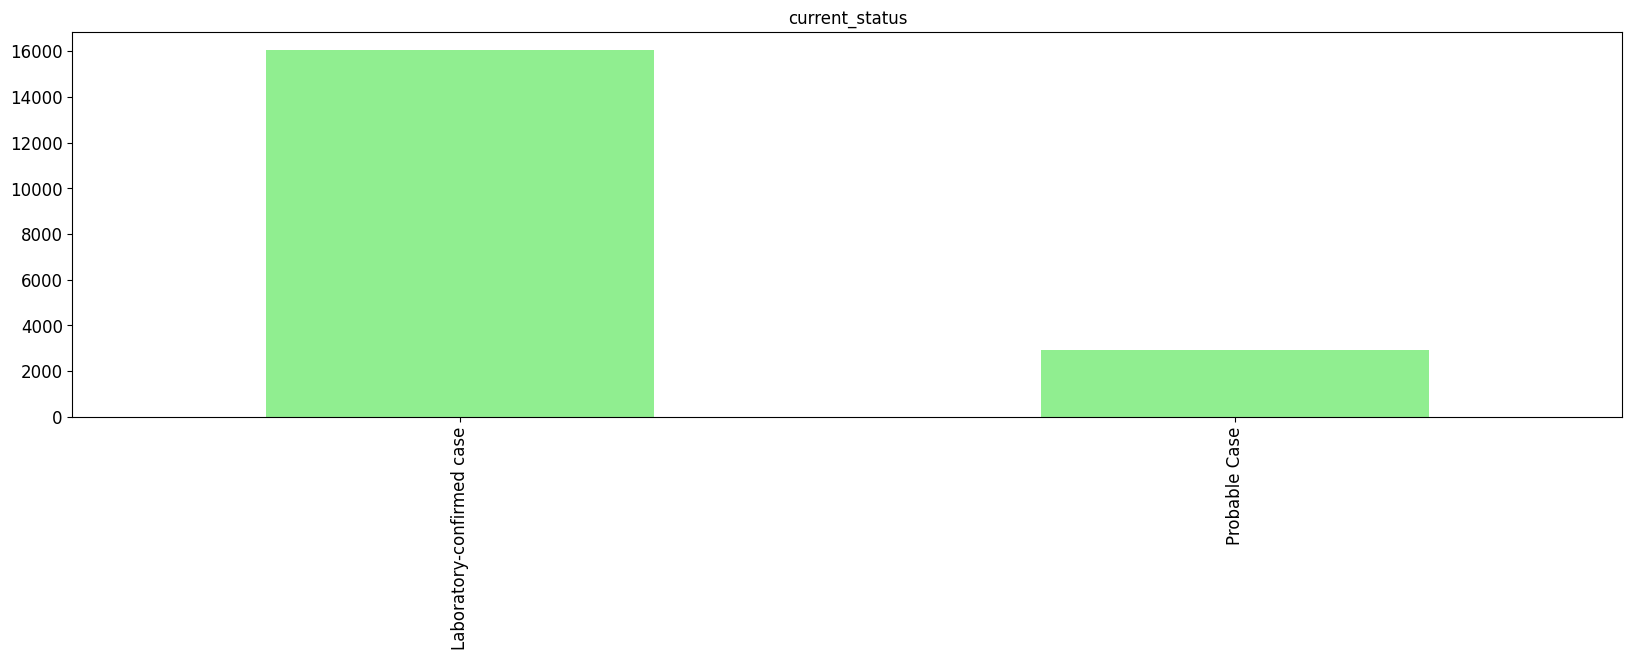

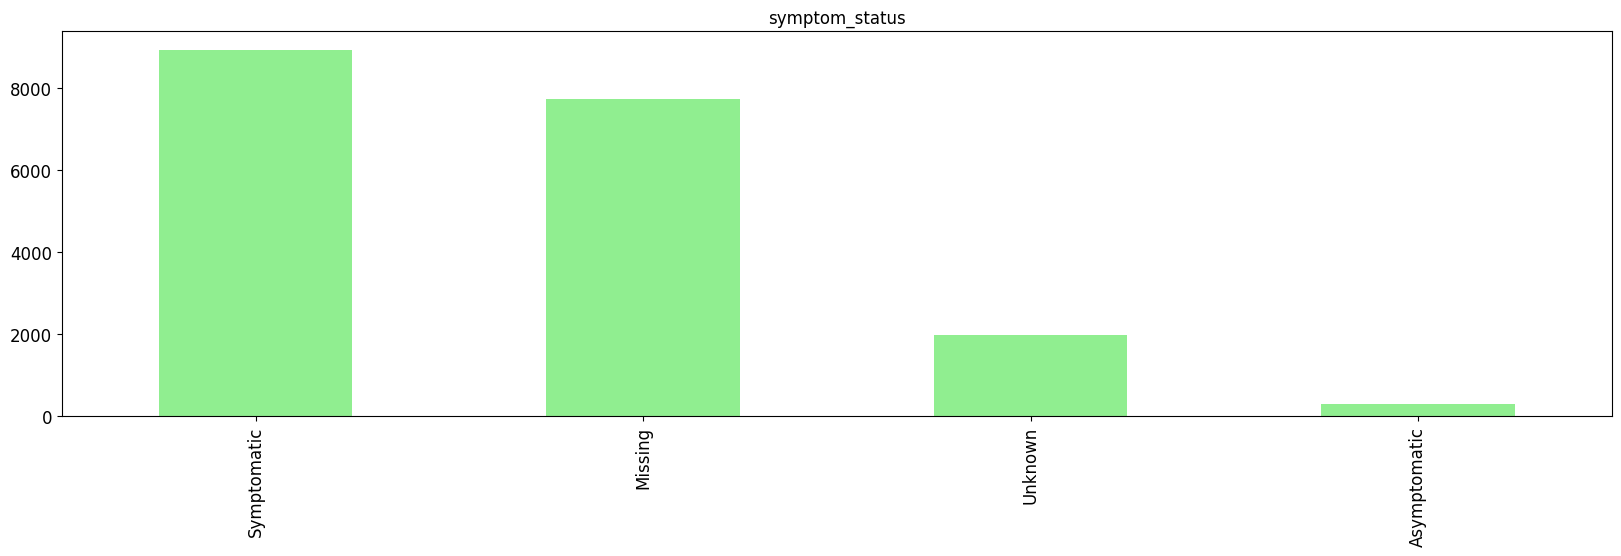

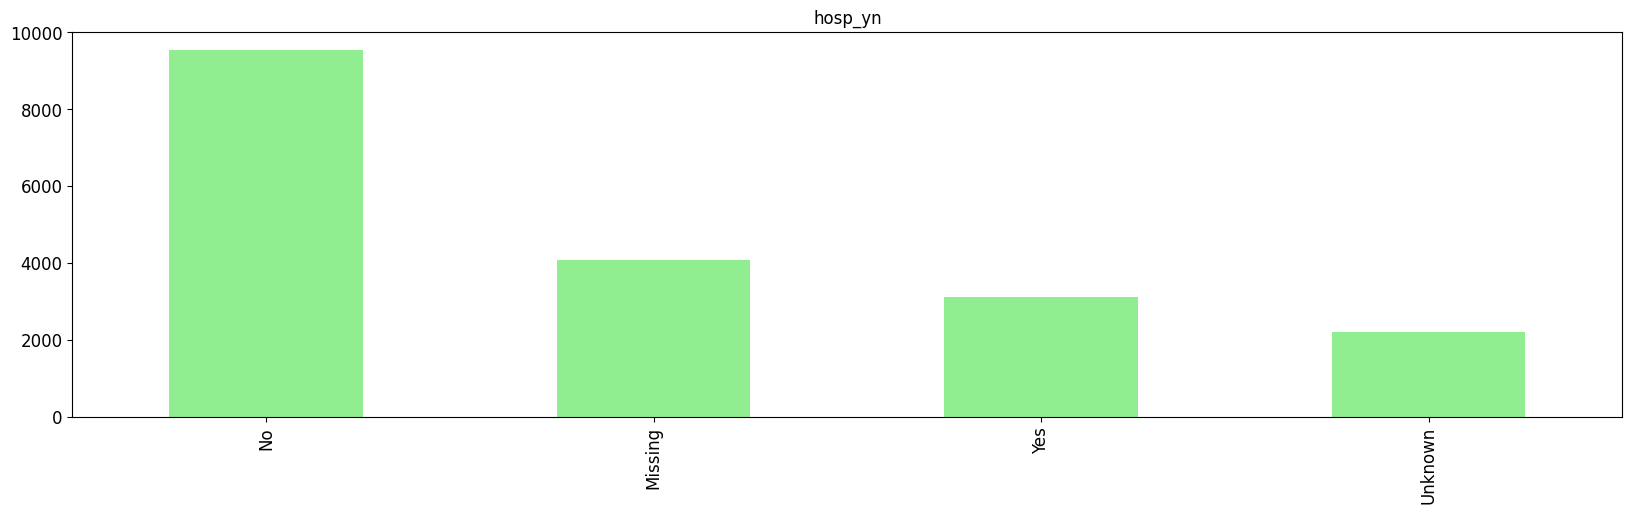

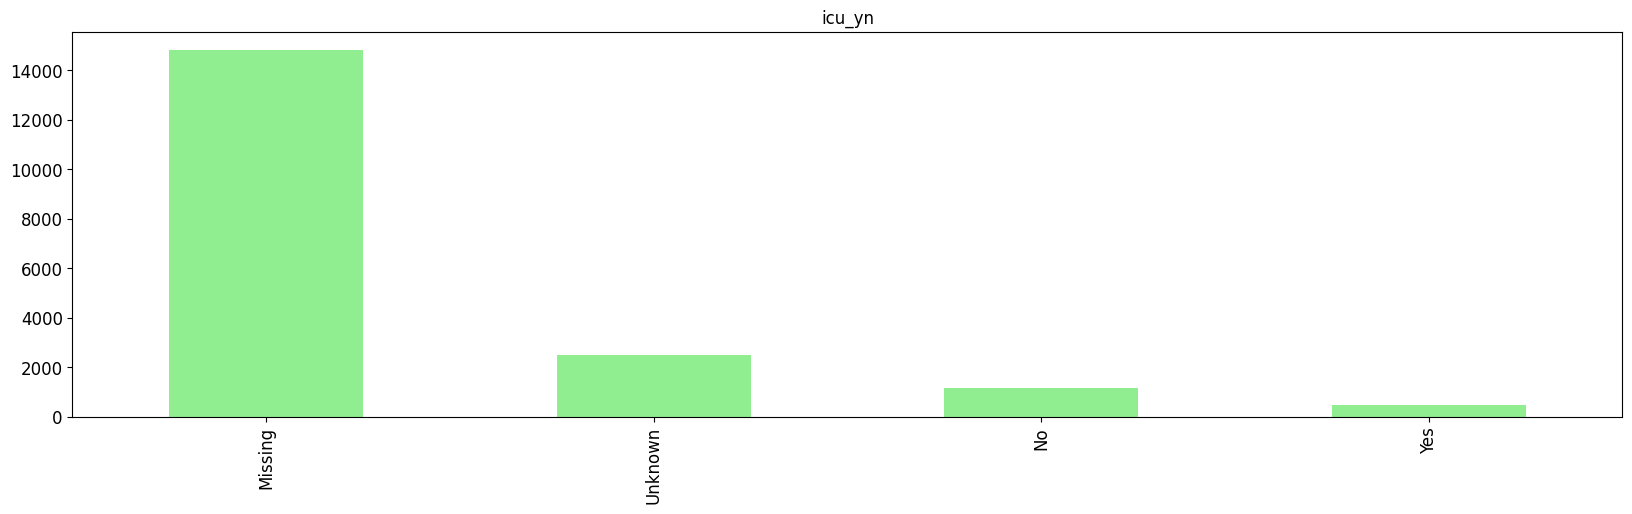

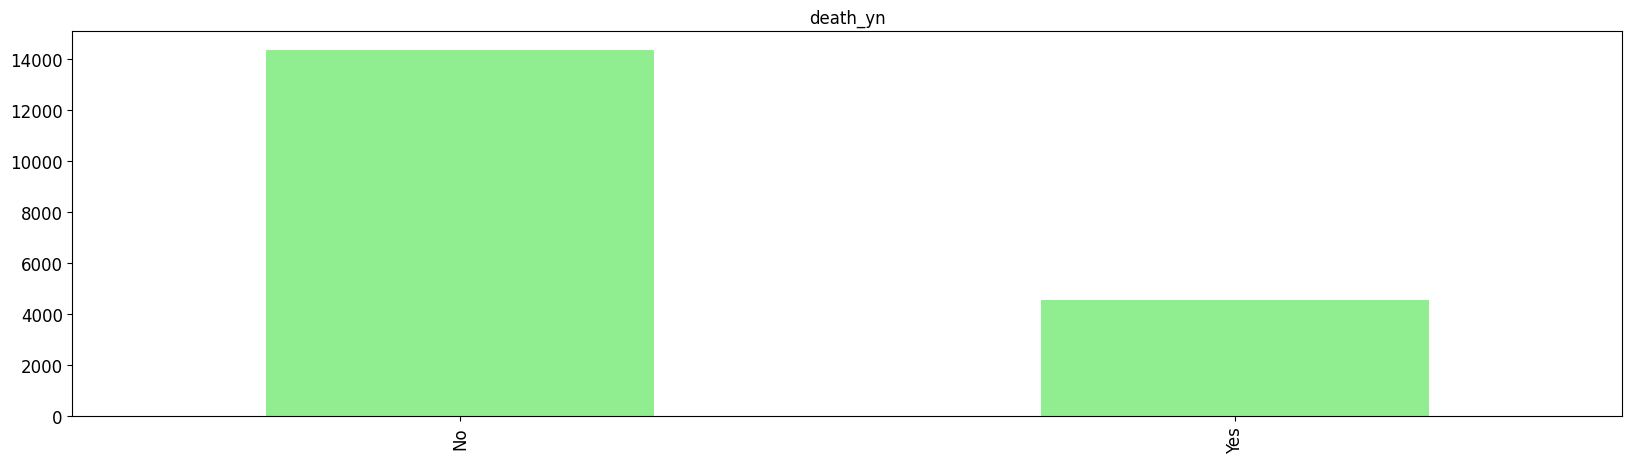

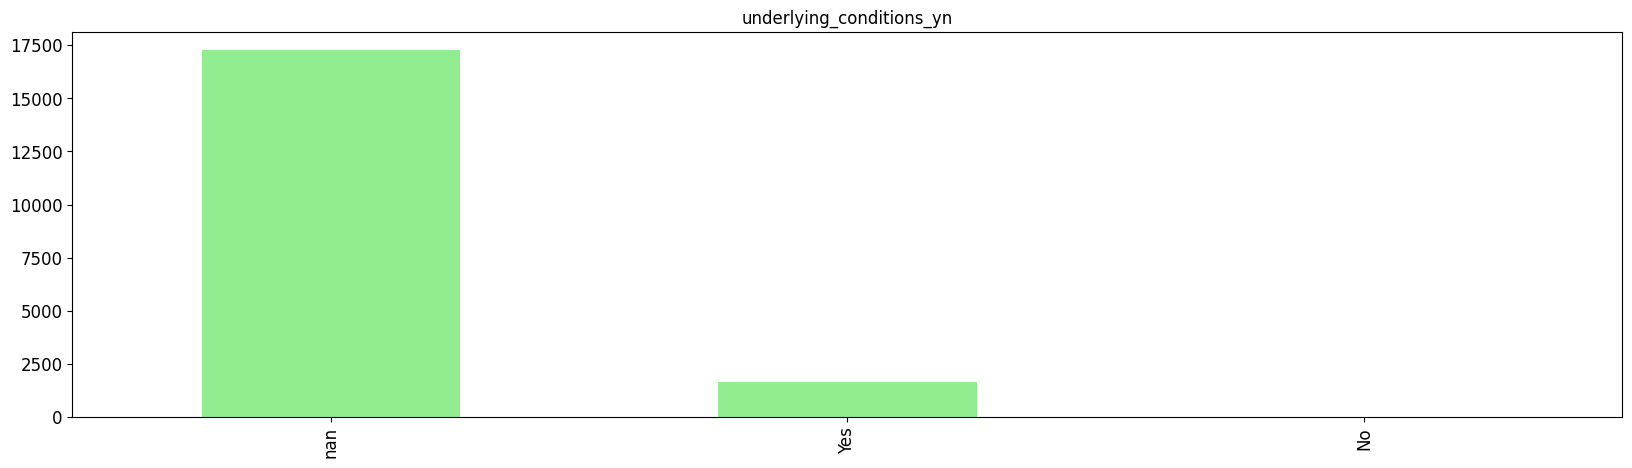

In [65]:
with PdfPages('categorical_barplots_1-1.pdf') as pp:
    for column in categorical_columns:
        f = df2[column].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(20,5),color = 'lightgreen')
        #plt.grid(b=True, which='major', color='pink', linestyle='-')
        #plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)
        pp.savefig(f.get_figure())
        plt.show()

## PART TWO

# Initial Findings

#### Initial findings and detailed discussion for each feature can be found in the accompanying *Data_Quality_Report_Initial_Findings.pdf* file

## Prepare a data quality plan for the cleaned CSV file.

- Mark down all the features where there are potential problems or data quality issues.


### The initial list of issues as identified in the **Data_Quality_Report_Initial_Findings.pdf**:

-  **Logical integrity** 
    - Test1: The negative 'case_positive_specimen_interval's value.
    
    - Test2: The negative 'case_onset_interval's value. 
    
    - Test3: If the 'case_onset_interal' value of entries is empty, and their 'symptom_status' = 'Symptomatic' at the same time, the missing 'case_onset_interal'can be assigned some meaningful value.
    
    - Test5_1: The patient has not been to the hospital but went to the ICU, which feels like a contradictory case.
    - Test5_2: If the 'icu_yn' value of entries is 'Missing', and their  'death_yn' = 'No' and 'hosp_yn'='No' at the same time, the missing 'icu_yn' value can be assigned some meaningful value.

    - Test6: Patients who died were unlikely to be asymptomatic, when they are the laboratory-confirmed cases.
    
    - Test7: If the 'case_positive_specimen_interval' value of entries is empty, and their 'current_status' ='Laboratory-confirmed case' at the same time, the missing 'case_onset_interal' can be assigned some meaningful value.
    
    - Test9: Asymptomatic patients are unlikely to be admitted to the ICU for treatment. Because the patient was admitted to the ICU, there must have been life-threatening manifestations.
    
    - Test12: When some entries''symptom_status' ='Missing' or 'Unknown' or is empty, and their 'death_yn' = 'Yes' . The 'symptom_status's value can be assigned some meaningful value. 
    
    
- **Continuous Features**
    - case_positive_specimen_interval: Same issues as Test1 and Test7
    - case_onset_interval: Same issues as Test2 and Test3
    

- **Categorical Features**
    - res_county: Many 'NaN' values exist.
    - county_fips_code: Many 'NaN' values exist.
    - age_group: Many 'NaN' values and 'Missing' values exist.
    - sex: Many 'NaN' values and 'Missing' values exist.
    - race: Many 'NaN' values and 'Missing' values exist.
    - ethnicity: Many 'NaN' values and 'Missing' values exist.
    - process: There are nearly 90.77% of 'Missing'values.
    - exposure_yn: There are over 80% of 'Missing'values.
    - symptom_status: Many 'Missing' values exist.
    - hosp_yn: Many 'Missing' values exist.
    - icu_yn:  Many 'Missing' values exist.
    - underlying_conditions_yn: There are nearly 91% of 'Missing'values.

- **Outliers** 
    - Presence of outliers: There are a significant number of outliers present across a range of different features. They initially look plausible but will need to be investigated further.


- Propose solutions to deal with the problems identified. Explain why did you choose one solution over 
potentially many other. It is very important to provide justification for your thinking in this part and to list potential solutions, including the solution that will be implemented to clean the data.

### - Propose solutions to deal with the problems identified. 

***For uniformity, mark all missing values and null values as 'Unknown'!***

- **Logical integrity** 
    - Test1: The negative 'case_positive_specimen_interval's value will be addressed by switching back to positive number. 
    - Test2: The negative 'case_onset_interval's value will be addressed by switching back to positive number. 
    - Test3: Imputation. If the 'case_onset_interal' value of entries is empty, and their 'symptom_status' = 'Symptomatic' at the same time, the missing 'case_onset_interal' will be replaced by “0”.
    - Test5_1: Rows failing this logical test will need to be dropped.
    - Test5_2: Imputation.If the 'icu_yn' value of entries is 'Missing', and their  'death_yn' = 'No' and 'hosp_yn'='No' at the same time, the missing 'icu_yn' value can be changed to 'No'.   
    - Test6: Rows failing this logical test will need to be dropped.
    - Test7: Imputation.If the 'case_positive_specimen_interval' value of entries is empty, and their 'current_status' = 'Laboratory-confirmed case' at the same time, the missing 'case_onset_interal' will be replaced by “0”.
    - Test9: Rows failing this logical test will need to be dropped.
    - Test12: Imputation.When some entries''symptom_status' ='Missing' or 'Unknown' or is empty, and their 'death_yn' = 'Yes' . The 'symptom_status's value can be changed to 'Symptomatic'. 
- **Continuous Features**
    - case_positive_specimen_interval: Same action as Test1 and Test7
    - case_onset_interval: Same action as Test2 and Test3
- **Categorical Features**
    - res_county: 'NaN' values needed to be changed to 'Unknown'.
    - county_fips_code: 'NaN' values needed to be changed to 'Unknown'.
    - age_group: 'NaN' values and 'Missing' values needed to be changed to 'Unknown'.
    - sex: 'NaN' values and 'Missing' values needed to be changed to 'Unknown'.
    - race: 'NaN' values and 'Missing' values needed to be changed to 'Unknown'.
    - ethnicity: 'NaN' values and 'Missing' values needed to be changed to 'Unknown'.
    - process: This column will need to be dropped.
    - exposure_yn: This column will need to be dropped.
    - symptom_status: 'Missing' values needed to be changed to 'Unknown'.
    - hosp_yn: 'Missing' values needed to be changed to 'Unknown'.
    - icu_yn: 'Missing' values needed to be changed to 'Unknown'.
    - underlying_conditions_yn: This column will need to be dropped.
- **Presence of outliers**
    -  There are a significant number of outliers present across a range of different features. They initailly look plausible but will need to be investigated further. If they don't make sense they will be removed.


### Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed.  

####  **Logical integrity** 

- Test1: The negative 'case_positive_specimen_interval's value will be addressed by switching back to positive number. 
    - "case_positive_specimen_interval"'s value should be positive.

In [66]:
df2['case_positive_specimen_interval']=df2['case_positive_specimen_interval'].abs()

#Check: "case_positive_specimen_interval"'s value should be positive.
test_1= df2[['case_positive_specimen_interval']][df2["case_positive_specimen_interval"]<0]
print("Check: Number of rows failing the test: ", test_1.shape[0])
test_1.head(5)

Check: Number of rows failing the test:  0


Empty DataFrame
Columns: [case_positive_specimen_interval]
Index: []

- Test2: The negative 'case_onset_interval's value will be addressed by switching back to positive number.
    - "case_positive_specimen_interval"'s value should be positive.

In [67]:
df2['case_onset_interval']=df2['case_onset_interval'].abs()

#Check: "case_onset_interval"'s value should be positive.
test_2= df2[['case_onset_interval']][df2["case_onset_interval"]<0]
print("Check: Number of rows failing the test: ", test_2.shape[0])
test_2.head(5)

Check: Number of rows failing the test:  0


Empty DataFrame
Columns: [case_onset_interval]
Index: []

- Test3: Imputation. If the 'case_onset_interal' value of entries is empty, and their 'symptom_status' = 'Symptomatic' at the same time, the missing 'case_onset_interal' will be replaced by “0”.
    - replace missing feature values with median 0 

In [68]:
df2.loc[ (df2["symptom_status"]=='Symptomatic') & (df2["case_onset_interval"].isnull()),'case_onset_interval']=0

#Check: They are symptomatic, but case_onset_interval is empty, and then they can be replaced with median 0.
test_3= df2.loc[ (df2["symptom_status"]=='Symptomatic') & (df2["case_onset_interval"].isnull()) ,:]
test_3=test_3[['case_onset_interval','symptom_status']]
print("Check: Number of rows failing the test: ", test_3.shape[0])
test_3.head(5)

Check: Number of rows failing the test:  0


Empty DataFrame
Columns: [case_onset_interval, symptom_status]
Index: []

- Test5_1: Rows failing this logical test will need to be dropped.

In [69]:
test_5_1=df2.loc[ (df2["hosp_yn"]=='No') & (df2["icu_yn"]=='Yes'),:].index
df2=df2.drop(test_5_1)


#Check: drop! The patient has not been to the hospital but went to the ICU, which feels like a contradictory case
test_5_1=df2.loc[ (df2["hosp_yn"]=='No') & (df2["icu_yn"]=='Yes'),:]
test_5_1=test_5_1[['hosp_yn','icu_yn']]
print("Total number of rows still to be dropped: ", test_5_1.shape[0])
test_5_1.head(5)

Total number of rows still to be dropped:  0


Empty DataFrame
Columns: [hosp_yn, icu_yn]
Index: []

- Test5_2: Imputation.If the 'icu_yn' value of entries is 'Missing', and their  'death_yn' = 'No' and 'hosp_yn'='No' at the same time, the missing 'icu_yn' value can be changed to 'No'. 
    - Imputation.

In [70]:
df2.loc[ (df2["death_yn"]=='No')& (df2["icu_yn"]=='Missing')&(df2["hosp_yn"]=='No'),"icu_yn"]= 'No'

#For patients who have not been hospitalized, and they have not died, it can be inferred that their "icu_yn" value is not necessarily 'Missing', but 'No'.
test_5_2=df2.loc[ (df2["death_yn"]=='No')& (df2["icu_yn"]=='Missing')&(df2["hosp_yn"]=='No'),:]
test_5_2=test_5_2[['death_yn','icu_yn','hosp_yn']]
print("Check: Number of rows meeting the condition: ", test_5_2.shape[0])
test_5_2.head(5)

Check: Number of rows meeting the condition:  0


Empty DataFrame
Columns: [death_yn, icu_yn, hosp_yn]
Index: []

- Test6: Rows failing this logical test will need to be dropped.

In [71]:
test_6=df2.loc[(df2["symptom_status"]=='Asymptomatic') & (df2["death_yn"]=='Yes') & (df2['current_status']=='Laboratory-confirmed case'),:].index
df2=df2.drop(test_6)

#Drop, Patients who died were unlikely to be asymptomatic, when they are the laboratory-confirmed cases.
test_6=df2.loc[ (df2["symptom_status"]=='Asymptomatic') & (df2["death_yn"]=='Yes') & (df2['current_status']=='Laboratory-confirmed case'),:]
test_6=test_6[['symptom_status','death_yn','current_status']]
print("Total number of rows still to be dropped: ", test_6.shape[0])
test_6.head(5)

Total number of rows still to be dropped:  0


Empty DataFrame
Columns: [symptom_status, death_yn, current_status]
Index: []

- Test7: Imputation.If the 'case_positive_specimen_interval' value of entries is empty, and their 'current_status' = 'Laboratory-confirmed case' at the same time, the missing 'case_onset_interal' will be replaced by “0”.
    - replace missing feature values with median 0

In [72]:
df2.loc[ (df2["case_positive_specimen_interval"].isnull()) & ( df2['current_status']== 'Laboratory-confirmed case'),'case_positive_specimen_interval']=0


#Check: They are confirmed, but case_positive_specimen_interval is empty, and then they can  be replaced with median 0.
test_7= df2.loc[ (df2["case_positive_specimen_interval"].isnull()) & ( df2['current_status']== 'Laboratory-confirmed case'),:]
test_7=test_7[['case_positive_specimen_interval','current_status']]
print("Check: Number of rows failing the test: ", test_7.shape[0])
test_7.head(5)

Check: Number of rows failing the test:  0


Empty DataFrame
Columns: [case_positive_specimen_interval, current_status]
Index: []

- Test9: Rows failing this logical test will need to be dropped.

In [73]:
test_9=df2.loc[ (df2["symptom_status"]=='Asymptomatic') & (df2["icu_yn"]=='Yes'),:].index
df2=df2.drop(test_9)

#Drop: Asymptomatic patients are unlikely to be admitted to the ICU for treatment. Because the patient was admitted to the ICU, there must have been life-threatening manifestations
test_9=df2.loc[ (df2["symptom_status"]=='Asymptomatic') & (df2["icu_yn"]=='Yes'),:]
test_9=test_9[['symptom_status','icu_yn']]
print("Total number of rows still to be dropped: ", test_9.shape[0])
test_9.head(5)

Total number of rows still to be dropped:  0


Empty DataFrame
Columns: [symptom_status, icu_yn]
Index: []

- Test12: Imputation.When some entries''symptom_status' ='Missing' or 'Unknown' or is empty, and their 'death_yn' = 'Yes' . The 'symptom_status's value can be changed to 'Symptomatic'. 
    - Imputation

In [74]:
df2.loc[ (df2["symptom_status"]=='Missing') |(df2["symptom_status"]=='Unknown')|(df2["symptom_status"].isnull())& (df2["death_yn"]=='Yes') ,"symptom_status"]='Symptomatic'

#People who died must have symptoms, so their  missing, unknown, or empty 'symptom_status' can be changed to 'Symptomatic'.
test_12=df2.loc[ (df2["symptom_status"]=='Missing') |(df2["symptom_status"]=='Unknown')|(df2["symptom_status"].isnull())& (df2["death_yn"]=='Yes') ,:]
test_12=test_12[['symptom_status','death_yn']]
print("Check: Number of rows failing the test: ", test_12.shape[0])
test_12.head(15)

Check: Number of rows failing the test:  0


Empty DataFrame
Columns: [symptom_status, death_yn]
Index: []

#### - **Continuous Features**
    - case_positive_specimen_interval: Same action as Test1 and Test7
    - case_onset_interval: Same action as Test2 and Test3
    - their outliers seems no logical wrong

##### - **Categorical Features**
- res_county: 'NaN' values needed to be changed to 'Unknown'.

In [75]:
#df2['res_county'] = df2['res_county'].astype('category')
df2['res_county'].cat.add_categories(['Unknown'], inplace=True)

df2.loc[ (df2["res_county"].isnull()),"res_county"]= 'Unknown'

- county_fips_code: 'NaN' values needed to be changed to 'Unknown'.

In [76]:
df2['county_fips_code'].cat.add_categories(['Unknown'], inplace=True)

df2.loc[ (df2["county_fips_code"].isnull()),"county_fips_code"]= 'Unknown'

- age_group: 'NaN' values and 'Missing' values needed to be changed to 'Unknown'.

In [77]:
df2['age_group'].cat.add_categories(['Unknown'], inplace=True)

#df2["age_group"]==df2["age_group"].replace('Missing','Unknown')
df2.loc[ (df2["age_group"].isnull()),"age_group"]= 'Unknown'
df2.loc[ (df2["age_group"]=='Missing'),"age_group"]= 'Unknown'
df2["age_group"] = df2["age_group"].cat.remove_categories('Missing')


- sex: 'NaN' values and 'Missing' values needed to be changed to 'Unknown'.

In [78]:
df2.loc[ (df2["sex"].isnull()),"sex"]= 'Unknown'
df2.loc[ (df2["sex"]=='Missing'),"sex"]= 'Unknown'
df2["sex"] = df2["sex"].cat.remove_categories('Missing')

- race: 'NaN' values and 'Missing' values needed to be changed to 'Unknown'.

In [79]:
df2.loc[ (df2["race"].isnull()),"race"]= 'Unknown'
df2.loc[ (df2["race"]=='Missing'),"race"]= 'Unknown'
df2["race"] = df2["race"].cat.remove_categories('Missing')

- ethnicity: 'NaN' values and 'Missing' values needed to be changed to 'Unknown'.

In [80]:
df2.loc[ (df2["ethnicity"].isnull()),"ethnicity"]= 'Unknown'
df2.loc[ (df2["ethnicity"]=='Missing'),"ethnicity"]= 'Unknown'
df2["ethnicity"] = df2["ethnicity"].cat.remove_categories('Missing')

- process: This column will need to be dropped.

In [81]:
df2=df2.drop(columns='process')

- exposure_yn: This column will need to be dropped.

In [82]:
df2=df2.drop(columns='exposure_yn')

- symptom_status: 'Missing' values needed to be changed to 'Unknown'.

In [83]:
df2.loc[ (df2["symptom_status"]=='Missing'),"symptom_status"]= 'Unknown'
df2["symptom_status"] = df2["symptom_status"].cat.remove_categories('Missing')

- hosp_yn: 'Missing' values needed to be changed to 'Unknown'.

In [84]:
df2.loc[ (df2["hosp_yn"]=='Missing'),"hosp_yn"]= 'Unknown'
df2["hosp_yn"] = df2["hosp_yn"].cat.remove_categories('Missing')

- icu_yn: 'Missing' values needed to be changed to 'Unknown'.

In [85]:
df2.loc[ (df2["icu_yn"]=='Missing'),"icu_yn"]= 'Unknown'
df2["icu_yn"] = df2["icu_yn"].cat.remove_categories('Missing')

- underlying_conditions_yn: This column will need to be dropped.

In [86]:
df2=df2.drop(columns='underlying_conditions_yn')

In [87]:
df2.head(15)

case_month res_state state_fips_code       res_county county_fips_code  \
0     2020-09        TX            48.0            BEXAR          48029.0   
1     2020-12        CA             6.0      LOS ANGELES           6037.0   
2     2021-01        IL            17.0          MADISON          17119.0   
3     2020-03        CA             6.0      LOS ANGELES           6037.0   
4     2020-04        IN            18.0           MARION          18097.0   
5     2022-01        TN            47.0       RUTHERFORD          47149.0   
6     2021-12        MI            26.0           MACOMB          26099.0   
7     2020-12        CA             6.0      LOS ANGELES           6037.0   
8     2020-12        CA             6.0  SAN LUIS OBISPO           6079.0   
9     2021-09        OH            39.0       MONTGOMERY          39113.0   
10    2020-04        MA            25.0          NORFOLK          25021.0   
11    2021-01        FL            12.0         PINELLAS          12103.0   
12    2020-03        WI            55.0        MILWAUKEE          55079.0   
13    2022-01        TX            48.0          Unknown          Unknown   
14    2020-10        MO            29.0          Unknown          Unknown   

         age_group      sex     race            ethnicity  \
0   50 to 64 years   Female    White      Hispanic/Latino   
1        65+ years     Male    White      Hispanic/Latino   
2        65+ years     Male    White  Non-Hispanic/Latino   
3        65+ years     Male    White  Non-Hispanic/Latino   
4        65+ years   Female  Unknown              Unknown   
5        65+ years     Male    White  Non-Hispanic/Latino   
6        65+ years   Female    White  Non-Hispanic/Latino   
7        65+ years     Male    Asian  Non-Hispanic/Latino   
8        65+ years   Female    White  Non-Hispanic/Latino   
9        65+ years   Female    White  Non-Hispanic/Latino   
10       65+ years   Female    White  Non-Hispanic/Latino   
11       65+ years   Female    White  Non-Hispanic/Latino   
12       65+ years     Male    Black  Non-Hispanic/Latino   
13       65+ years   Female    White      Hispanic/Latino   
14       65+ years  Unknown  Unknown              Unknown   

    case_positive_specimen_interval  case_onset_interval  \
0                               0.0                  NaN   
1                               0.0                  NaN   
2                               1.0                  0.0   
3                               0.0                  0.0   
4                               0.0                  NaN   
5                               0.0                  NaN   
6                               0.0                  NaN   
7                               0.0                  NaN   
8                               0.0                  0.0   
9                               0.0                  NaN   
10                              0.0                  NaN   
11                              0.0                  0.0   
12                              0.0                  0.0   
13                              0.0                  NaN   
14                              0.0                  NaN   

               current_status symptom_status  hosp_yn   icu_yn death_yn  
0   Laboratory-confirmed case    Symptomatic      Yes  Unknown      Yes  
1   Laboratory-confirmed case    Symptomatic      Yes      Yes      Yes  
2   Laboratory-confirmed case    Symptomatic      Yes  Unknown      Yes  
3   Laboratory-confirmed case    Symptomatic      Yes      Yes      Yes  
4   Laboratory-confirmed case    Symptomatic  Unknown  Unknown      Yes  
5               Probable Case    Symptomatic      Yes  Unknown      Yes  
6   Laboratory-confirmed case    Symptomatic  Unknown  Unknown      Yes  
7   Laboratory-confirmed case    Symptomatic      Yes  Unknown      Yes  
8   Laboratory-confirmed case    Symptomatic      Yes  Unknown      Yes  
9   Laboratory-confirmed case    Symptomatic      Yes  Unknown      Yes  
10  Laboratory-con

In [88]:
df2.isnull().sum()

case_month                            0
res_state                             0
state_fips_code                       0
res_county                            0
county_fips_code                      0
age_group                             0
sex                                   0
race                                  0
ethnicity                             0
case_positive_specimen_interval    1293
case_onset_interval                9745
current_status                        0
symptom_status                        0
hosp_yn                               0
icu_yn                                0
death_yn                              0
dtype: int64

#### -Presence of outliers

In [89]:
df2.sort_values(by=['case_positive_specimen_interval'], axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['case_positive_specimen_interval', 'case_onset_interval']].head(1155)

case_positive_specimen_interval  case_onset_interval
407                              100.0                  NaN
10618                             76.0                  0.0
14792                             63.0                  0.0
112                               57.0                  0.0
13050                             53.0                  0.0
...                                ...                  ...
14407                              1.0                  0.0
10184                              1.0                  0.0
12675                              0.0                  NaN
12689                              0.0                  NaN
12687                              0.0                  NaN

[1155 rows x 2 columns]

In [90]:
df2.sort_values(by=['case_onset_interval'], axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['case_onset_interval','case_positive_specimen_interval']].head(340)

case_onset_interval  case_positive_specimen_interval
14503                 58.0                              0.0
12387                 54.0                              0.0
17313                 54.0                              0.0
4126                  53.0                              0.0
9529                  30.0                             22.0
...                    ...                              ...
17762                  1.0                              0.0
17760                  1.0                              0.0
13009                  0.0                              0.0
12751                  0.0                              0.0
12748                  0.0                              0.0

[340 rows x 2 columns]

In [91]:
check_1=df2.loc[ (df2["case_positive_specimen_interval"]==76) ,:]
check_1

case_month res_state state_fips_code  res_county county_fips_code  \
10618    2022-08        FL            12.0  MIAMI-DADE          12086.0   

       age_group   sex   race        ethnicity  \
10618  65+ years  Male  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  \
10618                             76.0                  0.0   

                  current_status symptom_status hosp_yn icu_yn death_yn  
10618  Laboratory-confirmed case    Symptomatic      No     No       No

In [92]:
check_2=df2.loc[ (df2["case_positive_specimen_interval"]==100) ,:]
check_2

case_month res_state state_fips_code res_county county_fips_code  \
407    2020-08        FL            12.0        LEE          12071.0   

     age_group     sex   race            ethnicity  \
407  65+ years  Female  White  Non-Hispanic/Latino   

     case_positive_specimen_interval  case_onset_interval  \
407                            100.0                  NaN   

                current_status symptom_status  hosp_yn   icu_yn death_yn  
407  Laboratory-confirmed case    Symptomatic  Unknown  Unknown      Yes

In [93]:
check_3=df2.loc[ (df2["case_positive_specimen_interval"]==0) ,:]
check_3.head(5)

case_month res_state state_fips_code   res_county county_fips_code  \
0    2020-09        TX            48.0        BEXAR          48029.0   
1    2020-12        CA             6.0  LOS ANGELES           6037.0   
3    2020-03        CA             6.0  LOS ANGELES           6037.0   
4    2020-04        IN            18.0       MARION          18097.0   
5    2022-01        TN            47.0   RUTHERFORD          47149.0   

        age_group     sex     race            ethnicity  \
0  50 to 64 years  Female    White      Hispanic/Latino   
1       65+ years    Male    White      Hispanic/Latino   
3       65+ years    Male    White  Non-Hispanic/Latino   
4       65+ years  Female  Unknown              Unknown   
5       65+ years    Male    White  Non-Hispanic/Latino   

   case_positive_specimen_interval  case_onset_interval  \
0                              0.0                  NaN   
1                              0.0                  NaN   
3                              0.0                  0.0   
4                              0.0                  NaN   
5                              0.0                  NaN   

              current_status symptom_status  hosp_yn   icu_yn death_yn  
0  Laboratory-confirmed case    Symptomatic      Yes  Unknown      Yes  
1  Laboratory-confirmed case    Symptomatic      Yes      Yes      Yes  
3  Laboratory-confirmed case    Symptomatic      Yes      Yes      Yes  
4  Laboratory-confirmed case    Symptomatic  Unknown  Unknown      Yes  
5              Probable Case    Symptomatic      Yes  Unknown      Yes

array([[<AxesSubplot: title={'center': 'case_positive_specimen_interval'}>,
        <AxesSubplot: title={'center': 'case_onset_interval'}>,
        <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

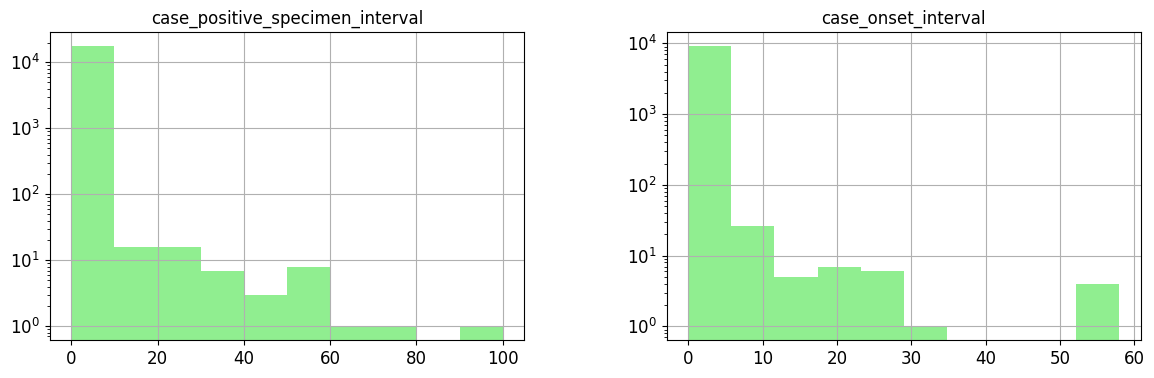

In [94]:
df2[continuous_features].hist(layout=(6, 4), figsize=(30,30), bins=10, color = 'lightgreen',log=True)

case_positive_specimen_interval       AxesSubplot(0.125,0.77;0.168478x0.11)
case_onset_interval                AxesSubplot(0.327174,0.77;0.168478x0.11)
dtype: object

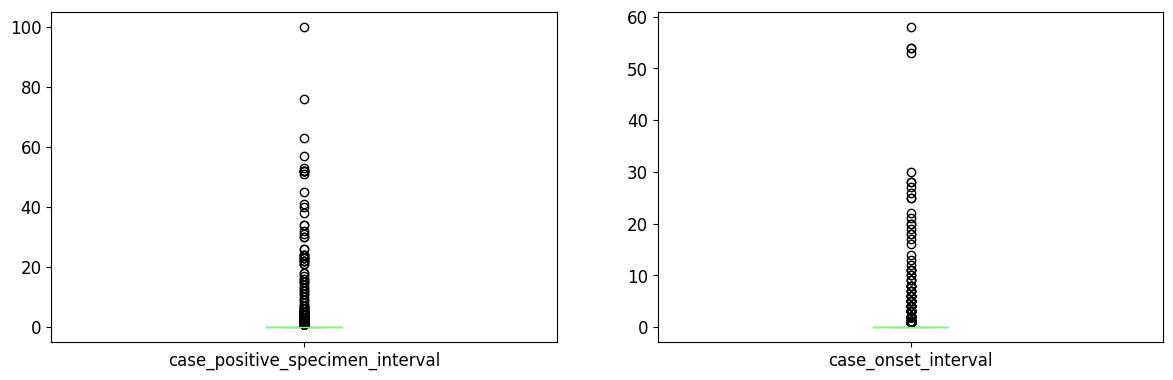

In [95]:
df2[continuous_features].plot(kind='box', subplots=True, figsize=(30,30), layout=(6,4), sharex=False, sharey=False,color = 'lightgreen')

Overall there are too many outliers to consider here. I could not deduce weather the outliers are wrong or not. Thus to be on the safe side I decided to keep them. The machine learning algorithms still need to deal with outliers in the real world as training data that is *too perfect and ideal* is just another form of bias.

### Summary of data quality plan:


| Variable Names                     | Data Quality Issue            | Handling Strategy              |
|------------------------------------|-------------------------------|--------------------------------|
| case_positive_specimen_interval | Outliers               | Do Nothing                |
| case_positive_specimen_interval  | Negative Value (56 rows)    | Take its absolute value           |
| case_positive_specimen_interval  | When 'current_status' = 'Laboratory-confirmed case','case_positive_specimen_interval' = 'NaN'(7697 rows)    | Replace missing values with median value 0          |
| case_onset_interval         | Outliers           | Do Nothing              |
| case_onset_interval      | Negative Value (285 rows)              | Take its absolute value  |
| case_onset_interval| When 'symptom_status' = 'Symptomatic',  'case_onset_interval' = 'NaN'(665 rows) | Replace missing values with median value 0  |
| res_county      | 'NaN' Value                     | Replace with 'Unknown'            |
| county_fips_code    | 'NaN' Value     | Replace with 'Unknown'       |
| age_group       | 'NaN' Value and 'Missing' Value       | Replace with 'Unknown'    |
| sex        | 'NaN' Value and 'Missing' Value     | Replace with 'Unknown'        |
| race | 'NaN' Value and 'Missing' Value   | Replace with 'Unknown'      |
| ethnicity   | 'NaN' Value and 'Missing' Value |Replace with 'Unknown'      |
| process     | The missing rate is too high  | Drop this column          |
| exposure_yn          |The missing rate is too high        | Drop this column|
| symptom_status      | 'Missing' Value                | Replace with 'Unknown'    |
| symptom_status| When 'death_yn' = 'Yes', 'symptom_status' = 'NaN' or 'Missing' or 'Unknown'| Replace with 'Symptomatic'|
| hosp_yn       | 'Missing' Value     | Replace with 'Unknown'      |
| icu_yn      | 'Missing' Value          | Replace with 'Unknown'     |
| icu_yn   | When 'death_yn' = 'No' and 'hosp_yn'= 'No', 'icu_yn' = 'NaN' | Replace missing values with 'No' |
| underlying_conditions_yn | The missing rate is too high  |  Drop this column  |
| Failing Rows | Duplicates(1052rows)  |  Drop duplicated rows  |

### - Save the new CSV file with a self explanatory name. Save the data quality plan to a single PDF file (as a table or a structured text).

Data quality plan saved as a picture and available in Data_Quality_Plan.pdf.

In [96]:
df2.isnull().sum()

case_month                            0
res_state                             0
state_fips_code                       0
res_county                            0
county_fips_code                      0
age_group                             0
sex                                   0
race                                  0
ethnicity                             0
case_positive_specimen_interval    1293
case_onset_interval                9745
current_status                        0
symptom_status                        0
hosp_yn                               0
icu_yn                                0
death_yn                              0
dtype: int64

In [97]:
categorical_columns = df[['case_month','res_state','state_fips_code','res_county','county_fips_code','age_group','sex','race','ethnicity','current_status','symptom_status','hosp_yn','icu_yn','death_yn']].columns 

df2[categorical_columns].describe().T

count unique                        top    freq
case_month          18890     35                    2022-01    2282
res_state           18890     48                         NY    2002
state_fips_code   18890.0   48.0                       36.0  2002.0
res_county          18890    852                    Unknown    1148
county_fips_code    18890   1196                    Unknown    1148
age_group           18890      5             18 to 49 years    7230
sex                 18890      3                     Female    9495
race                18890      7                      White   11634
ethnicity           18890      3        Non-Hispanic/Latino   11373
current_status      18890      2  Laboratory-confirmed case   15984
symptom_status      18890      2                Symptomatic   18641
hosp_yn             18890      3                         No    9505
icu_yn              18890      3                    Unknown    9829
death_yn            18890      2                         No   14372

In [98]:
df2[continuous_features].describe().T

count      mean       std  min  25%  50%  \
case_positive_specimen_interval  17597.0  0.172586  1.978528  0.0  0.0  0.0   
case_onset_interval               9145.0  0.143794  1.607340  0.0  0.0  0.0   

                                 75%    max  
case_positive_specimen_interval  0.0  100.0  
case_onset_interval              0.0   58.0

In [99]:
# Write the cleaned dataframe to a csv file
df2.to_csv('covid19-cdc-22200374-updated&cleaned-data02.csv', index=False)

##  Exploring relationships between feature pairs:

- Choose a subset of features you find promising and plot pairwise feature interactions (e.g., 
continuous-continuous feature plot or continuous-categorical plots or correlation plots). 
Explain your choices.
- Discuss your findings from the plots above. Do you find any features or feature combinations that are 
indicative of the target outcome? Explain in plain words (a short paragraph) the story of your
findings so far.

(array([0.5, 1.5]),
 [Text(0.5, 0, 'case_positive_specimen_interval'),
  Text(1.5, 0, 'case_onset_interval')])

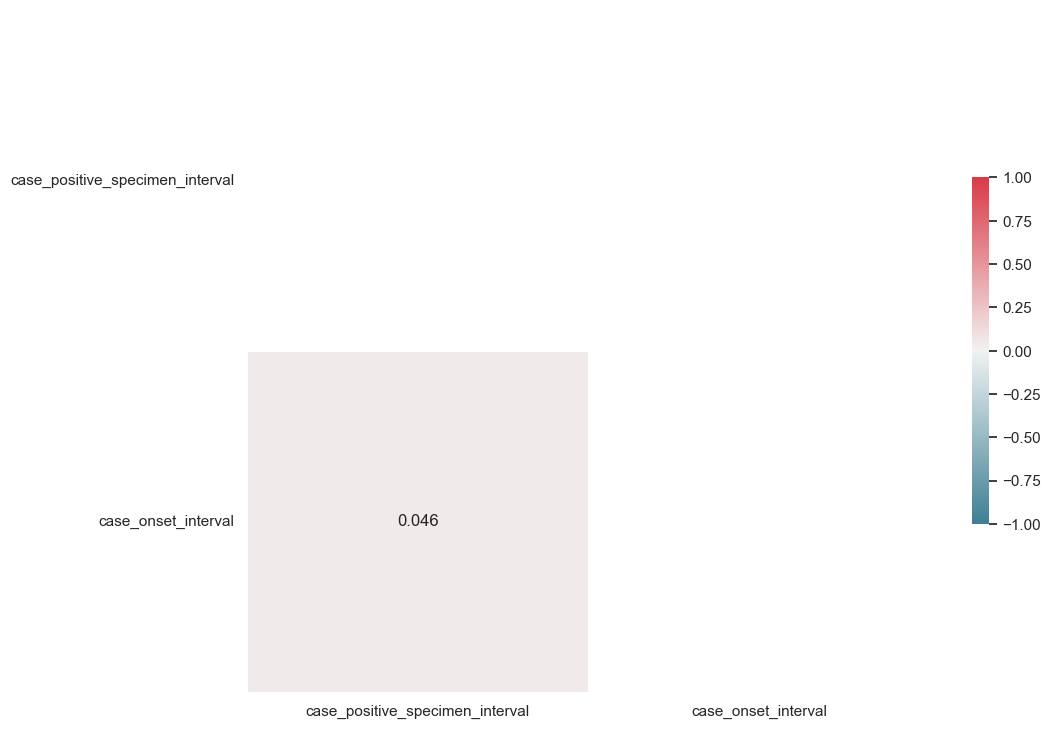

In [100]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")
continuous_columns1 = ['case_positive_specimen_interval','case_onset_interval']
# Calculate correlation of all pairs of continuous features
corr = df2[continuous_columns1].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 0)

<AxesSubplot: xlabel='case_positive_specimen_interval', ylabel='case_onset_interval'>

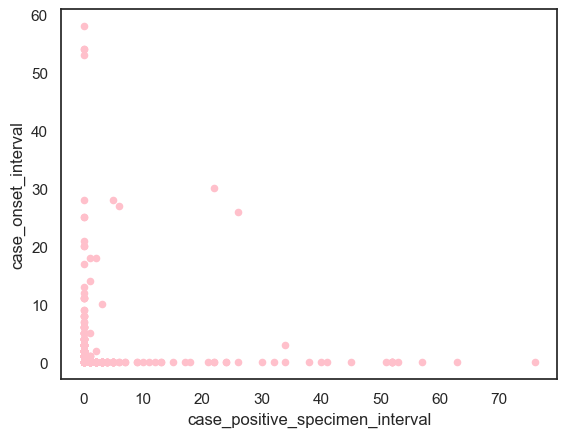

In [101]:
df2.plot(kind='scatter', x='case_positive_specimen_interval', y='case_onset_interval',color='pink')

### Disscuss one

- There seems no clear connection between these 2 continuous features,'case_positive_specimen_interval' and 'case_onset_interval'.
- Correlation between 2 continuous features is 0.046, which is around 0, indicating clearly no correlation.
- 2 continuous features are independent to each other.
- The scatter plot diagram also confirms this conjecture, and they do not form a linear relationship.

### Categorical vs Categorical feature plots

### Death vs Age

age_group
Index 		 Count
50 to 64 years 	 3081
65+ years 	 5852
18 to 49 years 	 7230
Unknown 	 170
0 - 17 years 	 2557


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0 - 17 years'),
  Text(1, 0, '18 to 49 years'),
  Text(2, 0, '50 to 64 years'),
  Text(3, 0, '65+ years'),
  Text(4, 0, 'Unknown')])

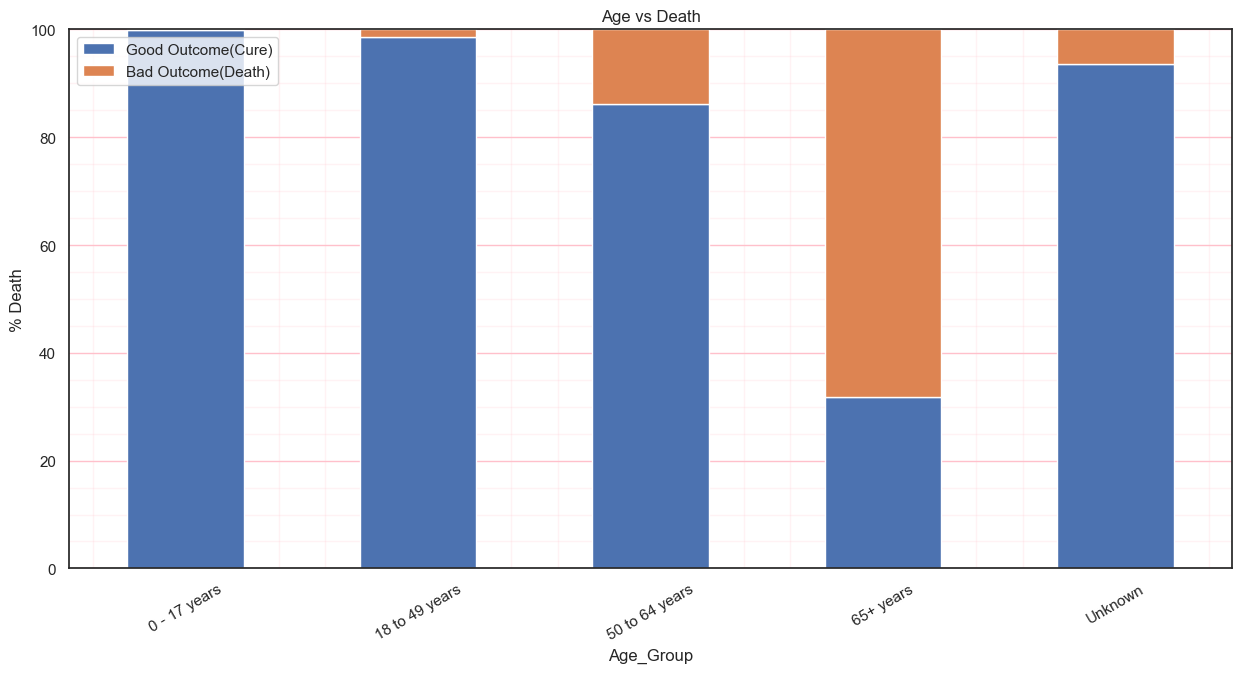

In [102]:
#Using code from the module lab
agegroup = pd.unique(df2["age_group"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("age_group")
print("Index \t\t Count")

# for each delinquency category
for i in agegroup:
    
    count = df2[df2["age_group"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['age_group'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','age_group','death_yn']].groupby(['age_group','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Age vs Death", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Good Outcome(Cure)", "Bad Outcome(Death)"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Age_Group")
my_plot.set_ylabel("% Death")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### Disscuss Two

- The mortality rate of COVID-19 is very high among people over 65 years old.
- The mortality rate of COVID-19 is proportional to the increase of age.

In [103]:
### Death vs Res_State

res_state
Index 		 Count
TX 	 1018
CA 	 621
IL 	 215
IN 	 1053
TN 	 218
MI 	 532
OH 	 1085
MA 	 224
FL 	 1479
WI 	 278
MO 	 83
NV 	 274
AZ 	 489
NJ 	 1708
NY 	 2002
MN 	 884
PA 	 383
WA 	 49
CT 	 65
AR 	 158
PR 	 59
ME 	 196
VA 	 410
SC 	 357
OK 	 237
NC 	 1605
MD 	 595
AL 	 109
ID 	 178
KY 	 667
NM 	 32
DC 	 62
LA 	 34
NH 	 52
CO 	 145
UT 	 230
IA 	 58
ND 	 11
KS 	 517
WY 	 20
MT 	 92
OR 	 239
MS 	 18
AK 	 2
RI 	 111
GA 	 10
VT 	 25
VI 	 1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'AK'),
  Text(1, 0, 'AL'),
  Text(2, 0, 'AR'),
  Text(3, 0, 'AZ'),
  Text(4, 0, 'CA'),
  Text(5, 0, 'CO'),
  Text(6, 0, 'CT'),
  Text(7, 0, 'DC'),
  Text(8, 0, 'FL'),
  Text(9, 0, 'GA'),
  Text(10, 0, 'IA'),
  Text(11, 0, 'ID'),
  Text(12, 0, 'IL'),
  Text(13, 0, 'IN'),
  Text(14, 0, 'KS'),
  Text(15, 0, 'KY'),
  Text(16, 0, 'LA'),
  Text(17, 0, 'MA'),
  Text(18, 0, 'MD'),
  Text(19, 0, 'ME'),
  Text(20, 0, 'MI'),
  Text(21, 0, 'MN'),
  Text(22, 0, 'MO'),
  Text(23, 0, 'MS'),
  Text(24, 0, 'MT'),
  Text(25, 0, 'NC'),
  Text(26, 0, 'ND'),
  Text(27, 0, 'NH'),
  Text(28, 0, 'NJ'),
  Text(29, 0, 'NM'),
  Text(30, 0, 'NV'),
  Text(31, 0, 'NY'),
  Text(32, 0, 'OH'),
  Text(33, 0, 'OK'),
  Text(34, 0, 'OR'),
  Text(35, 0, 'PA'),
  Text(36, 0, 'PR'),
  Text(37, 0, '

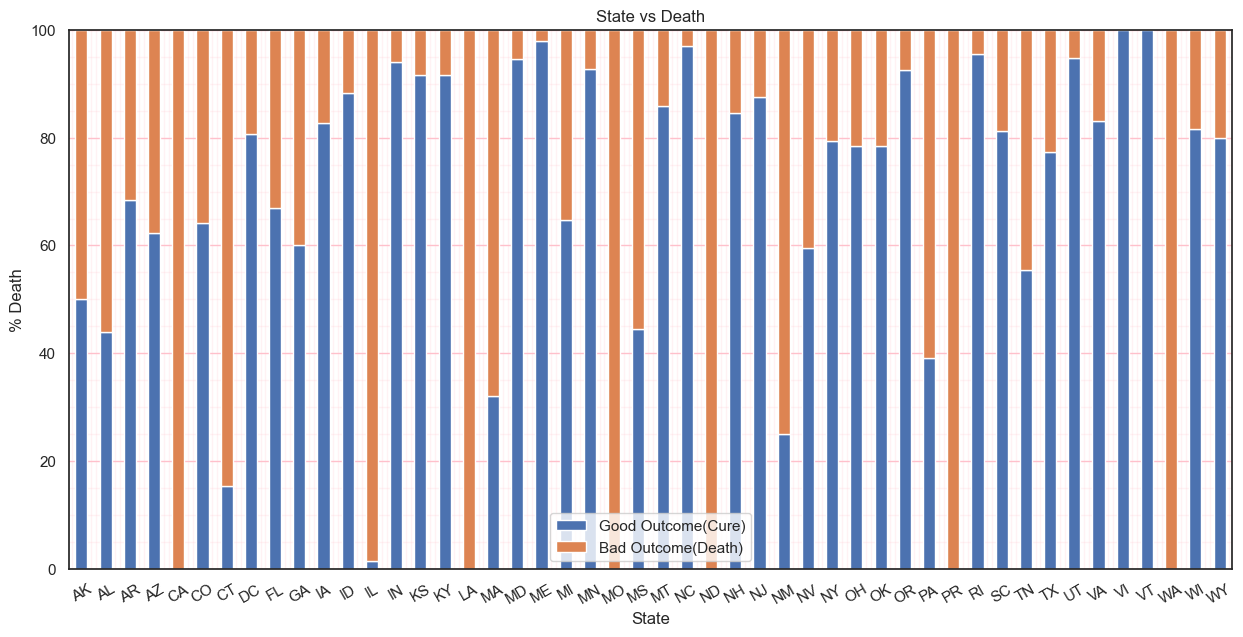

In [104]:
#Using code from the module lab
res_stategroup = pd.unique(df2["res_state"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("res_state")
print("Index \t\t Count")

# for each delinquency category
for i in res_stategroup:
    
    count = df2[df2["res_state"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['res_state'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','res_state','death_yn']].groupby(['res_state','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="State vs Death", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Good Outcome(Cure)", "Bad Outcome(Death)"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("State")
my_plot.set_ylabel("% Death")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### Disscuss Three

- The mortality rate in most states is below 50%, and some states reach 100% due to the scarcity of samples.

### Death vs Sex

sex
Index 		 Count
Female 	 9495
Male 	 8881
Unknown 	 514


(array([0, 1, 2]),
 [Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'Unknown')])

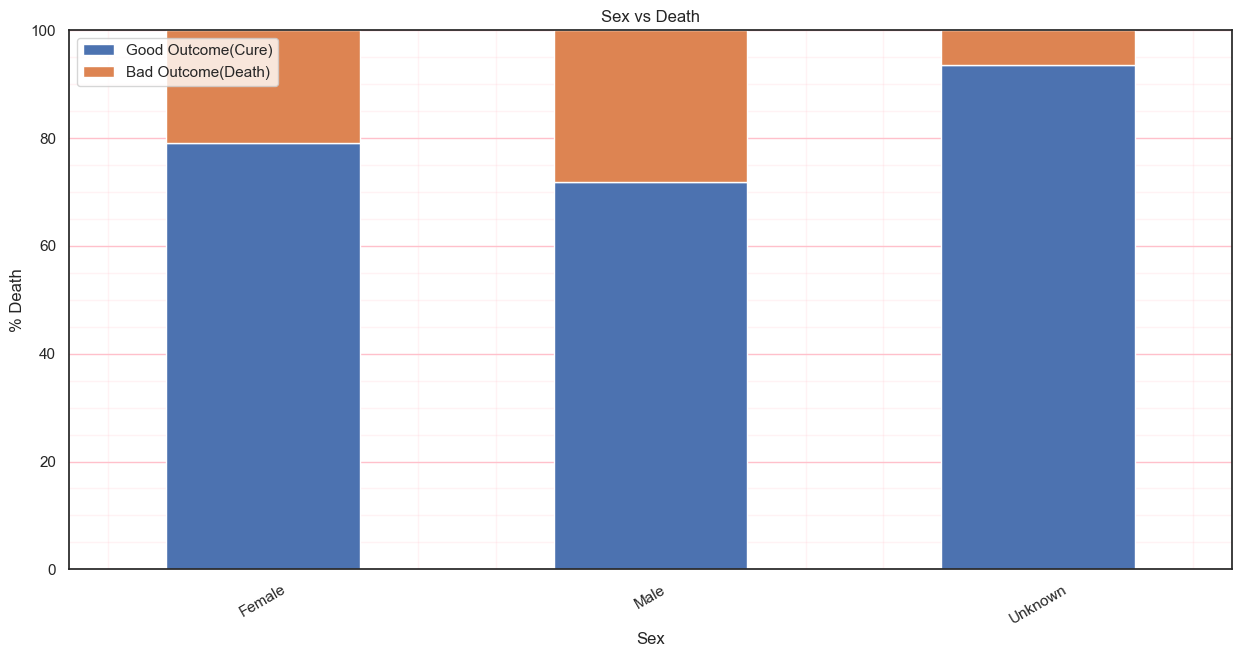

In [105]:
#Using code from the module lab
sexgroup = pd.unique(df2["sex"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("sex")
print("Index \t\t Count")

# for each delinquency category
for i in sexgroup:
    
    count = df2[df2["sex"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['sex'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','sex','death_yn']].groupby(['sex','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Sex vs Death", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Good Outcome(Cure)", "Bad Outcome(Death)"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Sex")
my_plot.set_ylabel("% Death")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### Disscuss Four

- The mortality rate of men after COVID-19 infection is slightly higher than that of women.
- The mortality rate is approximately 20% for women and 10% for men.

### Death vs Race

race
Index 		 Count
White 	 11634
Unknown 	 4556
Asian 	 428
Black 	 2037
Multiple/Other 	 159
American Indian/Alaska Native 	 69
Native Hawaiian/Other Pacific Islander 	 7


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'American Indian/Alaska Native'),
  Text(1, 0, 'Asian'),
  Text(2, 0, 'Black'),
  Text(3, 0, 'Multiple/Other'),
  Text(4, 0, 'Native Hawaiian/Other Pacific Islander'),
  Text(5, 0, 'Unknown'),
  Text(6, 0, 'White')])

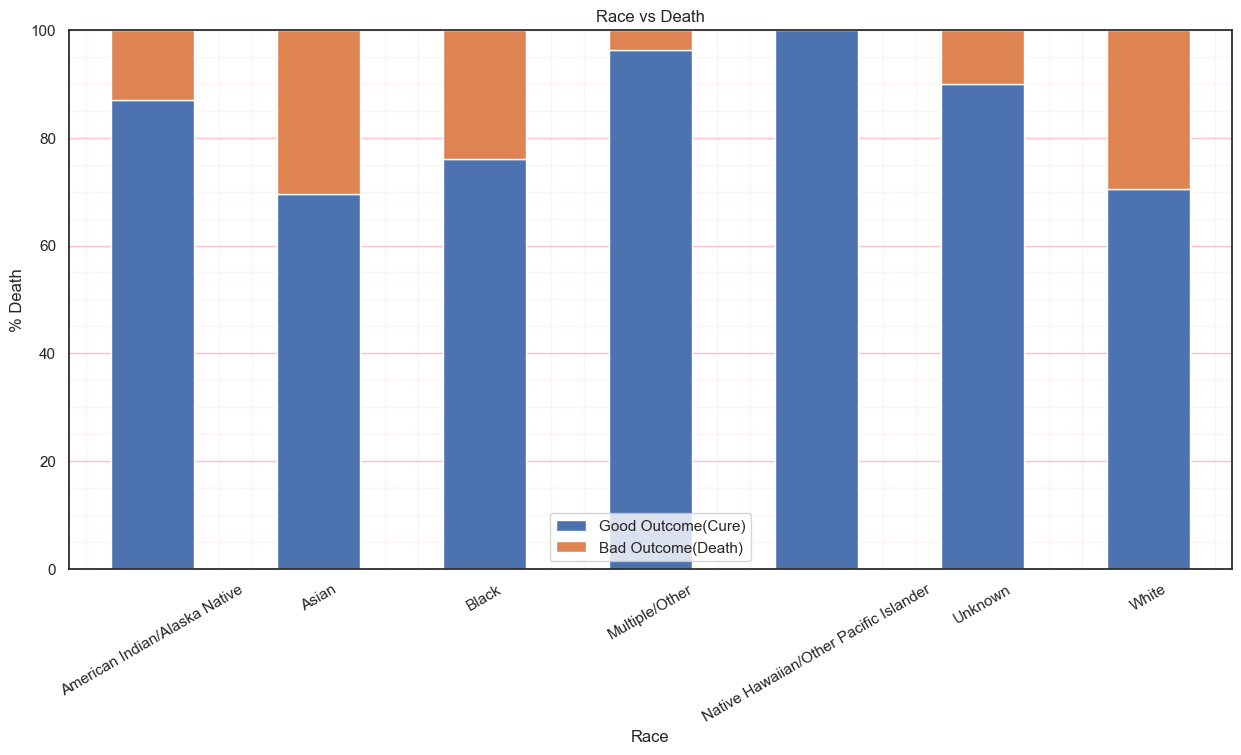

In [106]:
#Using code from the module lab
racegroup = pd.unique(df2["race"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("race")
print("Index \t\t Count")

# for each delinquency category
for i in racegroup:
    
    count = df2[df2["race"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['race'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','race','death_yn']].groupby(['race','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Race vs Death", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Good Outcome(Cure)", "Bad Outcome(Death)"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Race")
my_plot.set_ylabel("% Death")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### Disscuss Five

- It can be seen that the highest mortality rate of COVID-19 Asian is close to 30%, while the mortality rate of Native Hawaiian/Other Pacific Islander is the smallest, close to zero
- White and Asian Americans have similar mortality rates
- The mortality rate for all race groups is within 40%.

### Death vs Ethnicity

ethnicity
Index 		 Count
Hispanic/Latino 	 1584
Non-Hispanic/Latino 	 11373
Unknown 	 5933


(array([0, 1, 2]),
 [Text(0, 0, 'Hispanic/Latino'),
  Text(1, 0, 'Non-Hispanic/Latino'),
  Text(2, 0, 'Unknown')])

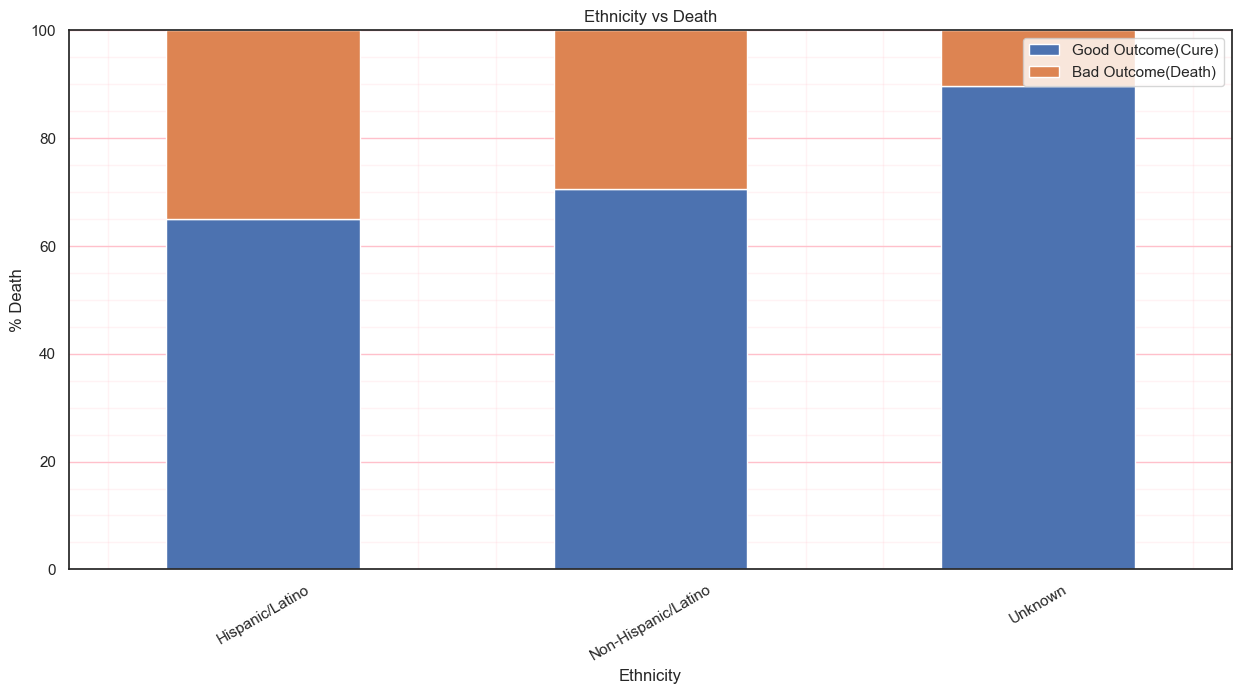

In [107]:
#Using code from the module lab
ethnicitygroup = pd.unique(df2["ethnicity"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("ethnicity")
print("Index \t\t Count")

# for each delinquency category
for i in ethnicitygroup:
    
    count = df2[df2["ethnicity"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['ethnicity'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','ethnicity','death_yn']].groupby(['ethnicity','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Ethnicity vs Death", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Good Outcome(Cure)", "Bad Outcome(Death)"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Ethnicity")
my_plot.set_ylabel("% Death")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### Disscuss Six

- The mortality difference between Hispanic/Latino and Non Hispanic/Latino due to COVID-19 is small, and both mortality is within 40%.


### Death vs Hosp_yn

hosp_yn
Index 		 Count
Yes 	 3094
Unknown 	 6291
No 	 9505


(array([0, 1, 2]),
 [Text(0, 0, 'No'), Text(1, 0, 'Unknown'), Text(2, 0, 'Yes')])

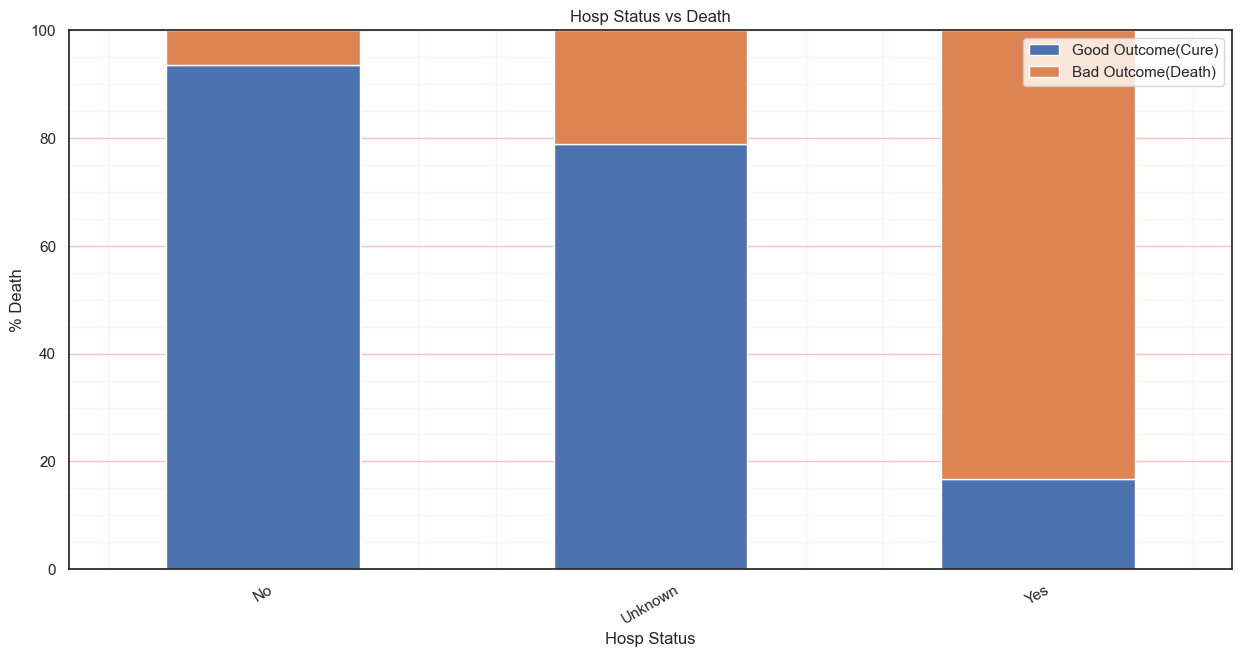

In [108]:
#Using code from the module lab
hospgroup = pd.unique(df2["hosp_yn"].ravel())
# add new column and set values to zero
    
df2['percent'] = 0

#print header
print("hosp_yn")
print("Index \t\t Count")

# for each delinquency category
for i in hospgroup:
    
    count = df2[df2["hosp_yn"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['hosp_yn'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','hosp_yn','death_yn']].groupby(['hosp_yn','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Hosp Status vs Death", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Good Outcome(Cure)", "Bad Outcome(Death)"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Hosp Status")
my_plot.set_ylabel("% Death")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### Disscuss Seven

- It can be seen that the mortality rate of patients who need hospitalization cure is significantly higher, reaching 85%.
- The death rate of patients who do not need hospitalization due to COVID-19 is only about 6%.

### Death vs Icu_yn

icu_yn
Index 		 Count
Unknown 	 9829
Yes 	 466
No 	 8595


(array([0, 1, 2]),
 [Text(0, 0, 'No'), Text(1, 0, 'Unknown'), Text(2, 0, 'Yes')])

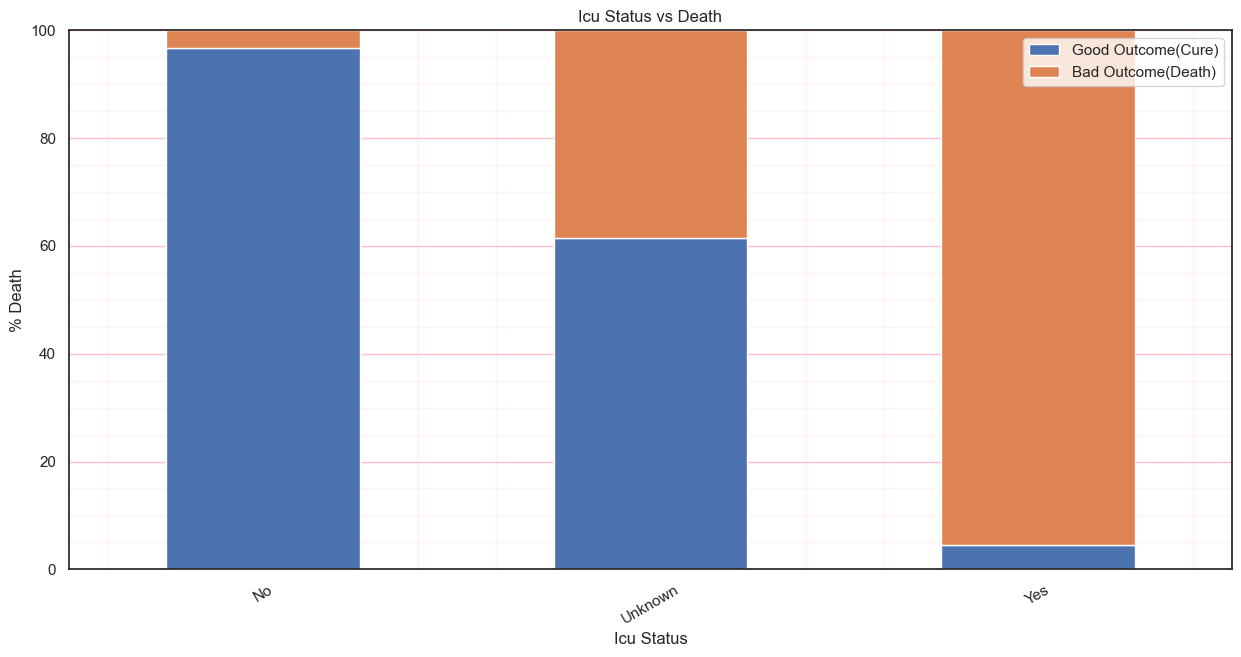

In [109]:
#Using code from the module lab
icu_yngroup = pd.unique(df2["icu_yn"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("icu_yn")
print("Index \t\t Count")

# for each delinquency category
for i in icu_yngroup:
    
    count = df2[df2["icu_yn"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['icu_yn'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','icu_yn','death_yn']].groupby(['icu_yn','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Icu Status vs Death", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Good Outcome(Cure)", "Bad Outcome(Death)"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Icu Status")
my_plot.set_ylabel("% Death")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### Disscuss Eight

- It can be seen that the mortality rate of patients who need ICU cure is significantly higher, reaching 95%, which is 10% higher than patients requiring hospitalization.
- The death rate of patients who do not need ICU due to COVID-19 is only about 5%.

### Symptom_status vs Age

age_group
Index 		 Count
50 to 64 years 	 3081
65+ years 	 5852
18 to 49 years 	 7230
Unknown 	 170
0 - 17 years 	 2557


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0 - 17 years'),
  Text(1, 0, '18 to 49 years'),
  Text(2, 0, '50 to 64 years'),
  Text(3, 0, '65+ years'),
  Text(4, 0, 'Unknown')])

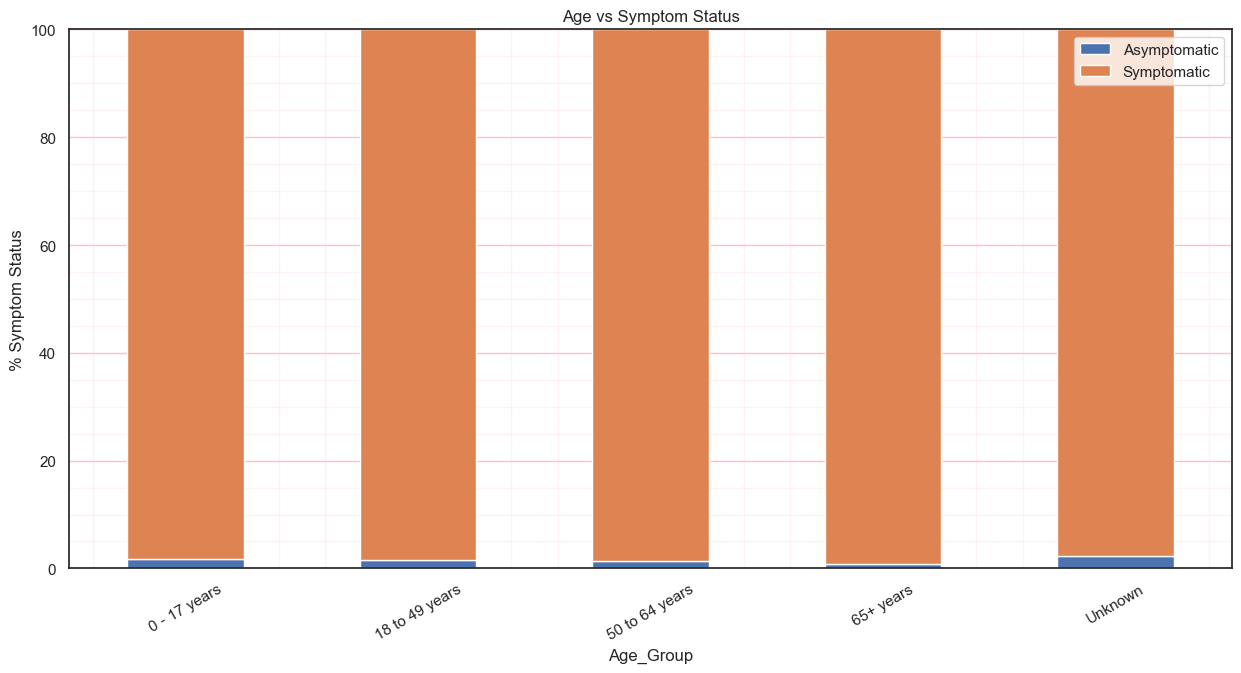

In [110]:
#Using code from the module lab
agegroup = pd.unique(df2["age_group"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("age_group")
print("Index \t\t Count")

# for each delinquency category
for i in agegroup:
    
    count = df2[df2["age_group"] == i].count()['symptom_status']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['age_group'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','age_group','symptom_status']].groupby(['age_group','symptom_status']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Age vs Symptom Status", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Asymptomatic", "Symptomatic"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Age_Group")
my_plot.set_ylabel("% Symptom Status")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### Disscuss Nine

- Symptomatic patients still account for an absolute majority in different age groups.


### Hosp_yn vs Age

age_group
Index 		 Count
50 to 64 years 	 3081
65+ years 	 5852
18 to 49 years 	 7230
Unknown 	 170
0 - 17 years 	 2557


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0 - 17 years'),
  Text(1, 0, '18 to 49 years'),
  Text(2, 0, '50 to 64 years'),
  Text(3, 0, '65+ years'),
  Text(4, 0, 'Unknown')])

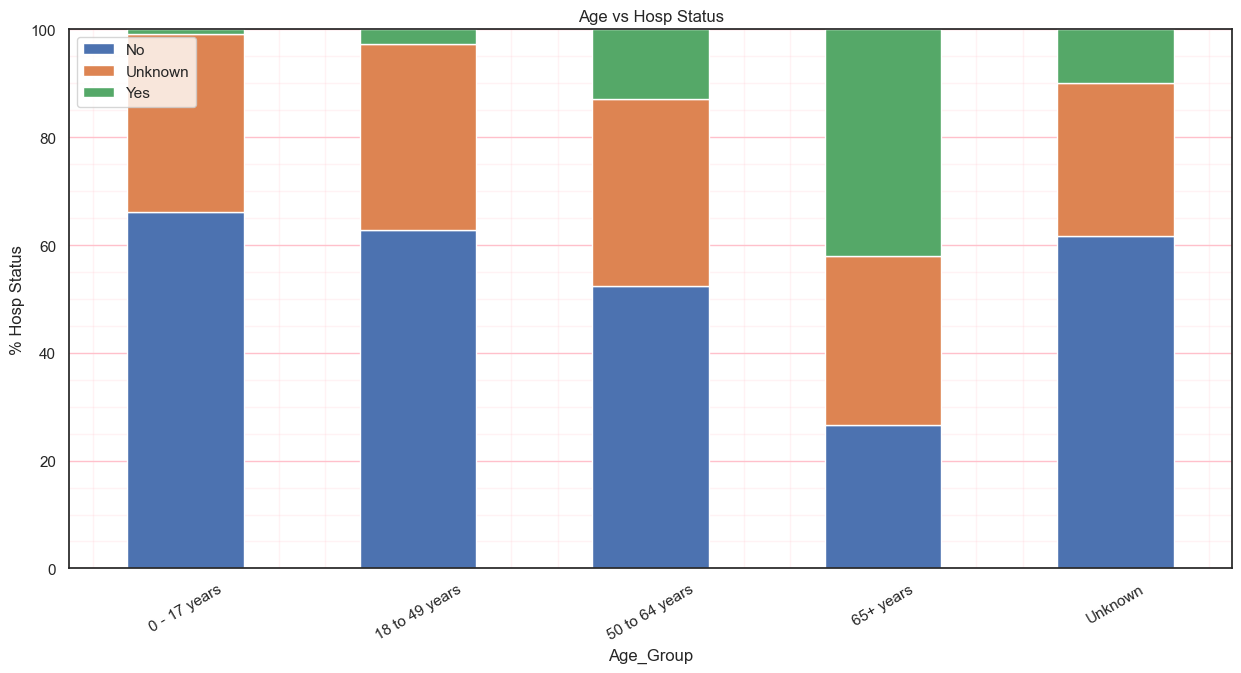

In [111]:
#Using code from the module lab
agegroup = pd.unique(df2["age_group"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("age_group")
print("Index \t\t Count")

# for each delinquency category
for i in agegroup:
    
    count = df2[df2["age_group"] == i].count()['hosp_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['age_group'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','age_group','hosp_yn']].groupby(['age_group','hosp_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Age vs Hosp Status", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["No", "Unknown","Yes"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Age_Group")
my_plot.set_ylabel("% Hosp Status")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### Disscuss Ten

- The proportion of people over the age of 65 receiving hospital treatment has increased significantly,which is nearly 45%.
- The proportion of people aged 0-17 who need hospital treatment for COVID-19 is the lowest, less than 3%.
- For COVID-19, with the increase of age, people need more hospital treatment.

### Icu_yn vs Age

age_group
Index 		 Count
50 to 64 years 	 3081
65+ years 	 5852
18 to 49 years 	 7230
Unknown 	 170
0 - 17 years 	 2557


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0 - 17 years'),
  Text(1, 0, '18 to 49 years'),
  Text(2, 0, '50 to 64 years'),
  Text(3, 0, '65+ years'),
  Text(4, 0, 'Unknown')])

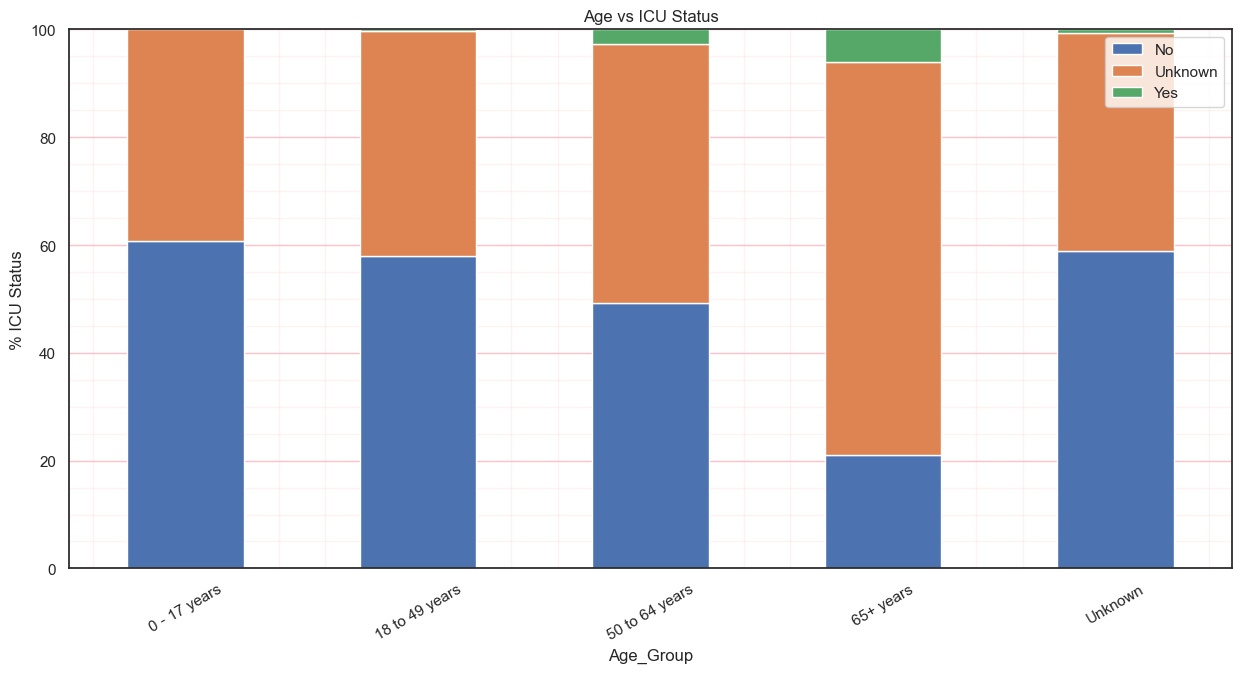

In [112]:
#Using code from the module lab
agegroup = pd.unique(df2["age_group"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("age_group")
print("Index \t\t Count")

# for each delinquency category
for i in agegroup:
    
    count = df2[df2["age_group"] == i].count()['icu_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['age_group'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','age_group','icu_yn']].groupby(['age_group','icu_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Age vs ICU Status", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["No", "Unknown","Yes"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Age_Group")
my_plot.set_ylabel("% ICU Status")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### Disscuss Eleven

- Patients of all ages rarely require ICU treatment, but relatively speaking, groups aged 65 and older have the highest rates of requiring ICU treatment.


### Hosp_yn vs Sex

sex
Index 		 Count
Female 	 9495
Male 	 8881
Unknown 	 514


(array([0, 1, 2]),
 [Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'Unknown')])

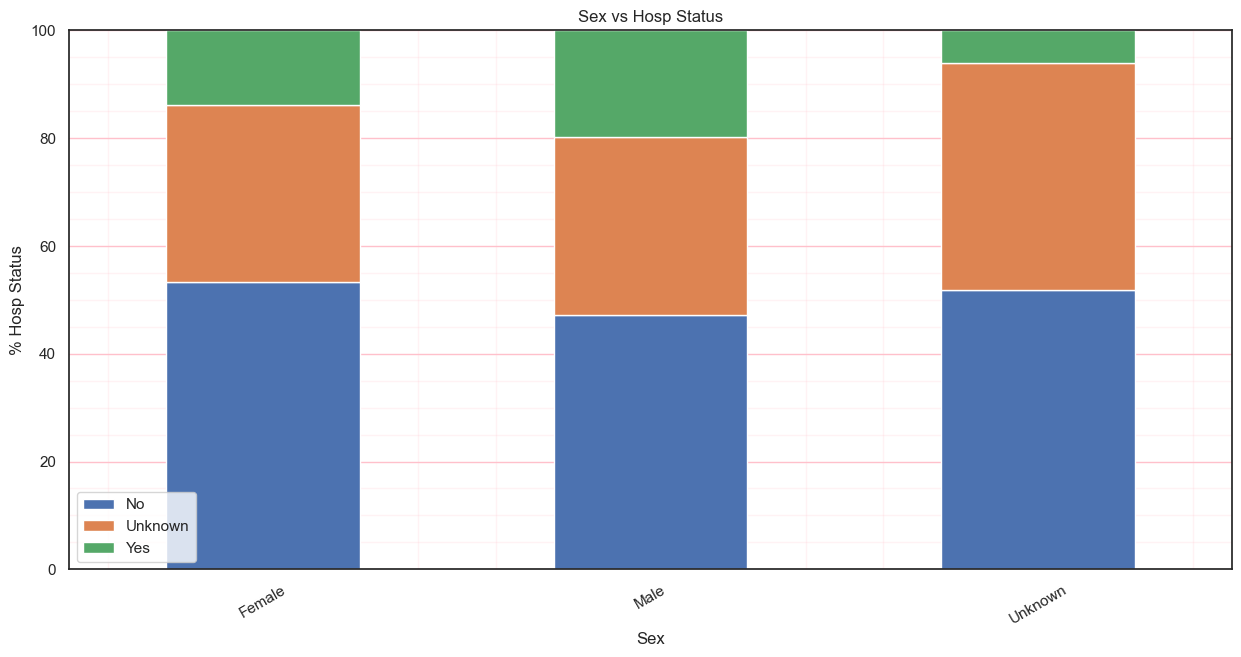

In [113]:
#Using code from the module lab
sexgroup = pd.unique(df2["sex"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("sex")
print("Index \t\t Count")

# for each delinquency category
for i in sexgroup:
    
    count = df2[df2["sex"] == i].count()['hosp_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['sex'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','sex','hosp_yn']].groupby(['sex','hosp_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Sex vs Hosp Status", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["No", "Unknown","Yes"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Sex")
my_plot.set_ylabel("% Hosp Status")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### Disscuss Twelve

- The proportion of male and female patients who need hospital treatment is similar, with slightly higher rates for males.

### Hosp_yn vs Race

race
Index 		 Count
White 	 11634
Unknown 	 4556
Asian 	 428
Black 	 2037
Multiple/Other 	 159
American Indian/Alaska Native 	 69
Native Hawaiian/Other Pacific Islander 	 7


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'American Indian/Alaska Native'),
  Text(1, 0, 'Asian'),
  Text(2, 0, 'Black'),
  Text(3, 0, 'Multiple/Other'),
  Text(4, 0, 'Native Hawaiian/Other Pacific Islander'),
  Text(5, 0, 'Unknown'),
  Text(6, 0, 'White')])

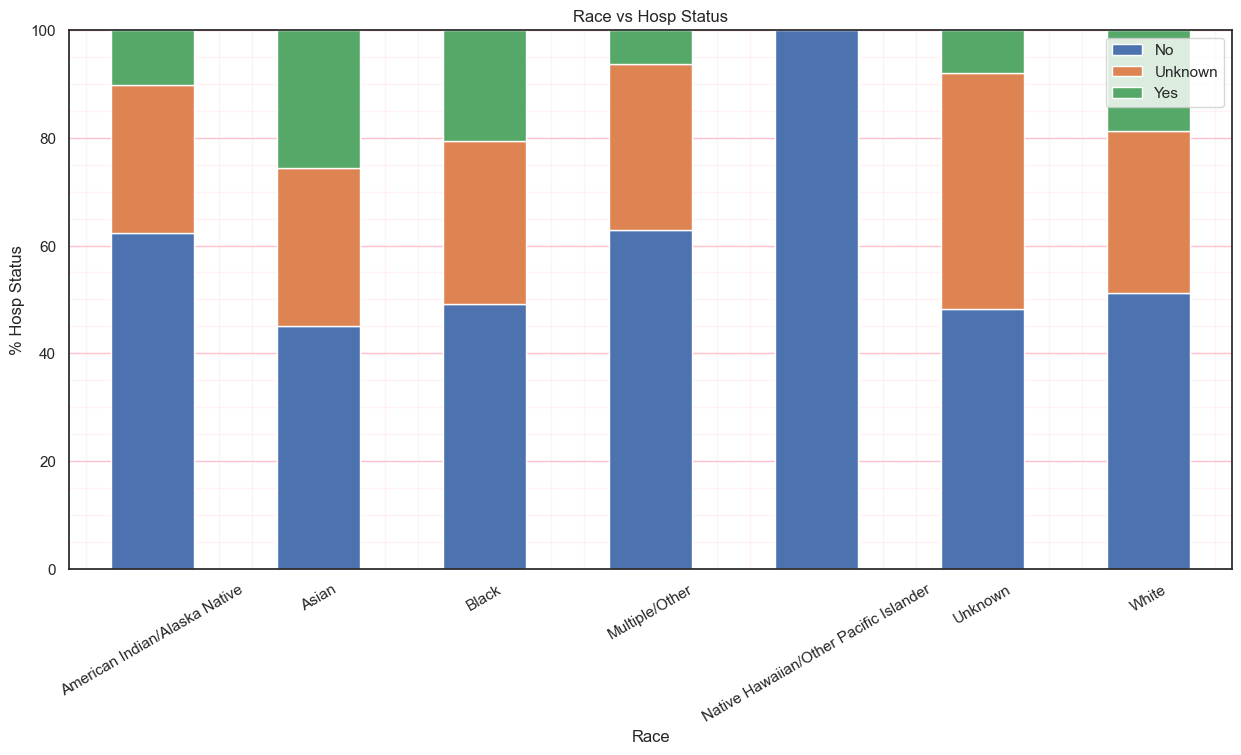

In [114]:
#Using code from the module lab
racegroup = pd.unique(df2["race"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("race")
print("Index \t\t Count")

# for each delinquency category
for i in racegroup:
    
    count = df2[df2["race"] == i].count()['hosp_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['race'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','race','hosp_yn']].groupby(['race','hosp_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Race vs Hosp Status", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["No", "Unknown","Yes"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Race")
my_plot.set_ylabel("% Hosp Status")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### Disscuss Thirteen

- For COVID-19, the proportion of Asian patients who need hospital treatment is the highest, followed by blacks, followed by whites, and Hawaiians and Pacific Islanders who need hospital treatment the least, with a proportion of 0.

### Continuous-categorical feature plots

#### 1. Plot Case_Positive_Specimen_Interval vs Race

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'American Indian/Alaska Native'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'Black'),
  Text(4, 0, 'Multiple/Other'),
  Text(5, 0, 'Native Hawaiian/Other Pacific Islander'),
  Text(6, 0, 'Unknown'),
  Text(7, 0, 'White')])

<Figure size 640x480 with 0 Axes>

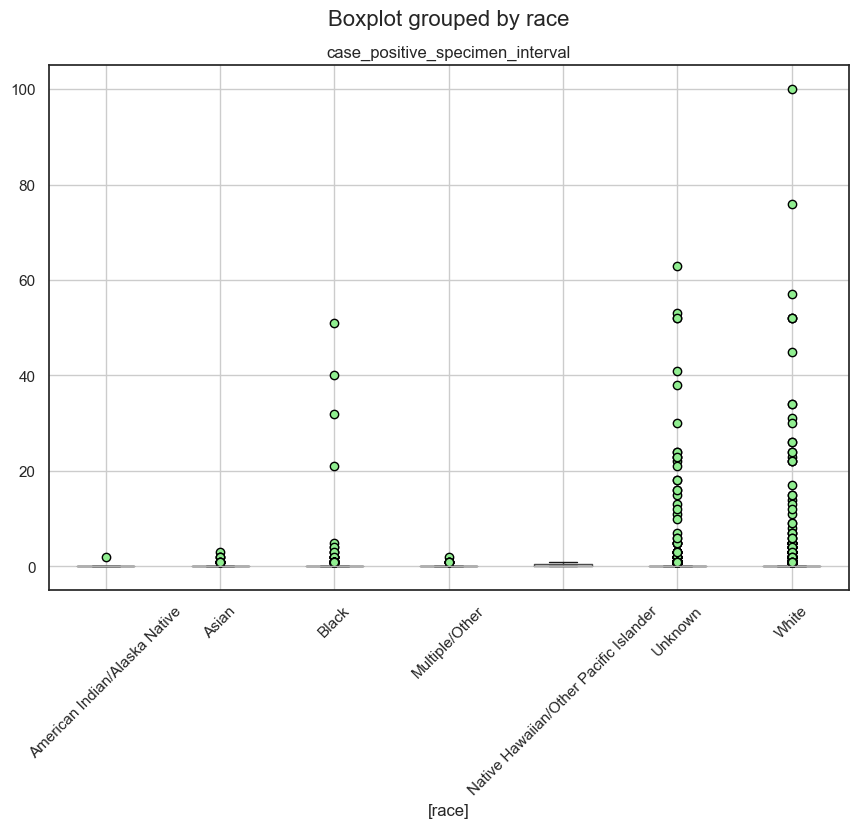

In [115]:
#['case_positive_specimen_interval','case_onset_interval']
plt.figure()
flierprops = dict(marker='o', markerfacecolor='lightgreen', markersize=6, linestyle='none')
df2.boxplot(column=['case_positive_specimen_interval'], by=['race'], flierprops=flierprops, figsize=(10,7))
plt.xticks(rotation = 45)

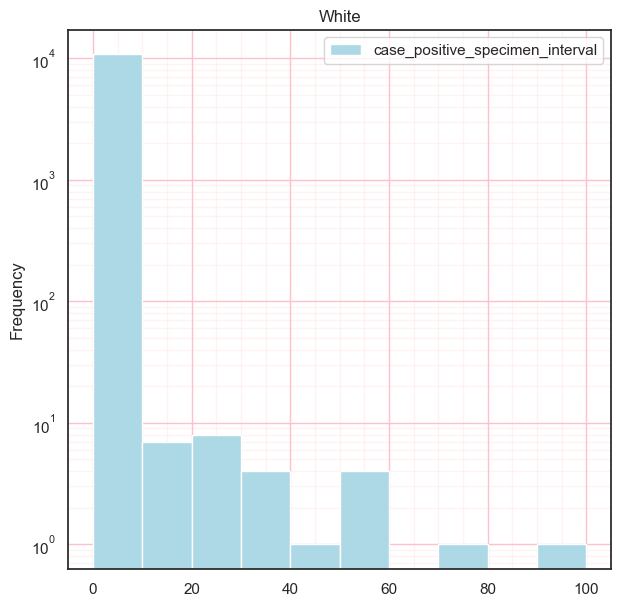

In [116]:
df2[df2['race'] == "White"][['case_positive_specimen_interval']].plot(kind='hist',figsize=(7,7), bins=10, title="White",log=True,color='lightblue')
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

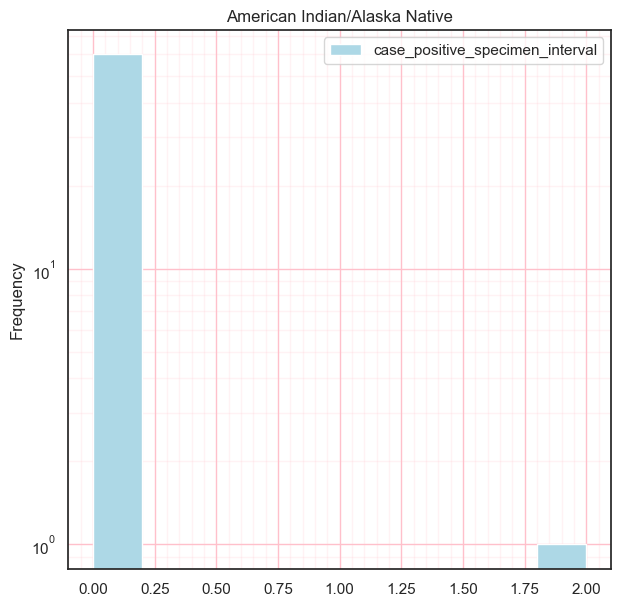

In [117]:
df2[df2['race'] == "American Indian/Alaska Native"][['case_positive_specimen_interval']].plot(kind='hist',figsize=(7,7), bins=10, title="American Indian/Alaska Native",log=True,color='lightblue')
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

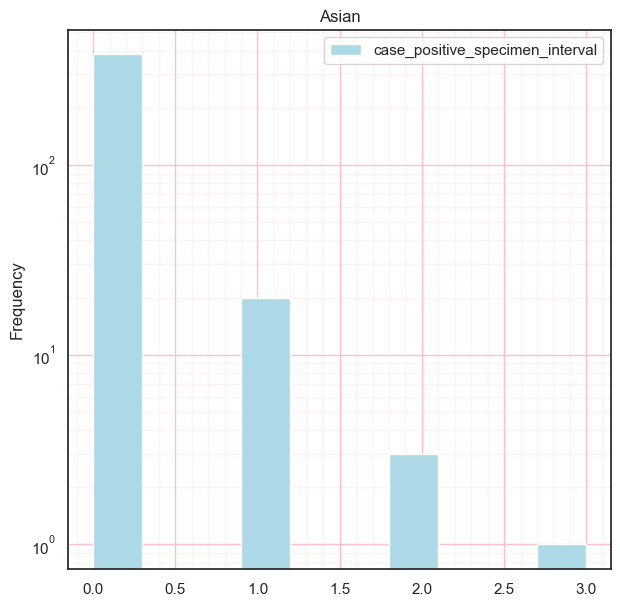

In [118]:
df2[df2['race'] == "Asian"][['case_positive_specimen_interval']].plot(kind='hist',figsize=(7,7), bins=10, title="Asian",log=True,color='lightblue')
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

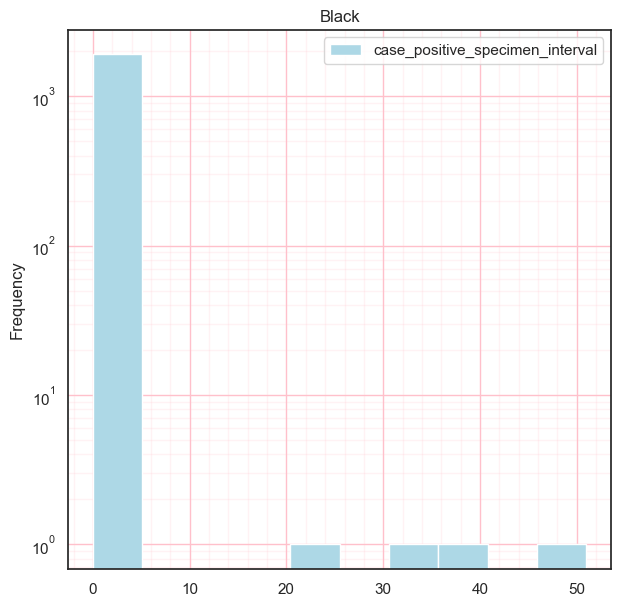

In [119]:
df2[df2['race'] == "Black"][['case_positive_specimen_interval']].plot(kind='hist',figsize=(7,7), bins=10, title="Black",log=True,color='lightblue')
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

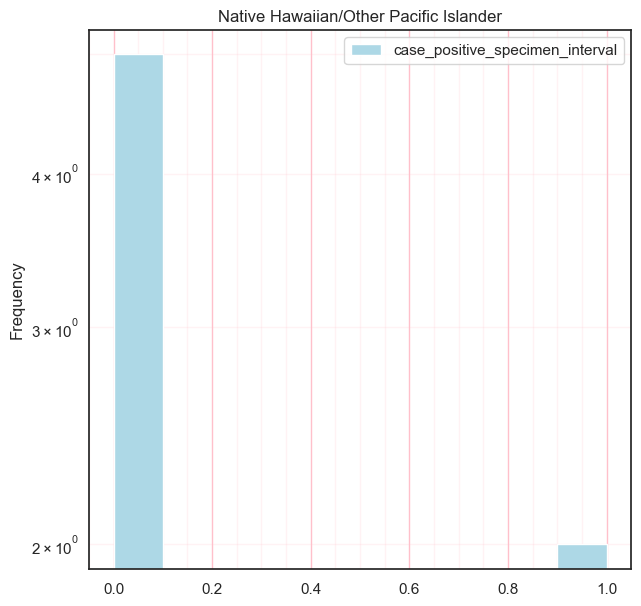

In [120]:
df2[df2['race'] == "Native Hawaiian/Other Pacific Islander"][['case_positive_specimen_interval']].plot(kind='hist',figsize=(7,7), bins=10, title="Native Hawaiian/Other Pacific Islander",log=True,color='lightblue')
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

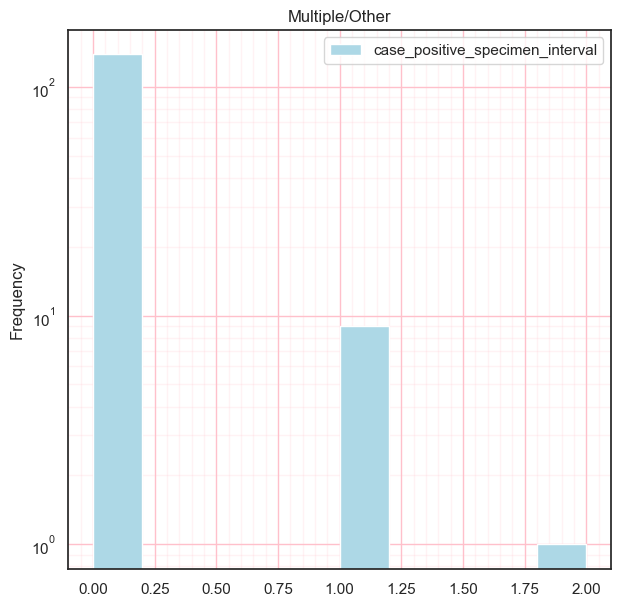

In [121]:
df2[df2['race'] == "Multiple/Other"][['case_positive_specimen_interval']].plot(kind='hist',figsize=(7,7), bins=10, title="Multiple/Other",log=True,color='lightblue')
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

### Disscuss Fourteen

- For COVID-19, 'case_positive_specimen_interval'values for differnet race mainly are concentrated at 0 or around 0. Other values also exist, but the value 0 occupies an absolute amount.
- The changes in the numerical distribution of 'case_positive_specimen_interval' value do not seem to have much to do with race.

#### 2. Plot Case_Positive_Specimen_Interval vs Sex

(array([1, 2, 3]),
 [Text(1, 0, 'Female'), Text(2, 0, 'Male'), Text(3, 0, 'Unknown')])

<Figure size 640x480 with 0 Axes>

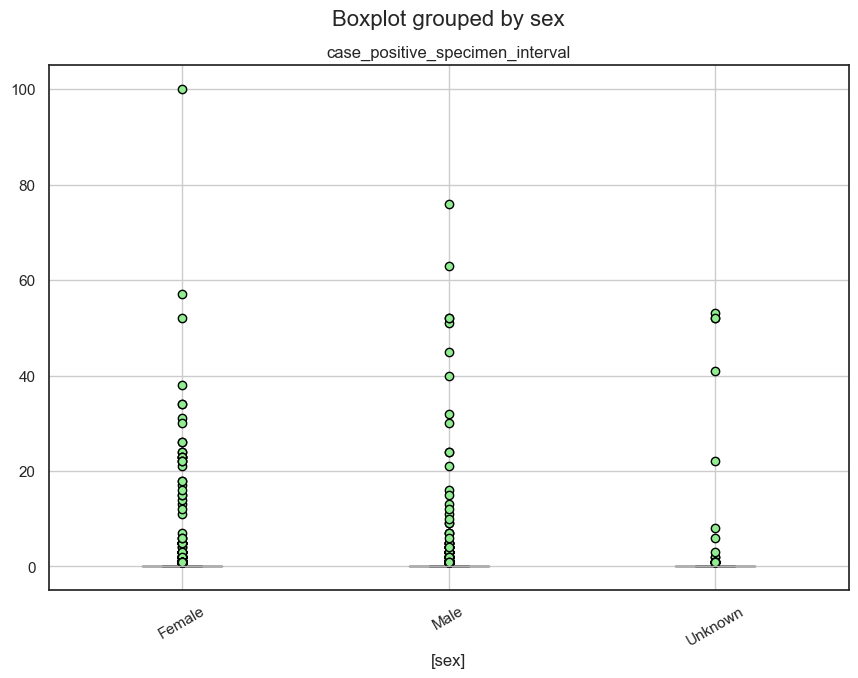

In [122]:
#['case_positive_specimen_interval','case_onset_interval']
plt.figure()
flierprops = dict(marker='o', markerfacecolor='lightgreen', markersize=6, linestyle='none')
df2.boxplot(column=['case_positive_specimen_interval'], by=['sex'], flierprops=flierprops, figsize=(10,7))
plt.xticks(rotation = 30)

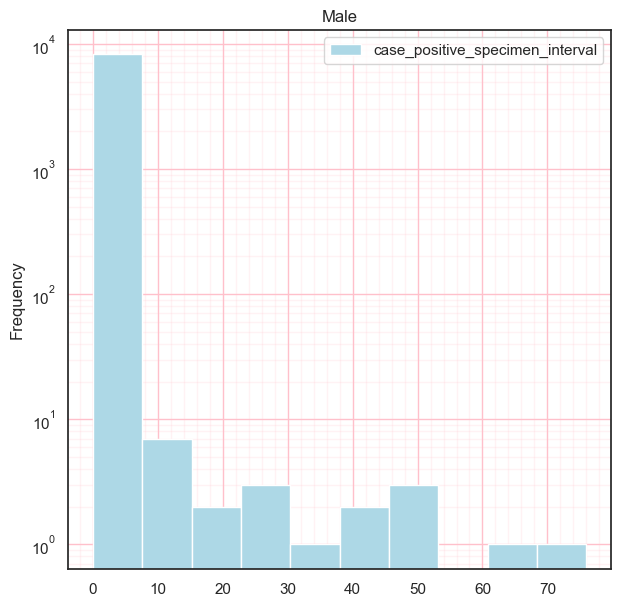

In [123]:
df2[df2['sex'] == "Male"][['case_positive_specimen_interval']].plot(kind='hist',figsize=(7,7), bins=10, title="Male",log=True,color='lightblue')
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

In [124]:
df2[df2['sex'] == "Female"][['case_positive_specimen_interval']].plot(kind='hist',figsize=(7,7), bins=10, title="Female",log=True,color='lightblue')
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

### Disscuss Fifteen


- For COVID-19, 'case_positive_specimen_interval'values for differnet gender mainly are concentrated at 0 or around 0. Other values also exist, but the value 0 occupies an absolute amount.
- The changes in the numerical distribution of 'case_positive_specimen_interval' value do not seem to have much to do with sex.

#### 3. Plot Case_Positive_Specimen_Interval vs Age

age_group
Index 		 Count
50 to 64 years 	 3081
65+ years 	 5852
18 to 49 years 	 7230
Unknown 	 170
0 - 17 years 	 2557

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, '0 - 17 years'),
  Text(2, 0, '18 to 49 years'),
  Text(3, 0, '50 to 64 years'),
  Text(4, 0, '65+ years'),
  Text(5, 0, 'Unknown')])

<Figure size 640x480 with 0 Axes>

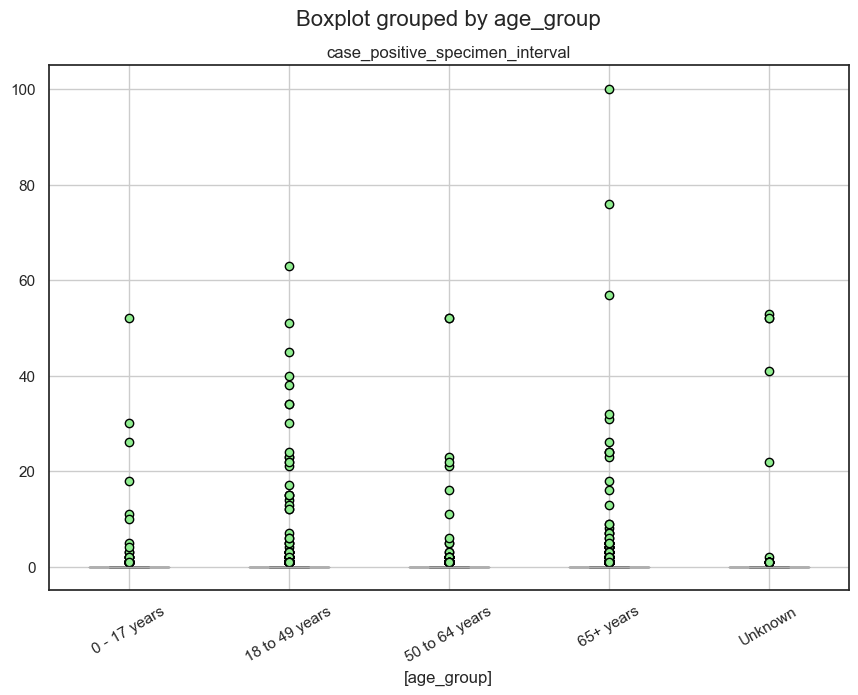

In [125]:
#['case_positive_specimen_interval','case_onset_interval']
plt.figure()
flierprops = dict(marker='o', markerfacecolor='lightgreen', markersize=6, linestyle='none')
df2.boxplot(column=['case_positive_specimen_interval'], by=['age_group'], flierprops=flierprops, figsize=(10,7))
plt.xticks(rotation = 30)

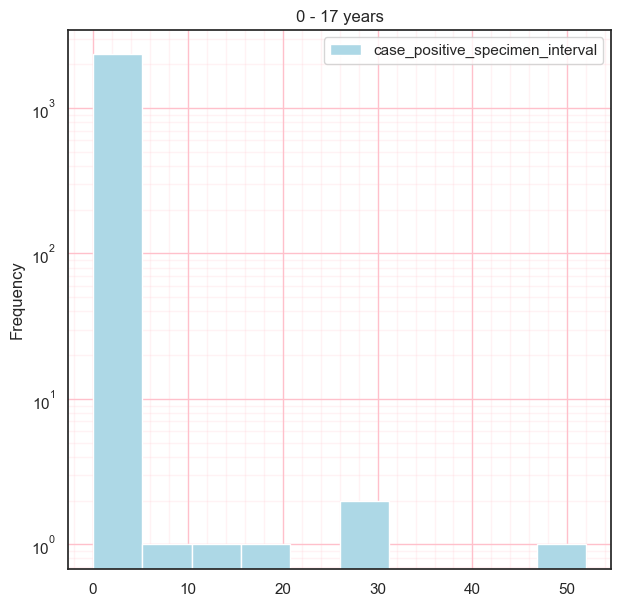

In [126]:
df2[df2['age_group'] == "0 - 17 years"][['case_positive_specimen_interval']].plot(kind='hist',figsize=(7,7), bins=10, title="0 - 17 years",log=True,color='lightblue')
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

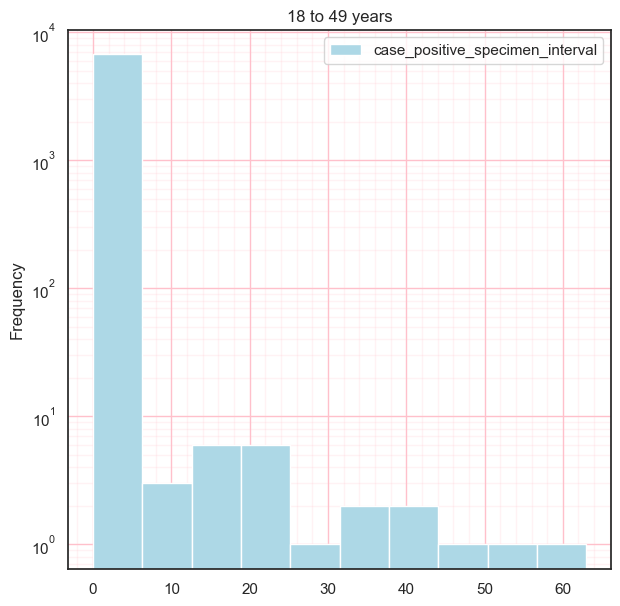

In [127]:
df2[df2['age_group'] == "18 to 49 years"][['case_positive_specimen_interval']].plot(kind='hist',figsize=(7,7), bins=10, title="18 to 49 years",log=True,color='lightblue')
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

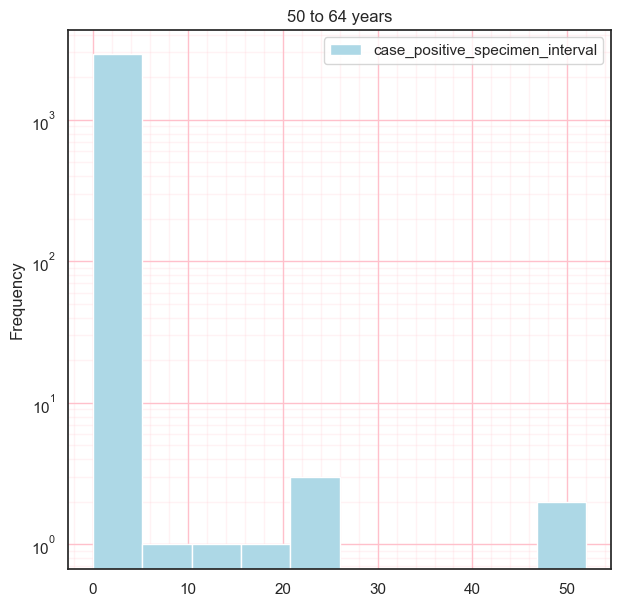

In [128]:
df2[df2['age_group'] == "50 to 64 years"][['case_positive_specimen_interval']].plot(kind='hist',figsize=(7,7), bins=10, title="50 to 64 years",log=True,color='lightblue')
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

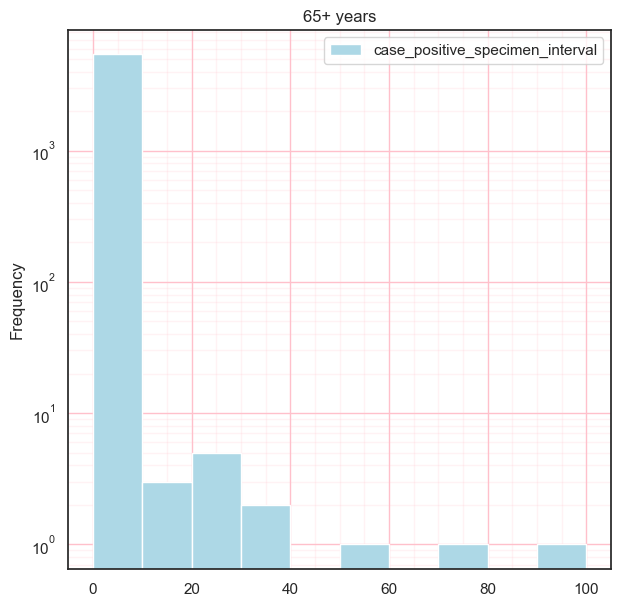

In [129]:
df2[df2['age_group'] == "65+ years"][['case_positive_specimen_interval']].plot(kind='hist',figsize=(7,7), bins=10, title="65+ years",log=True,color='lightblue')
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

### Disscuss Sixteen


- For COVID-19, 'case_positive_specimen_interval'values for differnet age group mainly are concentrated at 0 or around 0. Other values also exist, but the value 0 occupies an absolute amount.
- The changes in the numerical distribution of 'case_positive_specimen_interval' value do not seem to have much to do with age group.

#### 4. Plot Case_Onset_Interval vs Sex

(array([1, 2, 3]),
 [Text(1, 0, 'Female'), Text(2, 0, 'Male'), Text(3, 0, 'Unknown')])

<Figure size 640x480 with 0 Axes>

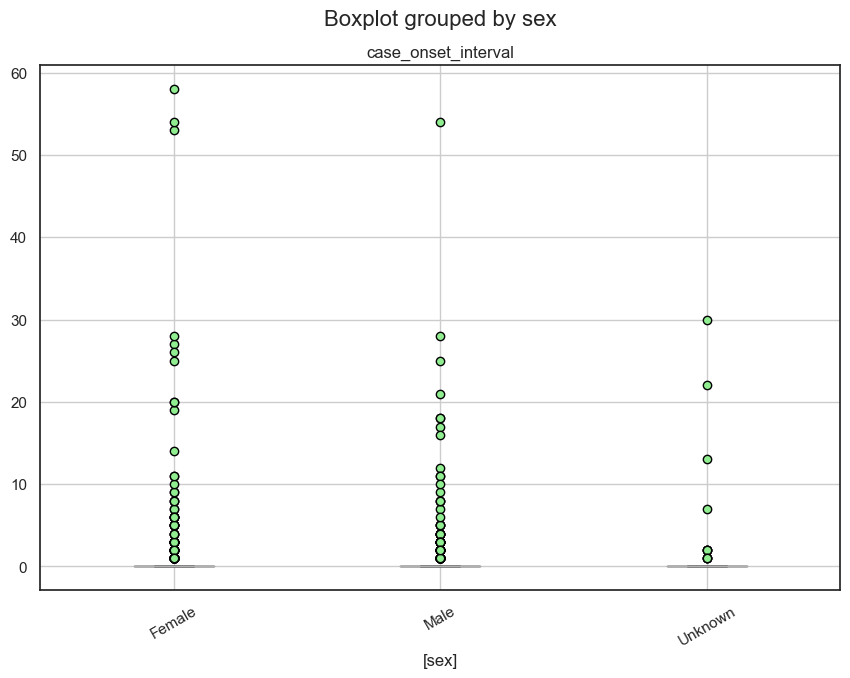

In [130]:
#['case_positive_specimen_interval','case_onset_interval']
plt.figure()
flierprops = dict(marker='o', markerfacecolor='lightgreen', markersize=6, linestyle='none')
df2.boxplot(column=['case_onset_interval'], by=['sex'], flierprops=flierprops, figsize=(10,7))
plt.xticks(rotation = 30)

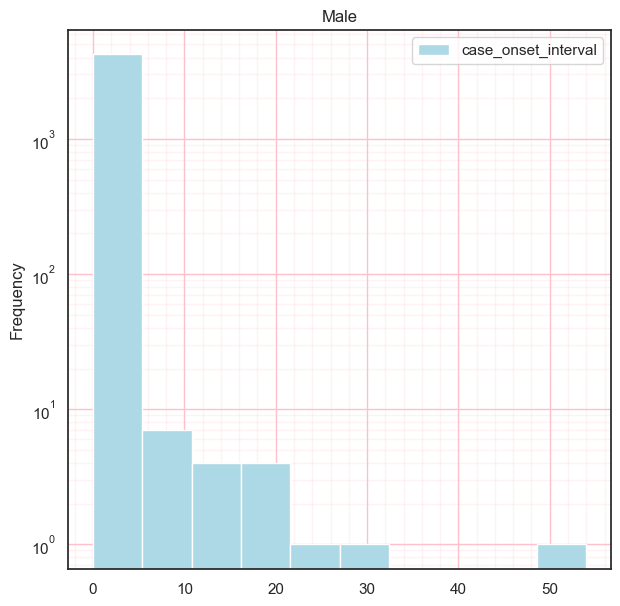

In [131]:
df2[df2['sex'] == "Male"][['case_onset_interval']].plot(kind='hist',figsize=(7,7), bins=10, title="Male",log=True,color='lightblue')
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

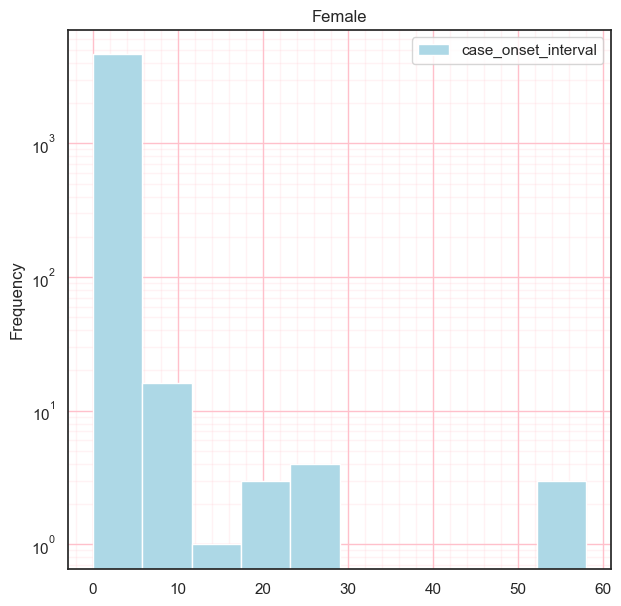

In [132]:
df2[df2['sex'] == "Female"][['case_onset_interval']].plot(kind='hist',figsize=(7,7), bins=10, title="Female",log=True,color='lightblue')
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

### Disscuss Seventeen


- For COVID-19, 'case_onset_interval'values for differnet gender mainly are concentrated at 0 or around 0. Other values also exist, but the value 0 occupies an absolute amount.
- The changes in the numerical distribution of 'case_onset_interval' value do not seem to have much to do with gender.

#### 5. Plot Case_Onset_Interval vs Age

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, '0 - 17 years'),
  Text(2, 0, '18 to 49 years'),
  Text(3, 0, '50 to 64 years'),
  Text(4, 0, '65+ years'),
  Text(5, 0, 'Unknown')])

<Figure size 640x480 with 0 Axes>

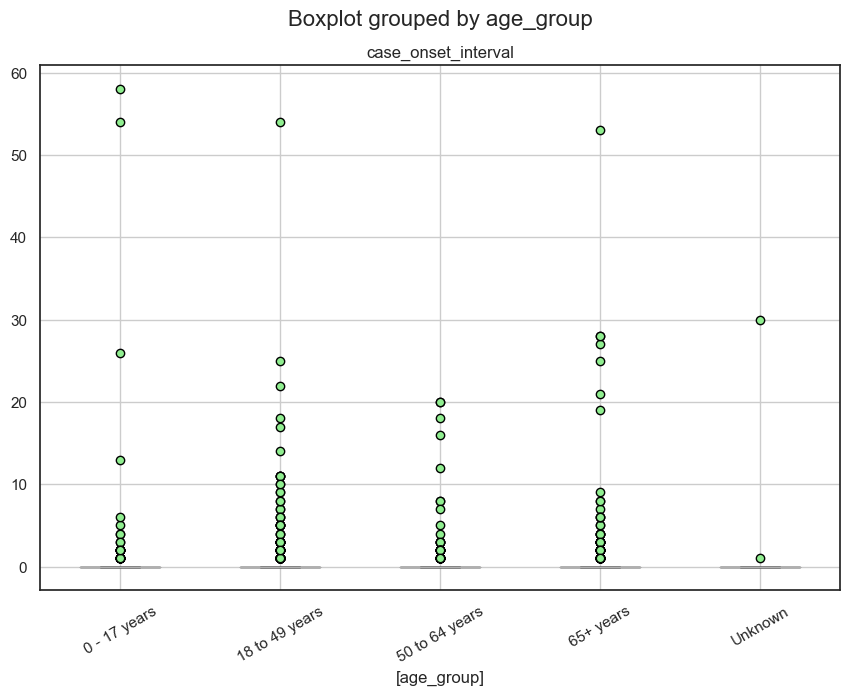

In [133]:
#['case_positive_specimen_interval','case_onset_interval']
plt.figure()
flierprops = dict(marker='o', markerfacecolor='lightgreen', markersize=6, linestyle='none')
df2.boxplot(column=['case_onset_interval'], by=['age_group'], flierprops=flierprops, figsize=(10,7))
plt.xticks(rotation = 30)

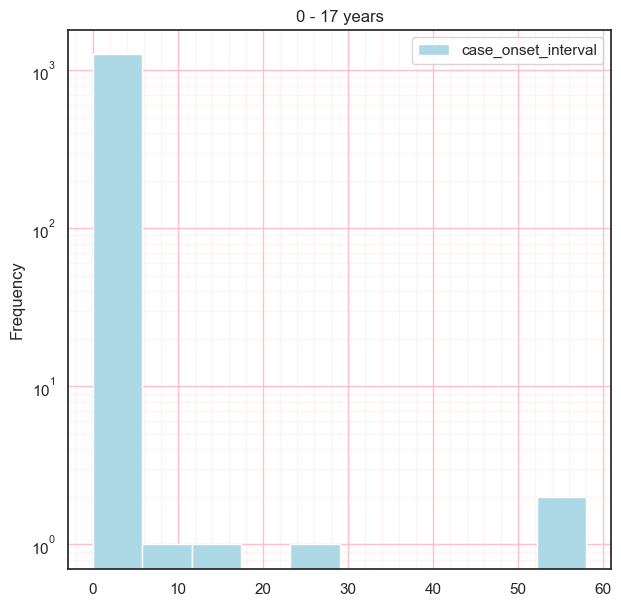

In [134]:
df2[df2['age_group'] == "0 - 17 years"][['case_onset_interval']].plot(kind='hist',figsize=(7,7), bins=10, title="0 - 17 years",log=True,color='lightblue')
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

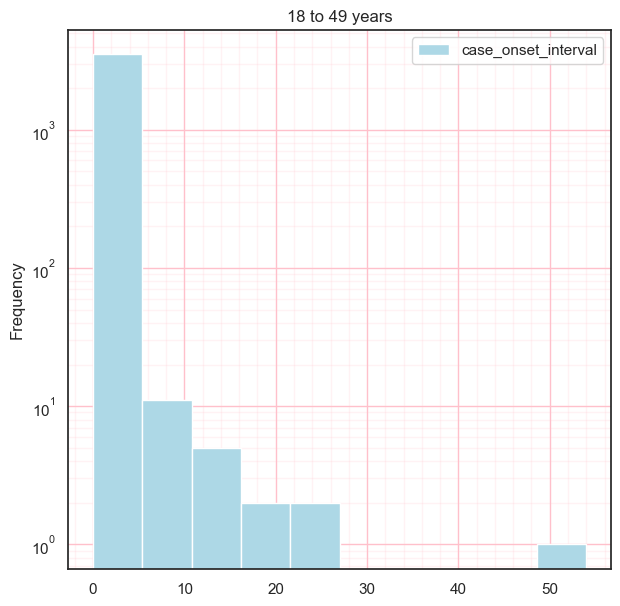

In [135]:
df2[df2['age_group'] == "18 to 49 years"][['case_onset_interval']].plot(kind='hist',figsize=(7,7), bins=10, title="18 to 49 years",log=True,color='lightblue')
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

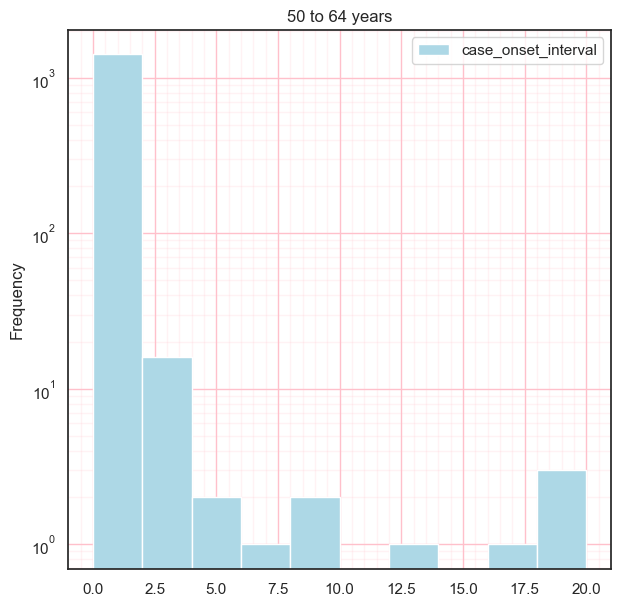

In [136]:
df2[df2['age_group'] == "50 to 64 years"][['case_onset_interval']].plot(kind='hist',figsize=(7,7), bins=10, title="50 to 64 years",log=True,color='lightblue')
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

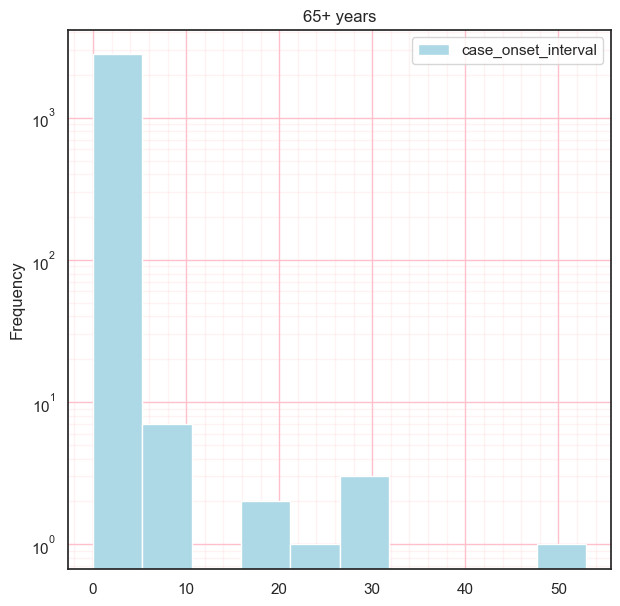

In [137]:
df2[df2['age_group'] == "65+ years"][['case_onset_interval']].plot(kind='hist',figsize=(7,7), bins=10, title="65+ years",log=True,color='lightblue')
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

### Disscuss Eighteen


- For COVID-19, 'case_onset_interval'values for differnet age group mainly are concentrated at 0 or around 0. Other values also exist, but the value 0 occupies an absolute amount.
- The changes in the numerical distribution of 'case_onset_interval' value do not seem to have much to do with age group.

### - Discuss your findings from the plots above. Do you find any features or feature combinations that are indicative of the target outcome (i.e., churn)? Explain in plain words (a short paragraph) the story of your findings so far.


##### - Continuous vs Continuous
- There seems no clear connection between these 2 continuous features,'case_positive_specimen_interval' and 'case_onset_interval'.
- Correlation between 2 continuous features is 0.046, which is around 0, indicating clearly no correlation.
- 2 continuous features are independent to each other.
- The scatter plot diagram also confirms this conjecture, and they do not form a linear relationship.

##### - Categorical vs Categorical
- The mortality rate of COVID-19 is very high among people over 65 years old.(death vs age)
- The mortality rate of COVID-19 is proportional to the increase of age.(death vs age)
- The mortality rate in most states is below 50%, and some states reach 100% due to the scarcity of samples.(death vs state)
- The mortality rate of men after COVID-19 infection is slightly higher than that of women.(death vs gender)
- The mortality rate is approximately 20% for women and 10% for men.(death vs gender)
- It can be seen that the highest mortality rate of COVID-19 Asian is close to 30%, while the mortality rate of Native Hawaiian/Other Pacific Islander is the smallest, close to zero.(death vs race)
- White and Asian Americans have similar mortality rates.(death vs race)
- The mortality rate for all race groups is within 40%.(death vs race)
- The mortality difference between Hispanic/Latino and Non Hispanic/Latino due to COVID-19 is small, and both mortality is within 40%.(death vs ethnicity)
- It can be seen that the mortality rate of patients who need hospitalization cure is significantly higher, reaching 85%.(death vs hosp_status)
- The death rate of patients who do not need hospitalization due to COVID-19 is only about 6%.(death vs hosp_status)
- It can be seen that the mortality rate of patients who need ICU cure is significantly higher, reaching 95%, which is 10% higher than patients requiring hospitalization.(death vs icu_status)
- The death rate of patients who do not need ICU due to COVID-19 is only about 5%.(death vs icu_status)
- Symptomatic patients still account for an absolute majority in different age groups.(symptom vs age)
- The proportion of people over the age of 65 receiving hospital treatment has increased significantly,which is nearly 45%.(age vs hosp_status)
- The proportion of people aged 0-17 who need hospital treatment for COVID-19 is the lowest, less than 3%.(age vs hosp_status)
- For COVID-19, with the increase of age, people need more hospital treatment.(age vs hosp_status)
- Patients of all ages rarely require ICU treatment, but relatively speaking, groups aged 65 and older have the highest rates of requiring ICU treatment.(age vs icu_status)
- The proportion of male and female patients who need hospital treatment is similar, with slightly higher rates for males.(gender vs hosp_status)
- For COVID-19, the proportion of Asian patients who need hospital treatment is the highest, followed by blacks, followed by whites, and Hawaiians and Pacific Islanders who need hospital treatment the least, with a proportion of 0.(race vs hosp_status)

##### - Continuous vs Categorical
- For COVID-19, 'case_positive_specimen_interval'values for differnet race ,gender and age mainly are concentrated at 0 or around 0. Other values also exist, but the value 0 occupies an absolute amount.
- The changes in the numerical distribution of 'case_positive_specimen_interval' value do not seem to have much to do with race ,gender andage.
- For COVID-19, 'case_onset_interval'values for differnet age and gender group mainly are concentrated at 0 or around 0. Other values also exist, but the value 0 occupies an absolute amount.
- The changes in the numerical distribution of 'case_onset_interval' value do not seem to have much to do with age group and gender.


# (4). Transform, extend or combine the existing features to create a few new features (at least 3)

### Aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

#### <font color="red" >*I have listed all the new features in advance to facilitate the subsequent use between new features.I will explain them in detail later!!*</font >

In [138]:
#feature1
df2['potential_physical_weakness'] = 'No'
df2.loc[(df['symptom_status'] == 'Symptomatic') & (df2['hosp_yn'] == 'Yes'), 'potential_physical_weakness'] = 'Yes'

#feature2
df2['case_season']=df2['case_month'].apply(lambda x: 'Spring' if x in ['2020-03','2020-04','2020-05','2021-03','2021-04','2021-05','2022-03','2022-04','2022-05']
                                         else 'Summer' if x in ['2020-06','2020-07','2020-08','2021-06','2021-07','2021-08','2022-06','2022-07','2022-08'] 
                                         else 'Autumn' if x in ['2020-09','2020-10','2021-09','2021-10','2022-09','2022-10']
                                         else 'Cold Winter' )
df2['case_season'] = df2['case_season'].astype('category')

#feature3
df2['region']=df2['res_state'].apply(lambda x: 'Midwest' if x in ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI']
                                         else 'South' if x in ['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV'] 
                                         else 'West' if x in ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']
                                         else 'Northeast' )
df2['region'] = df2['region'].astype('category')

#feature4
df2['regional_affluence']=df2['res_state'].apply(lambda x: 'Rich Region' if x in ['DC','MA','NY','CT','AK','ND','WY','DE','CA','WA']
                                         else 'Poor Region' if x in ['TN','LA','NM','OK','AR','KY','WV','MS','AL'] 
                                         else 'Normal Region'  )
df2['regional_affluence'] = df2['regional_affluence'].astype('category')

#feature5
df2['young_middle_age'] = df2['age_group']=='18 to 49 years'
df2['young_middle_age'] = df2['young_middle_age'].astype('category')

#### **New feature 1** 
##### - potential_physical_weakness
1. The definition of potential physical weakness facing COVID-19 is that when 'symptom_status' is'Symptomatic', 'hosp_yn' is 'Yes'.
2. I define patients who have symptoms and have been hospitalized as physically weak, and I would like to check their mortality rate and age geographical distribution for covid-19.See if they have a connection.
3. Categories (2, object): ['No', 'Yes']

In [139]:
#print(pd.unique(df2["potential_physical_weakness"].ravel()))

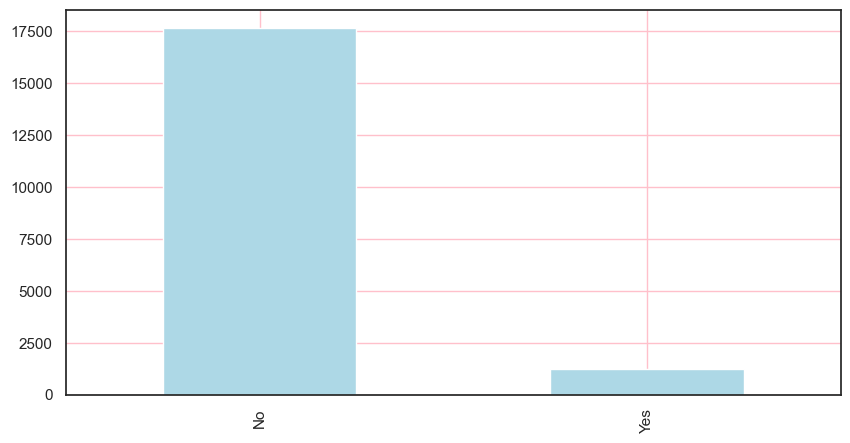

In [140]:
df2['potential_physical_weakness'] = 'No'
df2.loc[(df['symptom_status'] == 'Symptomatic') & (df2['hosp_yn'] == 'Yes'), 'potential_physical_weakness'] = 'Yes'


df2['potential_physical_weakness'] = df2['potential_physical_weakness'].astype('category')
df2["potential_physical_weakness"].value_counts().plot(kind='bar', figsize=(10,5),color='lightblue')
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

potential_physical_weakness
Index 		 Count
No 	 17635
Yes 	 1255


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

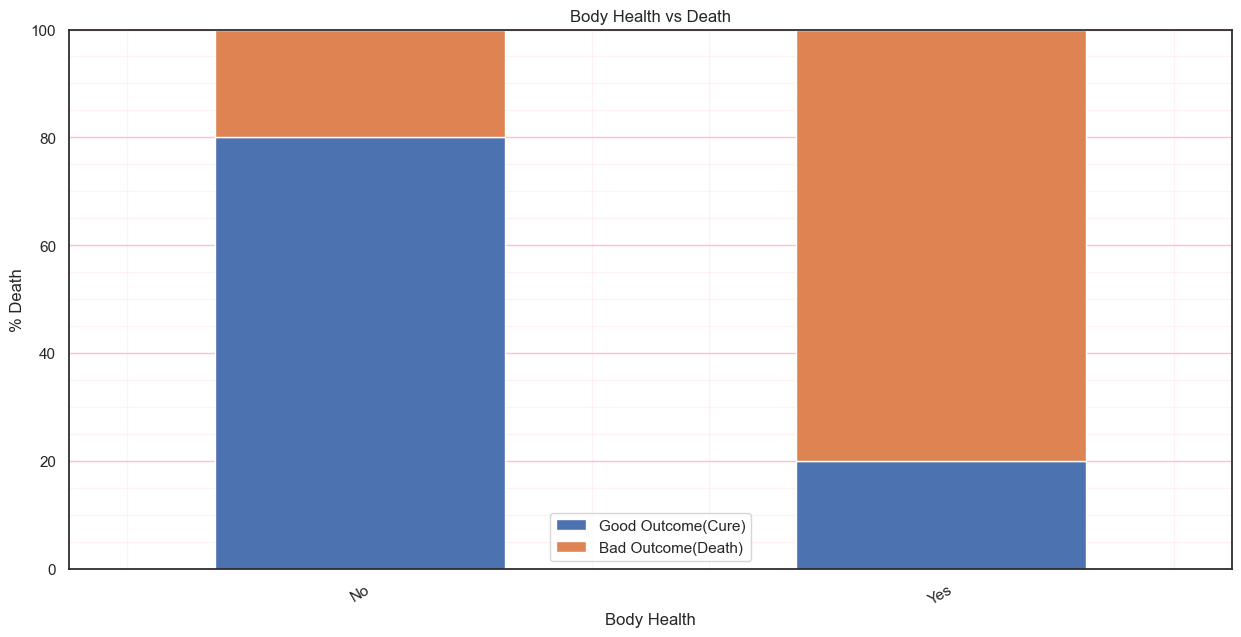

In [141]:
#Using code from the module lab
potential_physical_weaknessgroup = pd.unique(df2["potential_physical_weakness"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("potential_physical_weakness")
print("Index \t\t Count")

# for each delinquency category
for i in potential_physical_weaknessgroup:
    
    count = df2[df2["potential_physical_weakness"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['potential_physical_weakness'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','potential_physical_weakness','death_yn']].groupby(['potential_physical_weakness','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Body Health vs Death", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Good Outcome(Cure)", "Bad Outcome(Death)"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Body Health")
my_plot.set_ylabel("% Death")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### <font color="yellowgreen" >The rate of death is higher for the infirm after suffering from COVID-19.<font >

age_group
Index 		 Count
50 to 64 years 	 3081
65+ years 	 5852
18 to 49 years 	 7230
Unknown 	 170
0 - 17 years 	 2557


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0 - 17 years'),
  Text(1, 0, '18 to 49 years'),
  Text(2, 0, '50 to 64 years'),
  Text(3, 0, '65+ years'),
  Text(4, 0, 'Unknown')])

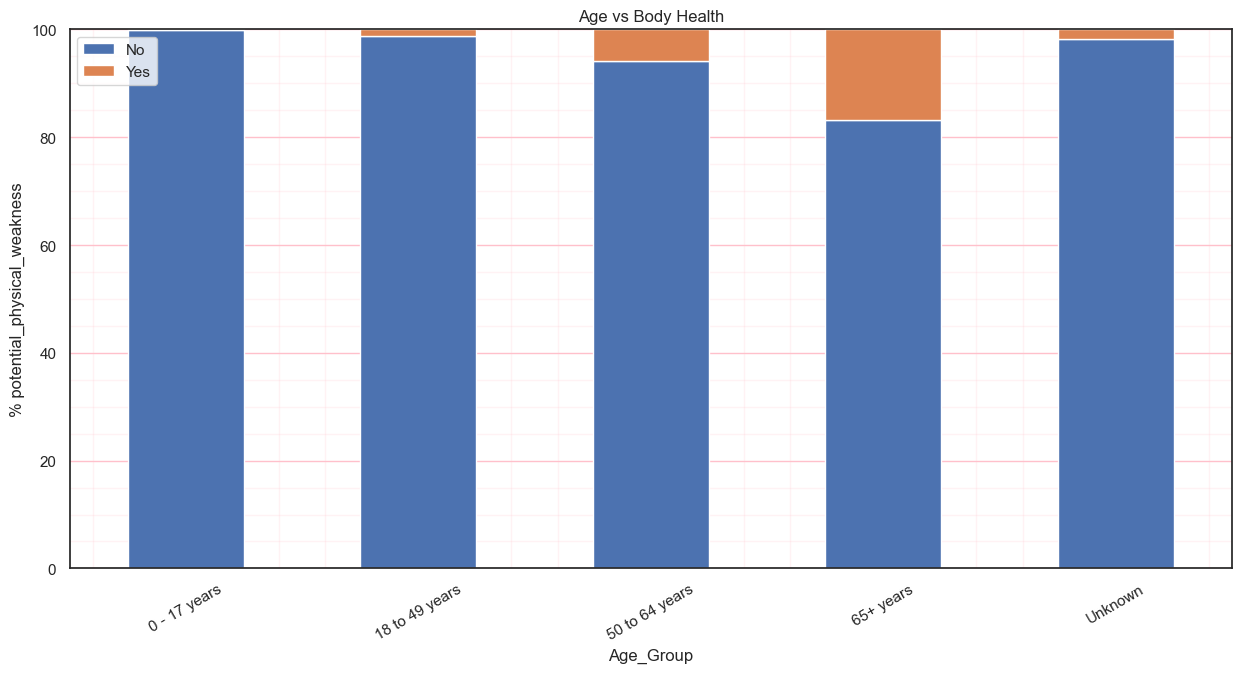

In [142]:
#Using code from the module lab
agegroup = pd.unique(df2["age_group"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("age_group")
print("Index \t\t Count")

# for each delinquency category
for i in agegroup:
    
    count = df2[df2["age_group"] == i].count()['potential_physical_weakness']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['age_group'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','age_group','potential_physical_weakness']].groupby(['age_group','potential_physical_weakness']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Age vs Body Health", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["No", "Yes"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Age_Group")
my_plot.set_ylabel("% potential_physical_weakness")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### <font color="yellowgreen" >Older people have a higher proportion of physical weakness, and young people aged 0-17 have almost no physical weakness.<font >

In [143]:
# test=df2.loc[(df2["potential_physical_weakness"]=='Yes')&(df2['age_group']=="0 - 17 years")]
# test=test[['hosp_yn','case_season']]
# print("Check num yes: ", test.shape[0])

# test=df2.loc[(df2["potential_physical_weakness"]=='No')&(df2['age_group']=="0 - 17 years")]
# test=test[['hosp_yn','case_season']]
# print("Check num No: ", test.shape[0])


region
Index 		 Count
Northeast 	 6738
West 	 2371
Midwest 	 4716
South 	 5065


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

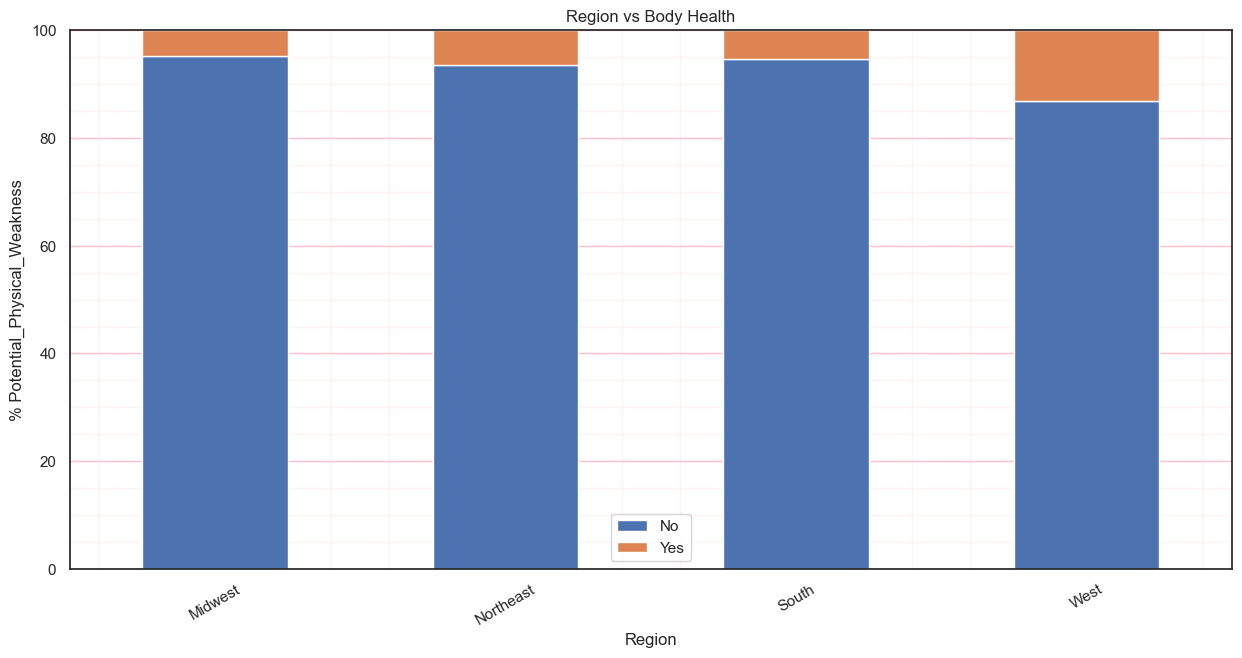

In [144]:
#Using code from the module lab
regiongroup = pd.unique(df2["region"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("region")
print("Index \t\t Count")

# for each delinquency category
for i in regiongroup:
    
    count = df2[df2["region"] == i].count()['potential_physical_weakness']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['region'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','region','potential_physical_weakness']].groupby(['region','potential_physical_weakness']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Region vs Body Health", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["No", "Yes"])
#my_plot.legend(["Northeast", "West","South","Midwest"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Region")
my_plot.set_ylabel("% Potential_Physical_Weakness")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### <font color="yellowgreen" >The proportion of physical weakness is even higher in the western region, and Not much difference in other regions<font >

#### **New feature 2** 
##### - case_season
1. cse_season: I divided the case into spring, summer, autumn, and winter based on the specific time they reported. Specifically, I define March, April, and May as spring, June, July, and August as summer, September, and October as autumn, and November, December, January, and February as winter.

2. I want to see the correlation between disease season and diseases death, disease seasons and age group, disease season and hosp_status.

3. Categories (4, object): ['Autumn', 'Cold Winter', 'Spring', 'Summer']

In [145]:
#print(pd.unique(df2["case_season"].ravel()))

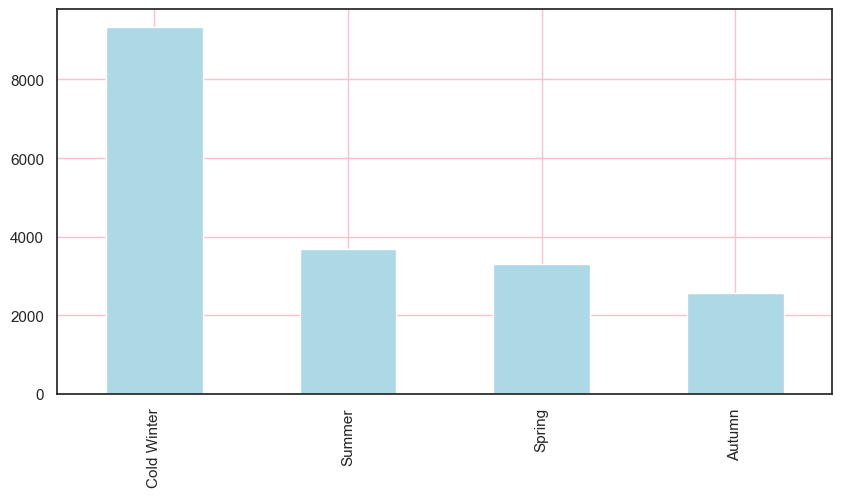

In [146]:
# create a new column
df2['case_season']=df2['case_month'].apply(lambda x: 'Spring' if x in ['2020-03','2020-04','2020-05','2021-03','2021-04','2021-05','2022-03','2022-04','2022-05']
                                         else 'Summer' if x in ['2020-06','2020-07','2020-08','2021-06','2021-07','2021-08','2022-06','2022-07','2022-08'] 
                                         else 'Autumn' if x in ['2020-09','2020-10','2021-09','2021-10','2022-09','2022-10']
                                         else 'Cold Winter' )
df2['case_season'] = df2['case_season'].astype('category')
df2['case_season'].value_counts().plot(kind='bar', figsize=(10,5),color='lightblue')
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

Generate stacked bar plot 'case_season'

case_season
Index 		 Count
Autumn 	 2582
Cold Winter 	 9323
Spring 	 3302
Summer 	 3683


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Autumn'),
  Text(1, 0, 'Cold Winter'),
  Text(2, 0, 'Spring'),
  Text(3, 0, 'Summer')])

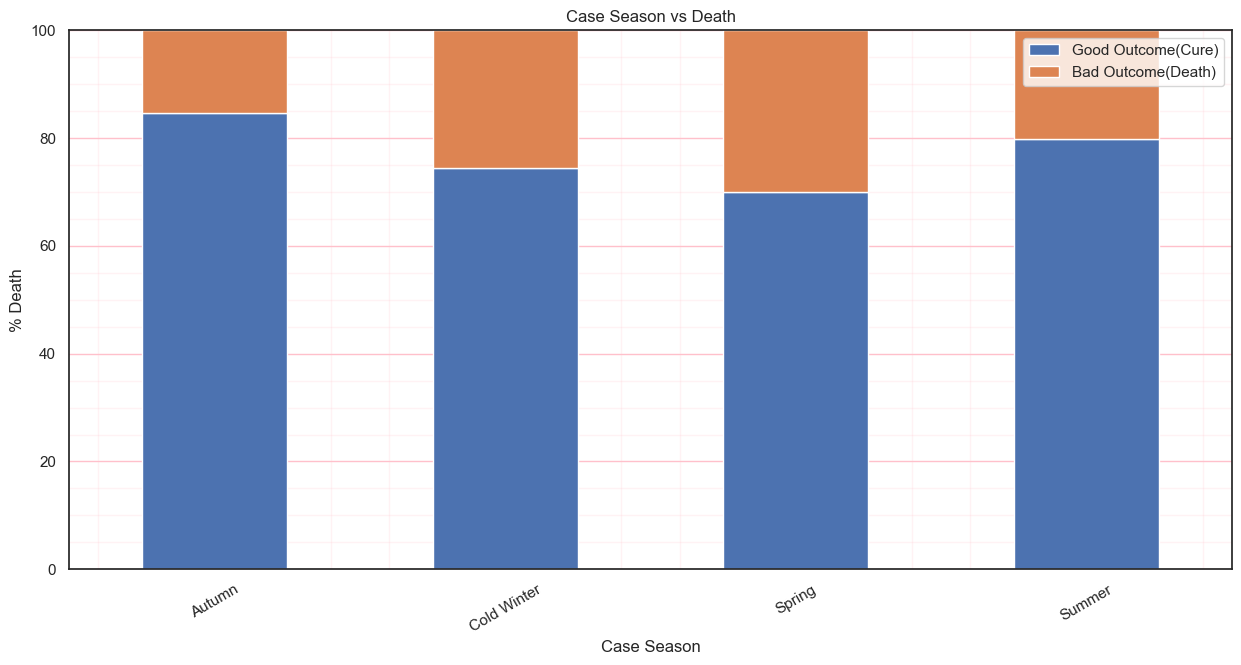

In [147]:
#Using code from the module lab
case_seasongroup = pd.unique(df2["case_season"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("case_season")
print("Index \t\t Count")

# for each delinquency category
for i in case_seasongroup:
    
    count = df2[df2["case_season"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['case_season'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','case_season','death_yn']].groupby(['case_season','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Case Season vs Death", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Good Outcome(Cure)", "Bad Outcome(Death)"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Case Season")
my_plot.set_ylabel("% Death")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### <font color="yellowgreen" >Compared with summer and autumn, there is a large proportion of people suffering from COVID-19 and dying in spring and winter<font >

case_season
Index 		 Count
Autumn 	 2582
Cold Winter 	 9323
Spring 	 3302
Summer 	 3683


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Autumn'),
  Text(1, 0, 'Cold Winter'),
  Text(2, 0, 'Spring'),
  Text(3, 0, 'Summer')])

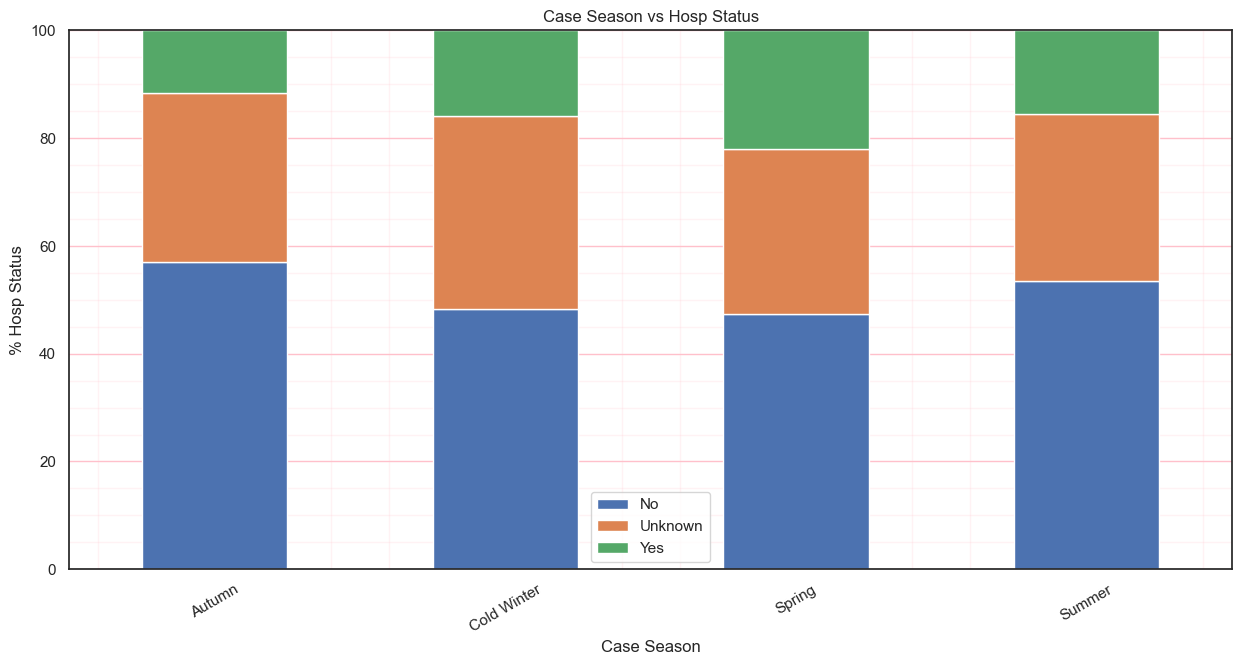

In [148]:

#Using code from the module lab
case_seasongroup = pd.unique(df2["case_season"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("case_season")
print("Index \t\t Count")

# for each delinquency category
for i in case_seasongroup:
    
    count = df2[df2["case_season"] == i].count()['hosp_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['case_season'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','case_season','hosp_yn']].groupby(['case_season','hosp_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Case Season vs Hosp Status", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["No","Unknown",'Yes'])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Case Season")
my_plot.set_ylabel("% Hosp Status")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### <font color="yellowgreen" >Compared with winter, summer and autumn, The proportion of patients suffering from COVID-19 who need hospital treatment is higher in spring.<font >

In [149]:
# test=df2.loc[(df2["case_season"]=='Autumn')&(df2['hosp_yn']=="Yes")]
# test=test[['hosp_yn','case_season']]
# print("Check num yes: ", test.shape[0])
# test.head(5)

# test=df2.loc[(df2["case_season"]=='Autumn')&(df2['hosp_yn']=="No")]
# test=test[['hosp_yn','case_season']]
# print("Check num no: ", test.shape[0])
# test.head(5)

# test=df2.loc[(df2["case_season"]=='Autumn')&(df2['hosp_yn']=="Unknown")]
# test=test[['hosp_yn','case_season']]
# print("Check num unknown: ", test.shape[0])
# test.head(5)

age_group
Index 		 Count
50 to 64 years 	 3081
65+ years 	 5852
18 to 49 years 	 7230
Unknown 	 170
0 - 17 years 	 2557


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0 - 17 years'),
  Text(1, 0, '18 to 49 years'),
  Text(2, 0, '50 to 64 years'),
  Text(3, 0, '65+ years'),
  Text(4, 0, 'Unknown')])

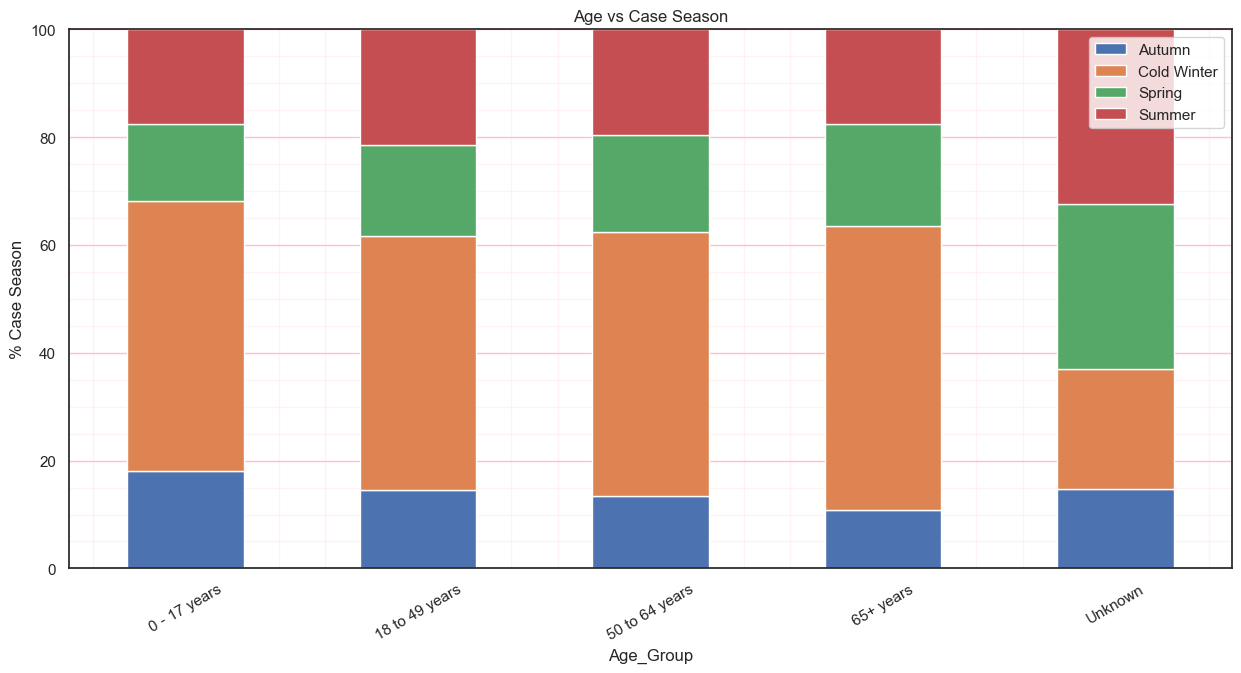

In [150]:
#Using code from the module lab
agegroup = pd.unique(df2["age_group"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("age_group")
print("Index \t\t Count")

# for each delinquency category
for i in agegroup:
    
    count = df2[df2["age_group"] == i].count()['case_season']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['age_group'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','age_group','case_season']].groupby(['age_group','case_season']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Age vs Case Season", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Autumn", "Cold Winter","Spring","Summer"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Age_Group")
my_plot.set_ylabel("% Case Season")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### <font color="yellowgreen" >For people of different ages, the proportion of patients suffering from COVID-19 is higher in winter, followed by spring and summer, and at least in autumn.<font >

In [151]:
# test=df2.loc[(df2["case_season"]=='Spring')&(df2['age_group']=="65+ years")]
# test=test[['age_group','case_season']]
# print("Check num Spring: ", test.shape[0])
# test.head(5)

# test=df2.loc[(df2["case_season"]=='Summer')&(df2['age_group']=="65+ years")]
# test=test[['age_group','case_season']]
# print("Check num Summer: ", test.shape[0])
# test.head(5)

# test=df2.loc[(df2["case_season"]=='Autumn')&(df2['age_group']=="65+ years")]
# test=test[['age_group','case_season']]
# print("Check num Autumn: ", test.shape[0])
# test=df2.loc[(df2["case_season"]=='Cold Winter')&(df2['age_group']=="65+ years")]
# test=test[['age_group','case_season']]
# print("Check num Cold Winter: ", test.shape[0])
# test.head(5)

res_state
Index 		 Count
TX 	 1018
CA 	 621
IL 	 215
IN 	 1053
TN 	 218
MI 	 532
OH 	 1085
MA 	 224
FL 	 1479
WI 	 278
MO 	 83
NV 	 274
AZ 	 489
NJ 	 1708
NY 	 2002
MN 	 884
PA 	 383
WA 	 49
CT 	 65
AR 	 158
PR 	 59
ME 	 196
VA 	 410
SC 	 357
OK 	 237
NC 	 1605
MD 	 595
AL 	 109
ID 	 178
KY 	 667
NM 	 32
DC 	 62
LA 	 34
NH 	 52
CO 	 145
UT 	 230
IA 	 58
ND 	 11
KS 	 517
WY 	 20
MT 	 92
OR 	 239
MS 	 18
AK 	 2
RI 	 111
GA 	 10
VT 	 25
VI 	 1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'AK'),
  Text(1, 0, 'AL'),
  Text(2, 0, 'AR'),
  Text(3, 0, 'AZ'),
  Text(4, 0, 'CA'),
  Text(5, 0, 'CO'),
  Text(6, 0, 'CT'),
  Text(7, 0, 'DC'),
  Text(8, 0, 'FL'),
  Text(9, 0, 'GA'),
  Text(10, 0, 'IA'),
  Text(11, 0, 'ID'),
  Text(12, 0, 'IL'),
  Text(13, 0, 'IN'),
  Text(14, 0, 'KS'),
  Text(15, 0, 'KY'),
  Text(16, 0, 'LA'),
  Text(17, 0, 'MA'),
  Text(18, 0, 'MD'),
  Text(19, 0, 'ME'),
  Text(20, 0, 'MI'),
  Text(21, 0, 'MN'),
  Text(22, 0, 'MO'),
  Text(23, 0, 'MS'),
  Text(24, 0, 'MT'),
  Text(25, 0, 'NC'),
  Text(26, 0, 'ND'),
  Text(27, 0, 'NH'),
  Text(28, 0, 'NJ'),
  Text(29, 0, 'NM'),
  Text(30, 0, 'NV'),
  Text(31, 0, 'NY'),
  Text(32, 0, 'OH'),
  Text(33, 0, 'OK'),
  Text(34, 0, 'OR'),
  Text(35, 0, 'PA'),
  Text(36, 0, 'PR'),
  Text(37, 0, '

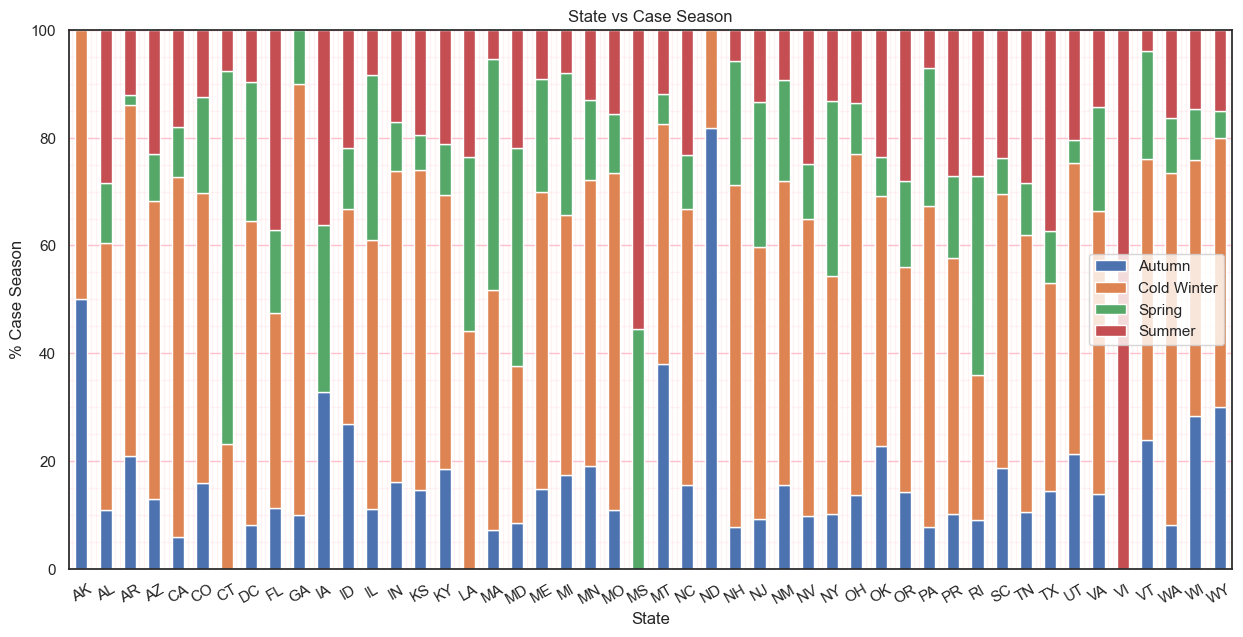

In [152]:
#Using code from the module lab
res_stategroup = pd.unique(df2["res_state"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("res_state")
print("Index \t\t Count")

# for each delinquency category
for i in res_stategroup:
    
    count = df2[df2["res_state"] == i].count()['case_season']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['res_state'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','res_state','case_season']].groupby(['res_state','case_season']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="State vs Case Season", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Autumn", "Cold Winter","Spring","Summer"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("State")
my_plot.set_ylabel("% Case Season")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### <font color="yellowgreen" >In terms of people from different states, the proportion of patients suffering from COVID-19 in winter is generally higher. But in CT, MS, ND, VI, there are anomalies in these states, which may be due to the lack of sample cases in these states.<font >

In [153]:
# test=df2.loc[(df2["case_season"]=='Spring')&(df2['res_state']=="CA")]
# test=test[['age_group','case_season']]
# print("Check num Spring: ", test.shape[0])
# test.head(5)

# test=df2.loc[(df2["case_season"]=='Summer')&(df2['res_state']=="CA")]
# test=test[['age_group','case_season']]
# print("Check num Summer: ", test.shape[0])
# test.head(5)

# test=df2.loc[(df2["case_season"]=='Autumn')&(df2['res_state']=="CA")]
# test=test[['age_group','case_season']]
# print("Check num Autumn: ", test.shape[0])
# test=df2.loc[(df2["case_season"]=='Cold Winter')&(df2['res_state']=="CA")]
# test=test[['age_group','case_season']]
# print("Check num Cold Winter: ", test.shape[0])
# test.head(5)

#### **New feature 3** 
##### - region
1. 
    - Northeast: CT, ME, MA, NH, NJ, NY, PA, RI, VT
    - South: AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV
    - Midwest: IL, IN, IA, KS, MI, MN, MO, NE, ND, OH, SD, WI
    - West: AK, AZ, CA, CO, HI, ID, MT, NV, NM, OR, UT, WA, WY
2. I want to view the association between regions and covid-diseases.
3. Categories (4, object): ['Midwest', 'Northeast', 'South', 'West']

In [154]:
#print(pd.unique(df2["region"].ravel()))

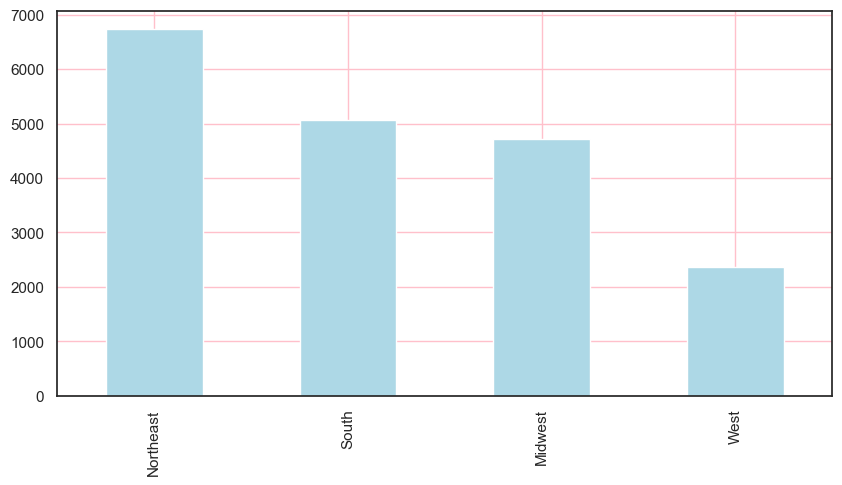

In [155]:
# create a new column
df2['region']=df2['res_state'].apply(lambda x: 'Midwest' if x in ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI']
                                         else 'South' if x in ['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV'] 
                                         else 'West' if x in ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']
                                         else 'Northeast' )
df2['region'] = df2['region'].astype('category')
df2['region'].value_counts().plot(kind='bar', figsize=(10,5),color='lightblue')
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

region
Index 		 Count
Northeast 	 6738
West 	 2371
Midwest 	 4716
South 	 5065


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

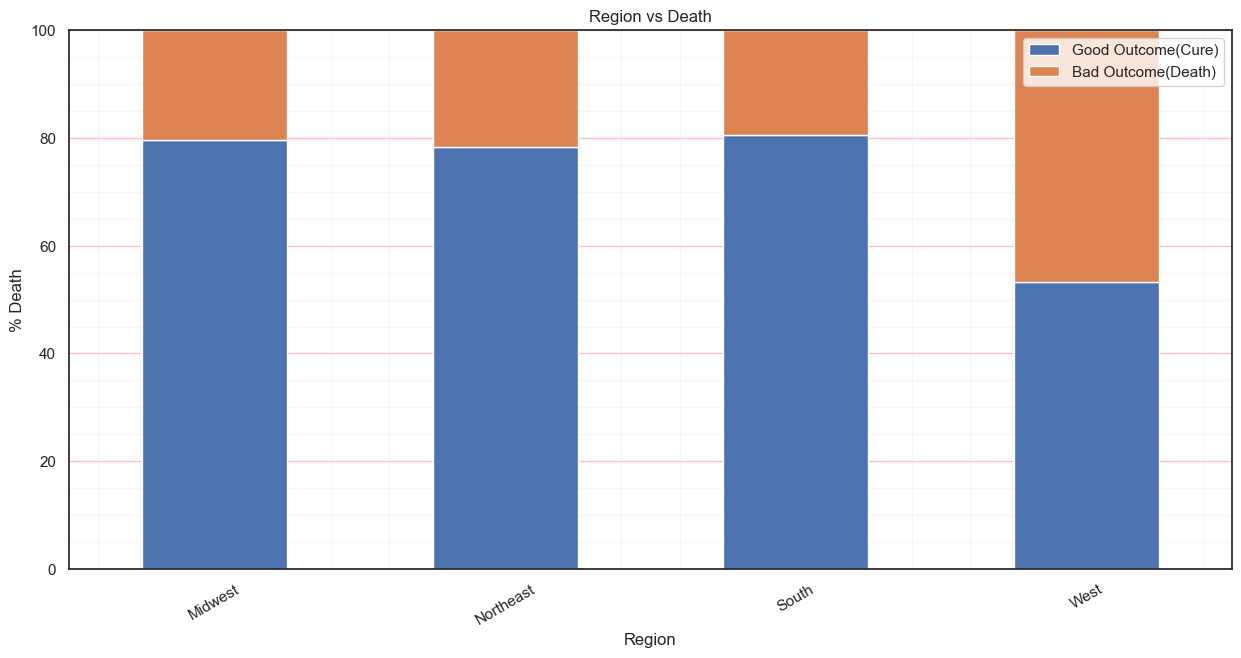

In [156]:
#Using code from the module lab
regiongroup = pd.unique(df2["region"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("region")
print("Index \t\t Count")

# for each delinquency category
for i in regiongroup:
    
    count = df2[df2["region"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['region'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','region','death_yn']].groupby(['region','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Region vs Death", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Good Outcome(Cure)", "Bad Outcome(Death)"])
#my_plot.legend(["Northeast", "West","South","Midwest"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Region")
my_plot.set_ylabel("% Death")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### <font color="yellowgreen" >The mortality rate of COVID-19 in the west is the highest, up to 47%, and that of COVID-19 in other regions is 20%.<font >

region
Index 		 Count
Northeast 	 6738
West 	 2371
Midwest 	 4716
South 	 5065


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

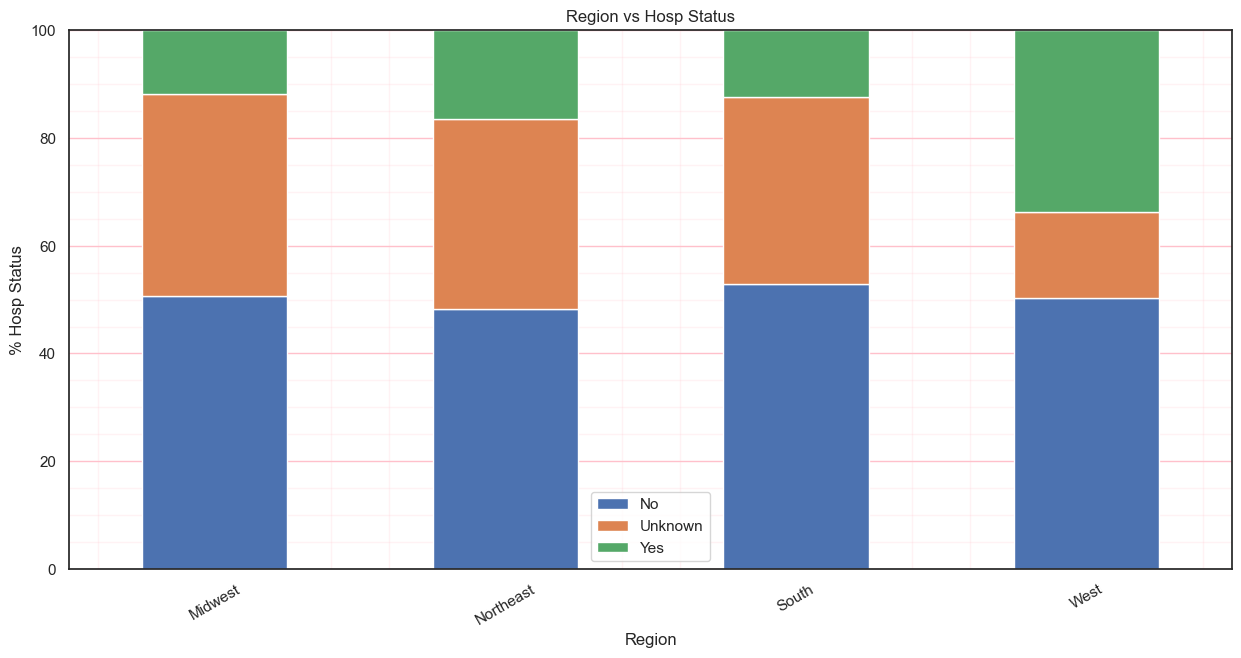

In [157]:
#Using code from the module lab
regiongroup = pd.unique(df2["region"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("region")
print("Index \t\t Count")

# for each delinquency category
for i in regiongroup:
    
    count = df2[df2["region"] == i].count()['hosp_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['region'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','region','hosp_yn']].groupby(['region','hosp_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Region vs Hosp Status", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["No", "Unknown","Yes"])
#my_plot.legend(["Northeast", "West","South","Midwest"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Region")
my_plot.set_ylabel("% Hosp Status")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### <font color="yellowgreen" >The proportion of patients who need hospitalization due to COVID-19 in the west is the highest, close to 35%, and that in other regions is less than 20%.<font >

In [158]:
# test=df2.loc[(df2["hosp_yn"]=='Yes')&(df2['region']=="West")]
# test=test[['age_group','case_season']]
# print("Check num Yes: ", test.shape[0])
# test.head(5)

# test=df2.loc[(df2["hosp_yn"]=='No')&(df2['region']=="West")]
# test=test[['age_group','case_season']]
# print("Check num No: ", test.shape[0])
# test.head(5)

# test=df2.loc[(df2["hosp_yn"]=='Unknown')&(df2['region']=="West")]
# test=test[['age_group','case_season']]
# print("Check num Unknown: ", test.shape[0])

# test.head(5)

region
Index 		 Count
Northeast 	 6738
West 	 2371
Midwest 	 4716
South 	 5065


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

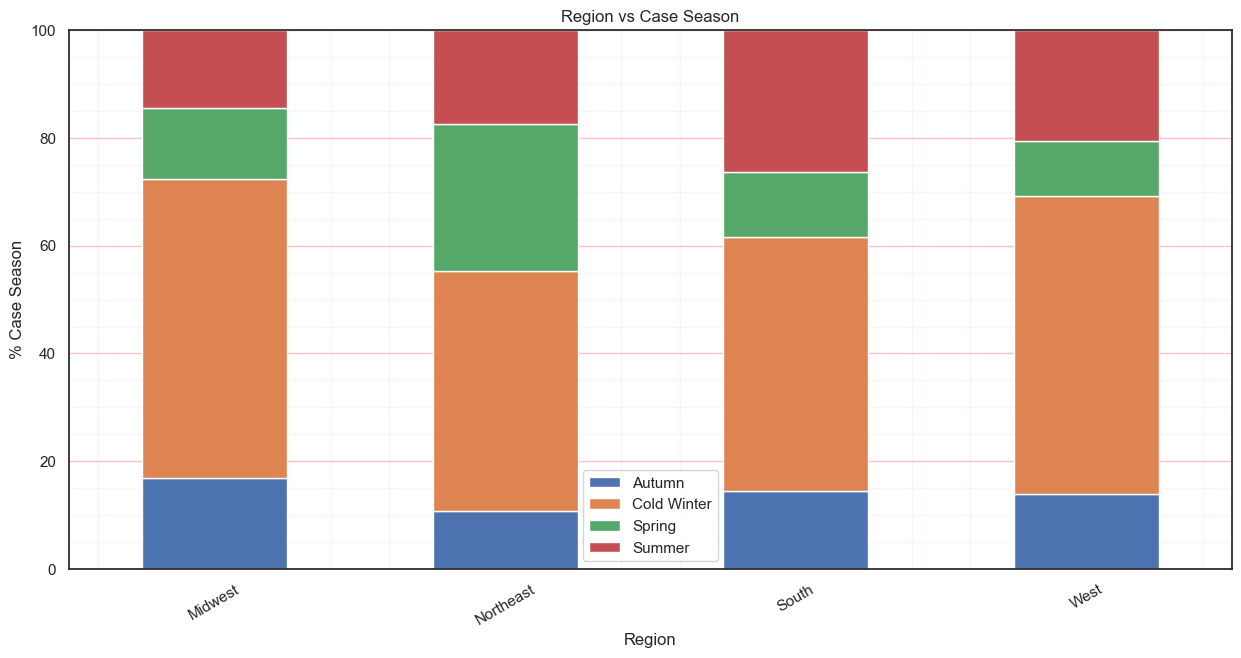

In [159]:
#Using code from the module lab
regiongroup = pd.unique(df2["region"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("region")
print("Index \t\t Count")

# for each delinquency category
for i in regiongroup:
    
    count = df2[df2["region"] == i].count()['case_season']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['region'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','region','case_season']].groupby(['region','case_season']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Region vs Case Season", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Autumn", "Cold Winter","Spring","Summer"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Region")
my_plot.set_ylabel("% Case Season")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### <font color="yellowgreen" >For different regions, the incidence rate of COVID-19 in winter is the largest, followed by spring, summer and autumn.<font >

In [160]:
# test=df2.loc[(df2["case_season"]=='Summer')&(df2['region']=="West")]
# test=test[['age_group','case_season']]
# print("Check num Summer: ", test.shape[0])
# test.head(5)

# test=df2.loc[(df2["case_season"]=='Spring')&(df2['region']=="West")]
# test=test[['age_group','case_season']]
# print("Check num Spring: ", test.shape[0])
# test.head(5)

# test=df2.loc[(df2["case_season"]=='Autumn')&(df2['region']=="West")]
# test=test[['age_group','case_season']]
# print("Check num Autumn: ", test.shape[0])

# test=df2.loc[(df2["case_season"]=='Cold Winter')&(df2['region']=="West")]
# test=test[['age_group','case_season']]
# print("Check num winter: ", test.shape[0])

# test.head(5)

#### **New feature 4** 
##### - regional_affluence
1. 
    - rich: DC,MA,NY,CT,AK,ND,WY,DE,CA,WA
    - poor: TN,LA,NM,OK,AR,KY,WV,MS,AL
    - normal: (rest states)
2. I want to study the relationship between regional affluence and COVID-19 mortality.
3. Categories (3, object): ['Normal Region', 'Poor Region', 'Rich Region']

In [161]:
#print(pd.unique(df2["regional_affluence"].ravel()))

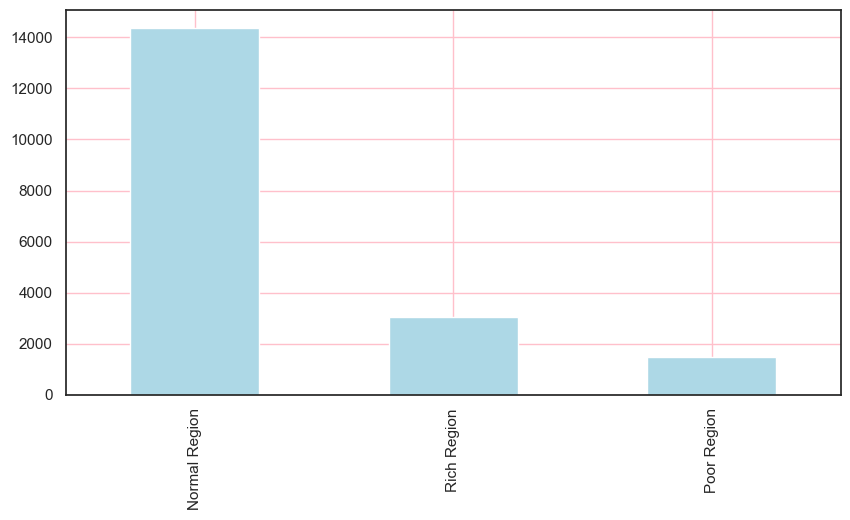

In [162]:
# create a new column
df2['regional_affluence']=df2['res_state'].apply(lambda x: 'Rich Region' if x in ['DC','MA','NY','CT','AK','ND','WY','DE','CA','WA']
                                         else 'Poor Region' if x in ['TN','LA','NM','OK','AR','KY','WV','MS','AL'] 
                                         else 'Normal Region'  )
df2['regional_affluence'] = df2['regional_affluence'].astype('category')
df2['regional_affluence'].value_counts().plot(kind='bar', figsize=(10,5),color='lightblue')
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

regional_affluence
Index 		 Count
Normal Region 	 14361
Rich Region 	 3056
Poor Region 	 1473


(array([0, 1, 2]),
 [Text(0, 0, 'Normal Region'),
  Text(1, 0, 'Poor Region'),
  Text(2, 0, 'Rich Region')])

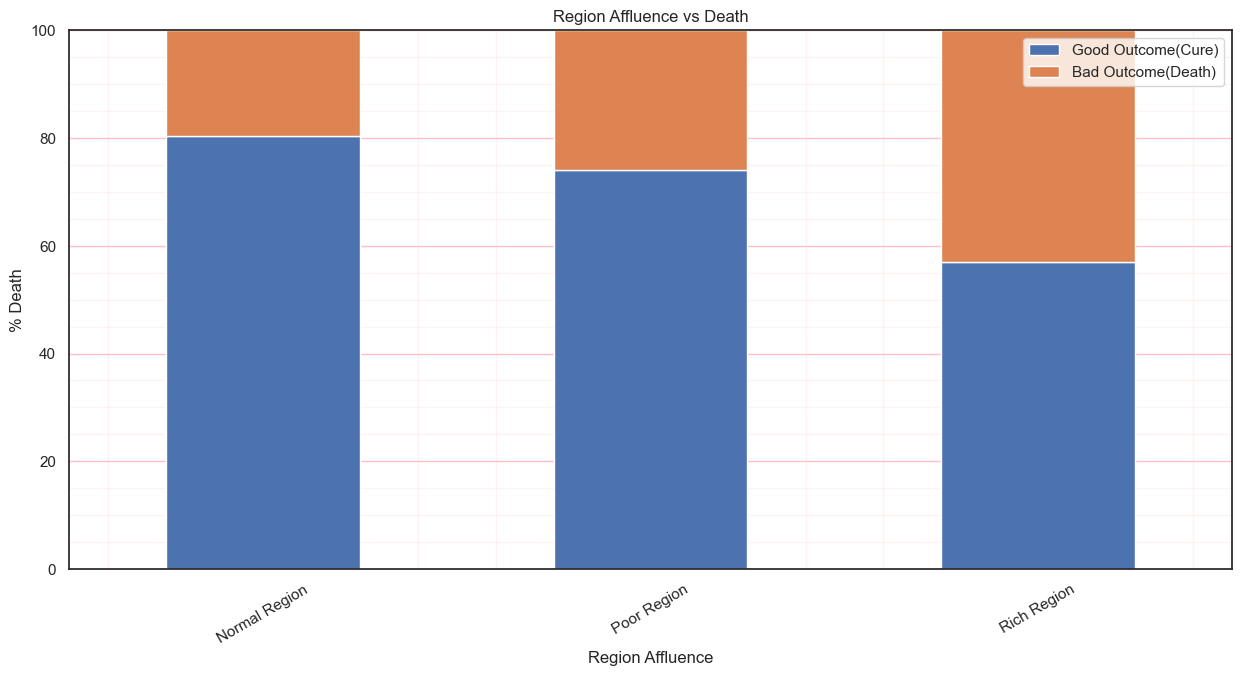

In [163]:
#Using code from the module lab
regional_affluencegroup = pd.unique(df2["regional_affluence"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("regional_affluence")
print("Index \t\t Count")

# for each delinquency category
for i in regional_affluencegroup:
    
    count = df2[df2["regional_affluence"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['regional_affluence'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','regional_affluence','death_yn']].groupby(['regional_affluence','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Region Affluence vs Death", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Good Outcome(Cure)", "Bad Outcome(Death)"])
#my_plot.legend(["Northeast", "West","South","Midwest"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Region Affluence")
my_plot.set_ylabel("% Death")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### <font color="yellowgreen" >It's strange, because we have come to the conclusion that COVID-19 has a higher mortality rate in rich areas and the lowest mortality rate in poor areas.<font >

In [164]:
# test=df2.loc[(df2["death_yn"]=='Yes')&(df2['regional_affluence']=="Poor Region")]
# print("Check num Yes: ", test.shape[0])
# test.head(5)

# test=df2.loc[(df2["death_yn"]=='No')&(df2['regional_affluence']=="Poor Region")]
# print("Check num No: ", test.shape[0])
# #test.head(5)

regional_affluence
Index 		 Count
Normal Region 	 14361
Rich Region 	 3056
Poor Region 	 1473


(array([0, 1, 2]),
 [Text(0, 0, 'Normal Region'),
  Text(1, 0, 'Poor Region'),
  Text(2, 0, 'Rich Region')])

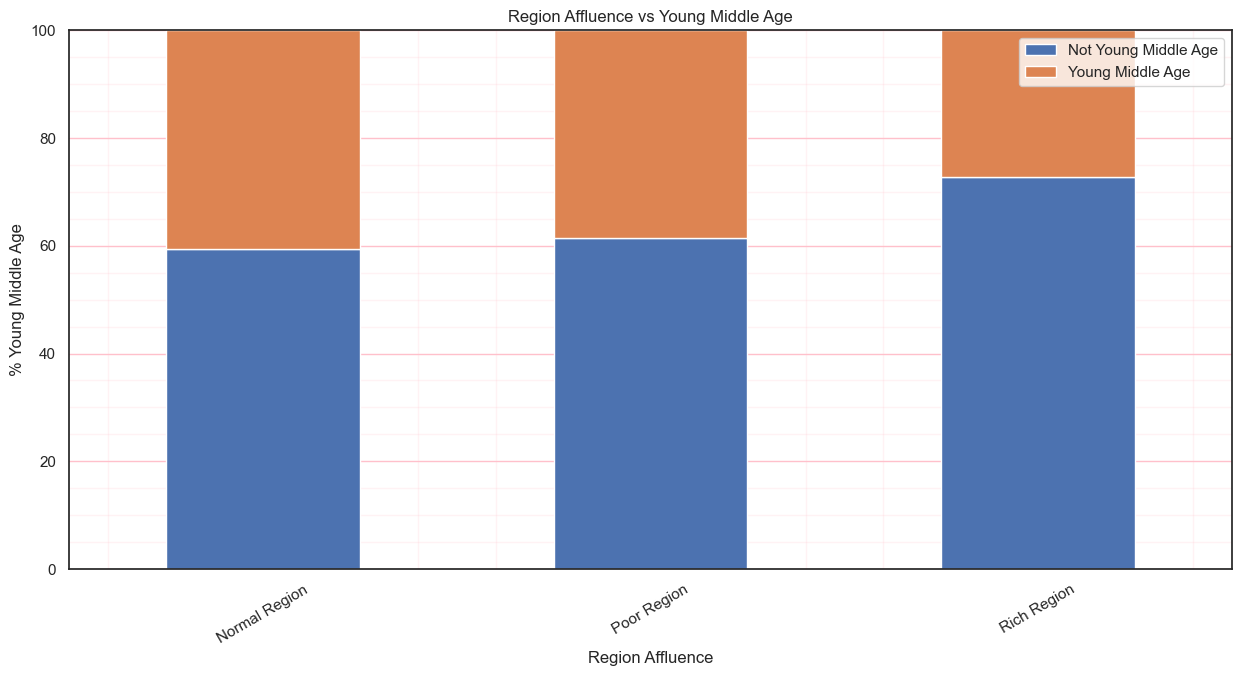

In [165]:
#Using code from the module lab
regional_affluencegroup = pd.unique(df2["regional_affluence"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("regional_affluence")
print("Index \t\t Count")

# for each delinquency category
for i in regional_affluencegroup:
    
    count = df2[df2["regional_affluence"] == i].count()['young_middle_age']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['regional_affluence'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','regional_affluence','young_middle_age']].groupby(['regional_affluence','young_middle_age']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Region Affluence vs Young Middle Age", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Not Young Middle Age", "Young Middle Age"])
#my_plot.legend(["Northeast", "West","South","Midwest"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Region Affluence")
my_plot.set_ylabel("% Young Middle Age")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### <font color="yellowgreen" >However, after analyzing the age composition, we understand that there are more old, weak and young patients in the rich areas who are COVID-19.<font >

In [166]:
# test=df2.loc[(df2["young_middle_age"]==True)&(df2['regional_affluence']=="Rich Region")]
# print("Check num True: ", test.shape[0])
# test.head(5)

# test=df2.loc[(df2["young_middle_age"]==False)&(df2['regional_affluence']=="Rich Region")]
# print("Check num False: ", test.shape[0])


#### **New feature 5** 
##### - Young and middle-aged
1. age_group:'18 to 49':This age group is defined by me as young and middle-aged.

2. I want to check the hospitalization and deaths of young and middle-aged people.

3. Categories (2, bool): [False, True];

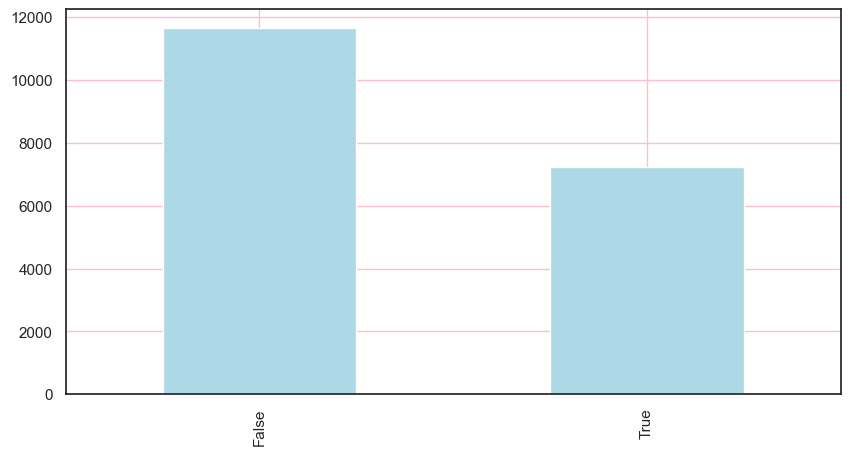

In [167]:
df2['young_middle_age'] = df2['age_group']=='18 to 49 years'
df2['young_middle_age'] = df2['young_middle_age'].astype('category')
df2["young_middle_age"].value_counts().plot(kind='bar', figsize=(10,5),color='lightblue')
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

Generate stacked bar plot 'young_middle_age'

young_middle_age
Index 		 Count
False 	 11660
True 	 7230


(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

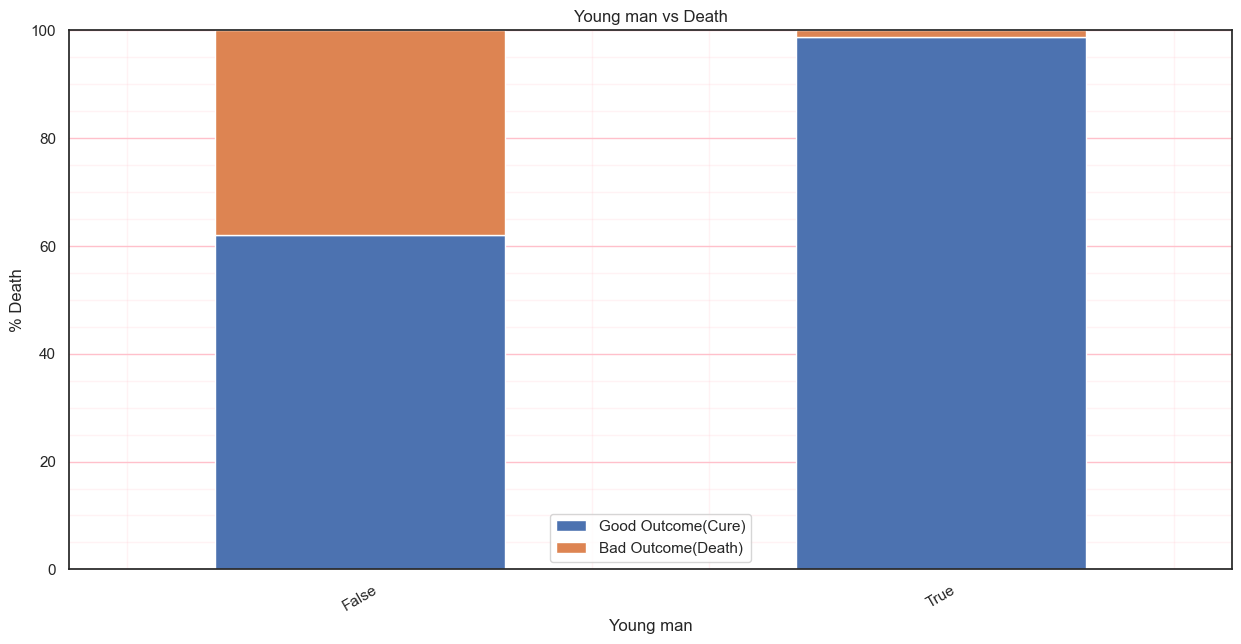

In [168]:
#Using code from the module lab
young_middle_agegroup = pd.unique(df2["young_middle_age"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("young_middle_age")
print("Index \t\t Count")

# for each delinquency category
for i in young_middle_agegroup:
    
    count = df2[df2["young_middle_age"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['young_middle_age'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','young_middle_age','death_yn']].groupby(['young_middle_age','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Young man vs Death", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Good Outcome(Cure)", "Bad Outcome(Death)"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Young man")
my_plot.set_ylabel("% Death")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### <font color="yellowgreen" >The death rate of young middle age people due to the COVID-19 is very low.<font >

young_middle_age
Index 		 Count
False 	 11660
True 	 7230


(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

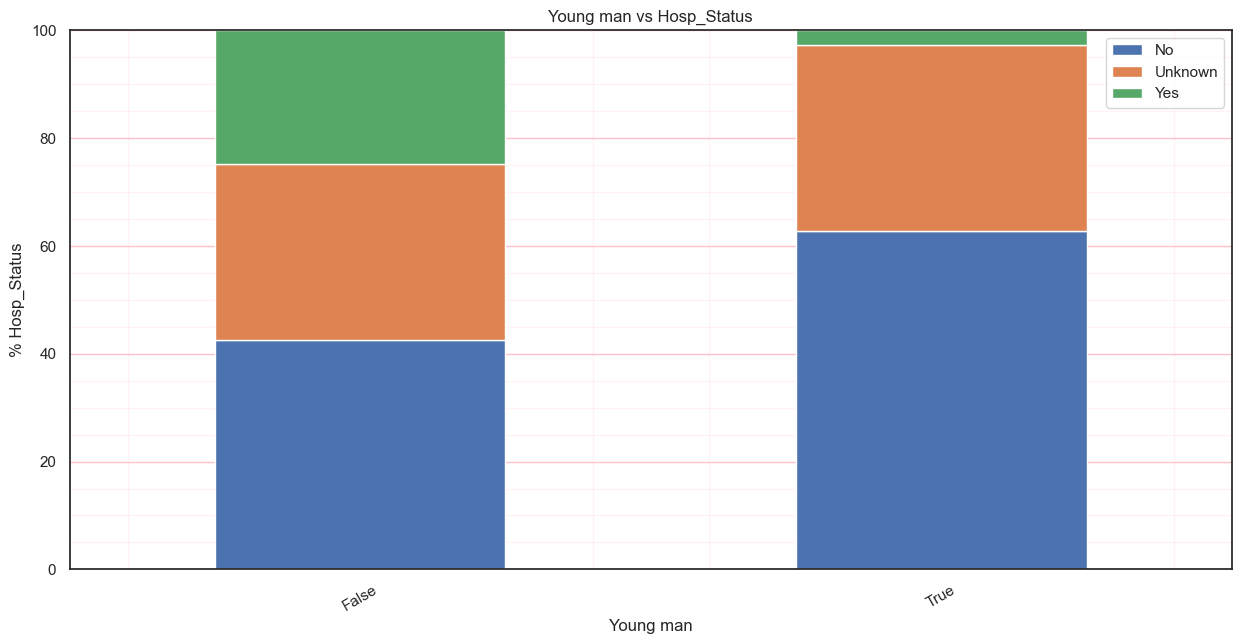

In [169]:
#Using code from the module lab
young_middle_agegroup = pd.unique(df2["young_middle_age"].ravel())

# add new column and set values to zero
df2['percent'] = 0

#print header
print("young_middle_age")
print("Index \t\t Count")

# for each delinquency category
for i in young_middle_agegroup:
    
    count = df2[df2["young_middle_age"] == i].count()['hosp_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df2[df2['young_middle_age'] == i].index.tolist()
    for ind in index_list:
        df2.loc[ind, 'percent'] = count_percentage
        
group = df2[['percent','young_middle_age','hosp_yn']].groupby(['young_middle_age','hosp_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Young man vs Hosp_Status", figsize=(15,7), grid=True)

# add legend
# red_patch = mpatches.Patch(color='pink', label='Good')
# blue_patch = mpatches.Patch(color='green', label='Bad')
# my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["No", "Unknown","Yes"])
    
# add gridlines
plt.grid(b=True, which='major', color='pink', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Young man")
my_plot.set_ylabel("% Hosp_Status")
my_plot.set_ylim([0,100])
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)

### <font color="yellowgreen" >The proportion of young middle age people who need hospitalization due to COVID-19 is very low.<font >

In [170]:
# test=df2.loc[(df2["young_middle_age"]==True)&(df2['hosp_yn']=="Yes")]
# test=test[['hosp_yn','young_middle_age']]
# print("Check num: ", test.shape[0])
# test.head(5)

# test=df2.loc[(df2["young_middle_age"]==True)&(df2['hosp_yn']=="No")]
# test=test[['hosp_yn','young_middle_age']]
# print("Check num: ", test.shape[0])
# test.head(5)

# test=df2.loc[(df2["young_middle_age"]==True)&(df2['hosp_yn']=="Unknown")]
# test=test[['hosp_yn','young_middle_age']]
# print("Check num: ", test.shape[0])
# test.head(5)


# test=df2.loc[(df2["young_middle_age"]==False)&(df2['hosp_yn']=="Yes")]
# test=test[['hosp_yn','young_middle_age']]
# print("Check num: ", test.shape[0])
# test.head(5)

# test=df2.loc[(df2["young_middle_age"]==False)&(df2['hosp_yn']=="No")]
# test=test[['hosp_yn','young_middle_age']]
# print("Check num: ", test.shape[0])
# test.head(5)

# test=df2.loc[(df2["young_middle_age"]==False)&(df2['hosp_yn']=="Unknown")]
# test=test[['hosp_yn','young_middle_age']]
# print("Check num: ", test.shape[0])
# test.head(5)

# #df2["young_middle_age"]
# print(pd.unique(df2["young_middle_age"].ravel()))

### Check logical integrity of derived data 

<font color="green" >- Because the features I created are all subsets of the categories in the original feature or re-merged. In the second part, I have cleaned up all the categories, so the logical rationality of these newly created features will not go wrong at this time. </font>

### To finish - Print data types, descriptive tables, save to csv

In [171]:
df2=df2.drop(columns='percent')
df2.dtypes

case_month                         category
res_state                          category
state_fips_code                    category
res_county                         category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
potential_physical_weakness        category
case_season                        category
region                             category
regional_affluence                 category
young_middle_age                   category
dtype: object

In [172]:
#df2.drop(columns='precent')

# Print table with continuous statistics
continuous_columns = df2.select_dtypes(['float64']).columns
df2[continuous_columns].describe().T

count      mean       std  min  25%  50%  \
case_positive_specimen_interval  17597.0  0.172586  1.978528  0.0  0.0  0.0   
case_onset_interval               9145.0  0.143794  1.607340  0.0  0.0  0.0   

                                 75%    max  
case_positive_specimen_interval  0.0  100.0  
case_onset_interval              0.0   58.0

In [173]:
# Print table with categorical statistics
df2.select_dtypes(['category']).describe().T

count unique                        top    freq
case_month                     18890     35                    2022-01    2282
res_state                      18890     48                         NY    2002
state_fips_code              18890.0   48.0                       36.0  2002.0
res_county                     18890    852                    Unknown    1148
county_fips_code               18890   1196                    Unknown    1148
age_group                      18890      5             18 to 49 years    7230
sex                            18890      3                     Female    9495
race                           18890      7                      White   11634
ethnicity                      18890      3        Non-Hispanic/Latino   11373
current_status                 18890      2  Laboratory-confirmed case   15984
symptom_status                 18890      2                Symptomatic   18641
hosp_yn                        18890      3                         No    9505
icu_yn                         18890      3                    Unknown    9829
death_yn                       18890      2                         No   14372
potential_physical_weakness    18890      2                         No   17635
case_season                    18890      4                Cold Winter    9323
region                         18890      4                  Northeast    6738
regional_affluence             18890      3              Normal Region   14361
young_middle_age               18890      2                      False   11660

In [174]:
# Write the cleaned dataframe to a csv file
df2.to_csv('covid19-cdc-22200374-updated&cleaned-data03_new_features.csv', index=False)

# <center><font color="lightblue" >THANK YOU FOR READING!!!! </font></center>
# <center><font color="pink">THE END!!!! </font></center>

In [175]:
#pip list --format=freeze >pip_comp47350py38_requirements_22200374.txt